## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

## Quick Advice

It is up to you to decide what data from this dataset to use and how to use it. If you are feeling overwhelmed or behind, we recommend you ignore some or all of the following features:

- date
- view
- sqft_above
- sqft_basement
- yr_renovated
- zipcode
- lat
- long
- sqft_living15
- sqft_lot15

## Business Problem

It is up to you to define a stakeholder and business problem appropriate to this dataset.

If you are struggling to define a stakeholder, we recommend you complete a project for a real estate agency that helps homeowners buy and/or sell homes. 



### Step 1: Business Understanding:

This stage is all about gathering facts and requirements. Who will be using the model you build? How will they be using it? How will this help the goals of the business or organization overall? Data Science projects are complex, with many moving parts and stakeholders. They're also time intensive to complete or modify. Because of this, it is very important that the Data Science team working on the project has a deep understanding of what the problem is, and how the solution will be used. Consider the fact that many stakeholders involved in the project may not have technical backgrounds, and may not even be from the same organization. Stakeholders from one part of the organization may have wildly different expectations about the project than stakeholders from a different part of the organization -- for instance, the sales team may be under the impression that a recommendation system project is meant to increase sales by recommending upsells to current customers, while the marketing team may be under the impression that the project is meant to help generate new leads by personalizing product recommendations in a marketing email. These are two very different interpretations of a recommendation system project, and it's understandable that both departments would immediately assume that the primary goal of the project is one that helps their organization. As a Data Scientist, it's up to you clarify the requirements and make sure that everyone involved understands what the project is and isn't.

During this stage, the goal is to get everyone on the same page and to provide clarity on the scope of the project for everyone involved, not just the Data Science team. Generate and answer as many contextual questions as you can about the project.

Good questions for this stage include:

- Who are the stakeholders in this project? Who will be directly affected by the creation of this project?
- What business problem(s) will this Data Science project solve for the organization?
- What problems are inside the scope of this project?
- What problems are outside the scope of this project?
- What data sources are available to us?
- What is the expected timeline for this project? Are there hard deadlines (e.g. "must be live before holiday season shopping") or is this an ongoing project?
- Do stakeholders from different parts of the company or organization all have the exact same understanding about what this project is and isn't?

###   Business Problem:  Provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

### Step 2: Data Understanding:

Once we have a solid understanding of the business implications for this project, we move on to understanding our data. During this stage, we'll aim to get a solid understanding of the data needed to complete the project. This step includes both understanding where our data is coming from, as well as the information contained within the data.

Consider the following questions when working through this stage:

- What data is available to us? Where does it live? Do we have the data, or can we scrape/buy/source the data from somewhere else?
- Who controls the data sources, and what steps are needed to get access to the data?
- What is our target?
- What predictors are available to us?
- What data types are the predictors we'll be working with?
- What is the distribution of our data?
- How many observations does our dataset contain? Do we have a lot of data? Only a little?
- Do we have enough data to build a model? Will we need to use resampling methods?
- How do we know the data is correct? How is the data collected? Is there a chance the data could be wrong?

# Data Exploration

In [129]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

data= pd.read_csv('kc_house_data.csv')
data.head()


id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## Handling Null values or special characters

### Cannot convert the data type to a float because some of the rows contain a '?'

In [131]:
## Cannot convert the data type to a float because some of the rows contain a '?'
#data['sqft_basement'] = data['sqft_basement'].astype(float)

In [132]:
data.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [133]:
data.loc[data['sqft_basement'] == "?"]['sqft_basement']

6        ?
18       ?
42       ?
79       ?
112      ?
        ..
21442    ?
21447    ?
21473    ?
21519    ?
21581    ?
Name: sqft_basement, Length: 454, dtype: object

### There are 454 rows that have an unknown value for the sqft_basement
Will be filling the missing values with the features's median. The reason for keeping these values is 
because 


In [134]:
median = data.loc[data['sqft_basement'] != '?']['sqft_basement'].median()
print(median)

0.0


In [135]:
data['sqft_basement'] = data['sqft_basement'].replace('?', median)

In [136]:
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


### Detecting and Dealing with Null Values

In [138]:
data.isna().sum()
# 'price', 'bedrooms', 'bathrooms','sqft_lot', 'floors', 'waterfront','condition'
# 'grade', 'sqft_above', 'sqft_basement'

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [139]:
print(data.yr_renovated.unique())
print('=====================================================================')
print(data.yr_built.unique())

[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]
[1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 1914 1926 2004 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943
 1957 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1998 1913 2013
 1907 1958 2012 1912 2011 1917 1932 1944 1902 2009 1903 1970 2015 1934

In [140]:
print('Number missing both yr_renovated & waterfront:', len(data[(data.yr_renovated.isnull())
                                                               & (data.waterfront.isnull())]))

Number missing both yr_renovated & waterfront: 430


In [141]:
data.dropna(subset=['waterfront'], inplace=True)
print(data.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               57
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3412
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


## Deleting the duplicated rows 

In [142]:
data[data.duplicated()]

Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

[0 rows x 21 columns]

In [143]:
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  1.922100e+04  1.922100e+04  19221.000000  19221.000000  19221.000000   
mean   4.592301e+09  5.416398e+05      3.374642      2.117072   2082.420894   
std    2.876995e+09  3.722478e+05      0.928539      0.769576    922.544859   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.124049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.905081e+09  4.500000e+05      3.000000      2.250000   1920.000000   
75%    7.334501e+09  6.440000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  1.922100e+04  19221.000000  19221.000000  19164.000000  19221.000000   
mean   1.507376e+04      1.495031      0.007596      0.231058      3.409968   
std    4.081729e+04      0.540155      0.086825      0.763368      0.650280   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.620000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.071600e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  19221.000000  19221.000000   19221.000000  19221.000000  15809.000000   
mean       7.661048   1791.366058     284.841111   1971.039800     82.321336   
std        1.175998    831.727580     439.978247     29.384666    396.938189   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1200.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2220.000000     540.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  19221.000000  19221.000000  19221.000000   19221.000000   19221.000000  
mean   98077.736382     47.559923   -122.214042    1987.375943   12806.692108  
std       53.456300      0.138692      0.140728     684.723981   27576.842373  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.470700   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571900   -122.231000    1840.000000    7620.000000  
75%    98117.000000     47.678000   -122.125000    2360.000000   10092.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [144]:
data.nunique() 

id               19087
date               370
price             3391
bedrooms            12
bathrooms           29
sqft_living        992
sqft_lot          9070
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         903
sqft_basement      299
yr_built           116
yr_renovated        70
zipcode             70
lat               4944
long               741
sqft_living15      748
sqft_lot15        8084
dtype: int64

In [145]:
data.nunique() < 30

id               False
date             False
price            False
bedrooms          True
bathrooms         True
sqft_living      False
sqft_lot         False
floors            True
waterfront        True
view              True
condition         True
grade             True
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

### Detecting and Dealing with Null Values

In [146]:
data.isna().sum()
# 'price', 'bedrooms', 'bathrooms','sqft_lot', 'floors', 'waterfront','condition'
# 'grade', 'sqft_above', 'sqft_basement'

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               57
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3412
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [147]:
data.yr_renovated.unique()

array([1991.,   nan,    0., 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1945.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 2008., 2012.,
       1968., 1963., 1951., 1962., 1953., 1993., 1955., 1996., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1965., 1967., 1934., 1972., 1944., 1958., 1974.])

In [148]:
data.yr_built.unique()

array([1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942, 1927,
       1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985, 1941,
       1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 1984, 2014,
       1922, 1959, 1966, 1953, 1955, 1950, 2008, 1991, 1954, 1925, 1973,
       1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006, 1988, 1962,
       1939, 1946, 1967, 1975, 1980, 1910, 1983, 1905, 1971, 2010, 1945,
       1990, 1914, 1978, 1926, 2004, 1989, 1923, 2007, 2000, 1976, 1949,
       1999, 1901, 1993, 1920, 1997, 1940, 1918, 1928, 1974, 1911, 1936,
       1937, 1982, 1908, 1931, 1957, 1998, 1913, 1943, 2013, 1924, 1958,
       2011, 1917, 1932, 1902, 2009, 1903, 1944, 1970, 2015, 2012, 1934,
       1912, 1938, 1919, 1906, 1907, 1935], dtype=int64)

In [149]:
# Had to do this for model 3
data.reset_index(inplace=True)
data

index          id        date      price  bedrooms  bathrooms  \
0          1  6414100192   12/9/2014   538000.0         3       2.25   
1          2  5631500400   2/25/2015   180000.0         2       1.00   
2          3  2487200875   12/9/2014   604000.0         4       3.00   
3          4  1954400510   2/18/2015   510000.0         3       2.00   
4          5  7237550310   5/12/2014  1230000.0         4       4.50   
...      ...         ...         ...        ...       ...        ...   
19216  21591  2997800021   2/19/2015   475000.0         3       2.50   
19217  21592   263000018   5/21/2014   360000.0         3       2.50   
19218  21593  6600060120   2/23/2015   400000.0         4       2.50   
19219  21594  1523300141   6/23/2014   402101.0         2       0.75   
19220  21596  1523300157  10/15/2014   325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0             2570      7242     2.0         0.0  ...      7        2170   
1              770     10000     1.0         0.0  ...      6         770   
2             1960      5000     1.0         0.0  ...      7        1050   
3             1680      8080     1.0         0.0  ...      8        1680   
4             5420    101930     1.0         0.0  ...     11        3890   
...            ...       ...     ...         ...  ...    ...         ...   
19216         1310      1294     2.0         0.0  ...      8        1180   
19217         1530      1131     3.0         0.0  ...      8        1530   
19218         2310      5813     2.0         0.0  ...      8        2310   
19219         1020      1350     2.0         0.0  ...      7        1020   
19220         1020      1076     2.0         0.0  ...      7        1020   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              400.0      1951        1991.0    98125  47.7210 -122.319   
1                0.0      1933           NaN    98028  47.7379 -122.233   
2              910.0      1965           0.0    98136  47.5208 -122.393   
3                0.0      1987           0.0    98074  47.6168 -122.045   
4             1530.0      2001           0.0    98053  47.6561 -122.005   
...              ...       ...           ...      ...      ...      ...   
19216          130.0      2008           0.0    98116  47.5773 -122.409   
19217            0.0      2009           0.0    98103  47.6993 -122.346   
19218            0.0      2014           0.0    98146  47.5107 -122.362   
19219            0.0      2009           0.0    98144  47.5944 -122.299   
19220            0.0      2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1690        7639  
1               2720        8062  
2               1360        5000  
3               1800        7503  
4               4760      101930  
...              ...         ...  
19216           1330        1265  
19217           1530        1509  
19218           1830        7200  
19219           1020        2007  
19220           1020        1357  

[19221 rows x 22 columns]

# The clean version of the DF
We have arrived at a point where we were able to clean the overall dataframe. Some of the things that were done to ensure the df was clean are as follow:
1. There are 454 rows that have an __'?' value for the sqft_basement column__
2. Replaced the __NAN in the waterfront column to 0__

Now we will only select the columns we believe are important in addressing our buisness problem. In this case, we will like to focus our attention on features that will assist first home buyers that are seeking a house to live in and provides them the foundation to develop wealth. These first home buys more specifically have started a family or plan to start one. 

In [150]:
print('Number missing both yr_renovated & waterfront:', len(data[(data.yr_renovated.isnull())
                                                               & (data.waterfront.isnull())]))

Number missing both yr_renovated & waterfront: 0


In [151]:
# 'price', 'bedrooms', 'bathrooms','sqft_lot', 'floors', 'waterfront','condition'
# 'grade', 'sqft_above', 'sqft_basement'

# these will be the columns that you will focus your project 
column= ['price', 'bedrooms', 'bathrooms','sqft_lot', 'sqft_living','floors', 'waterfront','condition',
         'grade', 'sqft_above', 'sqft_basement', 'zipcode']

data_pred = data[column]


In [153]:
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19221 entries, 0 to 19220
Data columns (total 12 columns):
price            19221 non-null float64
bedrooms         19221 non-null int64
bathrooms        19221 non-null float64
sqft_lot         19221 non-null int64
sqft_living      19221 non-null int64
floors           19221 non-null float64
waterfront       19221 non-null float64
condition        19221 non-null int64
grade            19221 non-null int64
sqft_above       19221 non-null int64
sqft_basement    19221 non-null float64
zipcode          19221 non-null int64
dtypes: float64(5), int64(7)
memory usage: 1.8 MB


## Looking into the target value of interest

Looking at the distribution of the price will provide insight on how many outliers exist in respect to the price. Additionally, our audience We are currently interested in are families that are about close to median house hold income. 
Since most of our data are from houses that are sold from 2014 and 2015 we will use the estimate of median household income for King County, WA. In 2015 the median household income was 81,816, I found this from the link below.

https://fred.stlouisfed.org/series/MHIWA53033A052NCEN

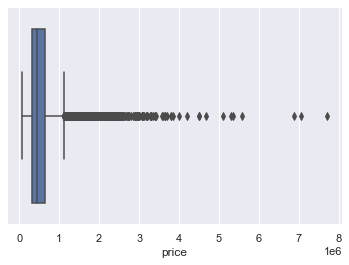

In [154]:
from numpy import mean
from numpy import std 


sns.boxplot(x=data_pred['price'])

## Dealing with outliers 

Removing values that fall outside of 3 std of the mean 

In [157]:
def outlier(df, i):
    ### This function was developed to locate outliers as well as finding the bounds
    ### of the model
    
    price_mean, price_std = mean(df.price), std(df.price)
    
    cutoff = price_std*i
    
    lower_price, upper_price = price_mean - cutoff, price_mean + cutoff
    
    outliers = [x for x in df.price if x < lower_price or x > upper_price]
    
    return sorted(outliers), lower_price, upper_price

In [158]:
outlier(data_pred,3)

([1660000.0,
  1660000.0,
  1660000.0,
  1670000.0,
  1670000.0,
  1680000.0,
  1680000.0,
  1680000.0,
  1680000.0,
  1680000.0,
  1680000.0,
  1680000.0,
  1680000.0,
  1680000.0,
  1680000.0,
  1690000.0,
  1690000.0,
  1690000.0,
  1690000.0,
  1700000.0,
  1700000.0,
  1700000.0,
  1700000.0,
  1700000.0,
  1700000.0,
  1700000.0,
  1700000.0,
  1700000.0,
  1700000.0,
  1700000.0,
  1700000.0,
  1700000.0,
  1700000.0,
  1700000.0,
  1700000.0,
  1700000.0,
  1700000.0,
  1710000.0,
  1710000.0,
  1710000.0,
  1710000.0,
  1710000.0,
  1720000.0,
  1720000.0,
  1720000.0,
  1730000.0,
  1730000.0,
  1730000.0,
  1730000.0,
  1740000.0,
  1740000.0,
  1740000.0,
  1740000.0,
  1740000.0,
  1740000.0,
  1740000.0,
  1750000.0,
  1750000.0,
  1750000.0,
  1750000.0,
  1750000.0,
  1750000.0,
  1750000.0,
  1750000.0,
  1760000.0,
  1760000.0,
  1760000.0,
  1760000.0,
  1770000.0,
  1770000.0,
  1770000.0,
  1780000.0,
  1780000.0,
  1780000.0,
  1780000.0,
  1780000.0,
  1790000.0,

In [159]:
data_pred = data_pred[data_pred.price < 1660000]

In [160]:
data_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18870 entries, 0 to 19220
Data columns (total 12 columns):
price            18870 non-null float64
bedrooms         18870 non-null int64
bathrooms        18870 non-null float64
sqft_lot         18870 non-null int64
sqft_living      18870 non-null int64
floors           18870 non-null float64
waterfront       18870 non-null float64
condition        18870 non-null int64
grade            18870 non-null int64
sqft_above       18870 non-null int64
sqft_basement    18870 non-null float64
zipcode          18870 non-null int64
dtypes: float64(5), int64(7)
memory usage: 1.9 MB


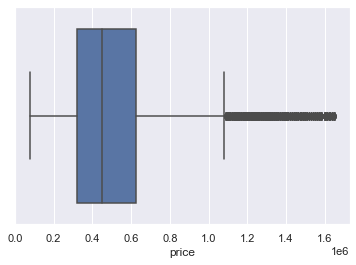

In [161]:
sns.boxplot(x=data_pred['price'])

# EDA - Visualizing the Data

In [ ]:
data_pred['condition'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Condition')
plt.ylabel('Number of Condition Rank')
plt.xlabel('Condition Rank')

In [ ]:
continous = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement' ]
fig, axes = plt.subplots(nrows= 2, ncols= 2, figsize=(12,10))

for xcol, ax in zip(continous, axes.flatten()):
    data_pred.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color= 'b')

fig.tight_layout()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,16))

categoricals = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade']

for col, ax in zip(categoricals, axes.flatten()):
    (data_pred.groupby(col).mean()['price'].sort_values().plot.bar(ax=ax)) 
    ax.set_title(col)                
    
fig.tight_layout()

In [ ]:
data_pred.hist(figsize=(20,15));

In [ ]:
from shapely.geometry import Point, Polygon 
import geopandas as gpd
import descartes

In [ ]:
kings_county = gpd.read_file('C:/Users/egust/Desktop/KingCounty/School_Districts_in_King_County___schdst_area.shp')
kings_county_schools = gpd.read_file('C:/Users/egust/Desktop/School_Sites_in_King_County___schsite_point.shp')
kings_county_cpi = gpd.read_file('C:/Users/egust/Desktop/Common_Points_of_Interest_for_King_County____common_interest_point.shp')

In [ ]:
fig, ax = plt.subplots(figsize = (20,20))
kings_county.plot(ax=ax, cmap = 'gist_earth')
ax.set_title('King County', fontdict = {'fontsize' : 30})
ax.set_ylabel('Latitude', fontdict = {'fontsize' : 20})
ax.set_xlabel('Longitude', fontdict = {'fontsize' : 20})

In [ ]:
fig, ax = plt.subplots(figsize = (20,20))

kings_county.plot(ax=ax, alpha = 0.8, cmap = 'gist_earth')
kings_county_cpi.plot(ax=ax, cmap = 'gist_heat')

ax.set_title('Houses in Kings County, WA', fontdict = {'fontsize':20})
ax.set_ylabel('Latitude', fontdict = {'fontsize' : 20})
ax.set_xlabel('Longitude', fontdict = {'fontsize' : 20})

In [ ]:
fig, ax = plt.subplots(figsize = (20,20))

kings_county.plot(ax=ax, alpha = 0.8, cmap = 'gist_earth')
kings_county_schools.plot(ax=ax, cmap = 'gist_heat', label = 'Schools')

plt.legend(prop = {'size':10} )
ax.set_title('Houses in Kings County, WA', fontdict = {'fontsize':20})
ax.set_ylabel('Latitude', fontdict = {'fontsize' : 20})
ax.set_xlabel('Longitude', fontdict = {'fontsize' : 20})

In [ ]:
crs = {'init': 'epsg:4326'}

geometry = [Point(x,y) 
            for x,y in zip(data['long'], data['lat'])]


In [ ]:
geo_data = gpd.GeoDataFrame(data, crs = crs, geometry = geometry)

In [ ]:
fig, ax = plt.subplots(figsize = (20,20))

kings_county.plot(ax=ax, alpha = 0.8, cmap = 'gist_earth')
geo_data.plot(ax = ax , markersize = 2, color = 'blue', marker ='x', label = 'House', aspect = 1)

plt.legend(prop = {'size':10} )
ax.set_title('Houses in Kings County, WA', fontdict = {'fontsize':20})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

##  Checking Assumption

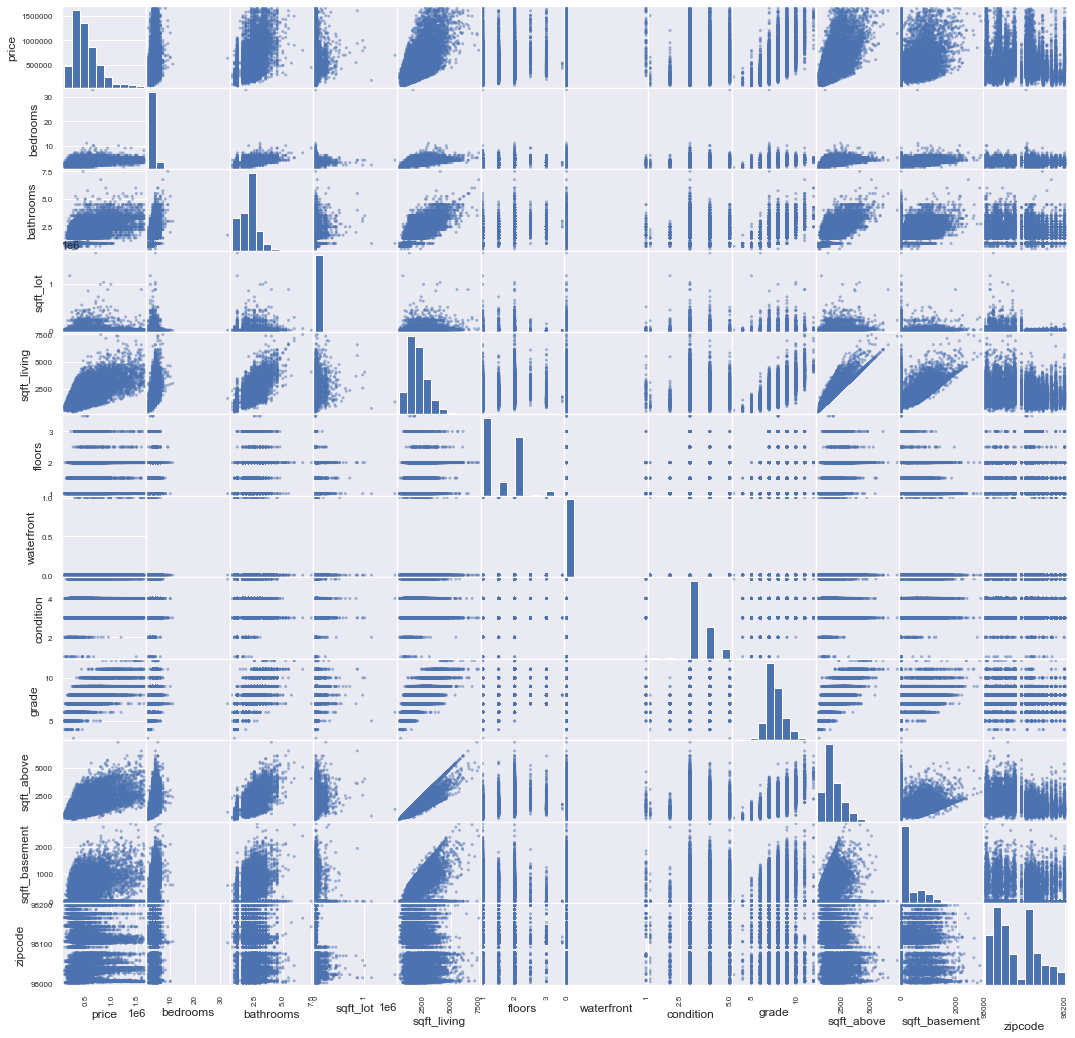

In [163]:
pd.plotting.scatter_matrix(data_pred, figsize = [18,18]);
plt.show()

In [164]:
def correlation(dataframe):
    df= dataframe.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    
    df['pairs'] = list(zip(df.level_0, df.level_1))
    
    df.set_index(['pairs'], inplace= True)
    
    df.drop(columns=['level_1', 'level_0'], inplace= True)
    
    df.columns= ['cc']
    
    df.drop_duplicates(inplace=True)
    
    return df[(df.cc> .75) & (df.cc< 1)]


In [165]:
correlation(data_pred)

cc
pairs                              
(sqft_living, sqft_above)  0.863748

## Remove sft_living

- Case for removing sqft_living
When evaluating this data you can make the argument that both the numbers of bathrooms and bedrooms can represent sqft_living


In [166]:
data_pred = data_pred.drop(columns=['sqft_living'])
data_pred.head()

price  bedrooms  bathrooms  sqft_lot  floors  waterfront  condition  \
0   538000.0         3       2.25      7242     2.0         0.0          3   
1   180000.0         2       1.00     10000     1.0         0.0          3   
2   604000.0         4       3.00      5000     1.0         0.0          5   
3   510000.0         3       2.00      8080     1.0         0.0          3   
4  1230000.0         4       4.50    101930     1.0         0.0          3   

   grade  sqft_above  sqft_basement  zipcode  
0      7        2170          400.0    98125  
1      6         770            0.0    98028  
2      7        1050          910.0    98136  
3      8        1680            0.0    98074  
4     11        3890         1530.0    98053

# Categorical Features

In [167]:
cont = ['price', 'sqft_lot', 'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors']
categorical = [ 'waterfront', 'condition', 'grade']

In [168]:
data_pred[categorical].nunique() ## should I bin the bathrooms to reduce the dimensions of the problem 

waterfront     2
condition      5
grade         10
dtype: int64

In [ ]:
#for cat in categorical:
    #data_pred[cat] = data_pred[cat].astype('category')
    #data_pred[cat] = data_pred[cat].cat.codes

In [170]:
# Creating dummy variables for my categorical variables
waterfront_dummy = pd.get_dummies(data_pred.waterfront, prefix='waterfront', drop_first=True)
condition_dummy = pd.get_dummies(data_pred.condition, prefix='condition', drop_first=True)
grade_dummy = pd.get_dummies(data_pred.grade, prefix='grade', drop_first=True)

# add these new dummy variables into the df
processed_data = pd.concat([data_pred, waterfront_dummy, condition_dummy, grade_dummy], axis=1)
# delete the categorical variables, they are already being represented by the dummy variables
processed_data= processed_data.drop(['waterfront', 'condition', 'grade'], axis=1)


In [171]:
processed_data.columns = processed_data.columns.str.replace('.', '_')
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18870 entries, 0 to 19220
Data columns (total 22 columns):
price             18870 non-null float64
bedrooms          18870 non-null int64
bathrooms         18870 non-null float64
sqft_lot          18870 non-null int64
floors            18870 non-null float64
sqft_above        18870 non-null int64
sqft_basement     18870 non-null float64
zipcode           18870 non-null int64
waterfront_1_0    18870 non-null uint8
condition_2       18870 non-null uint8
condition_3       18870 non-null uint8
condition_4       18870 non-null uint8
condition_5       18870 non-null uint8
grade_4           18870 non-null uint8
grade_5           18870 non-null uint8
grade_6           18870 non-null uint8
grade_7           18870 non-null uint8
grade_8           18870 non-null uint8
grade_9           18870 non-null uint8
grade_10          18870 non-null uint8
grade_11          18870 non-null uint8
grade_12          18870 non-null uint8
dtypes: float64(4), int64

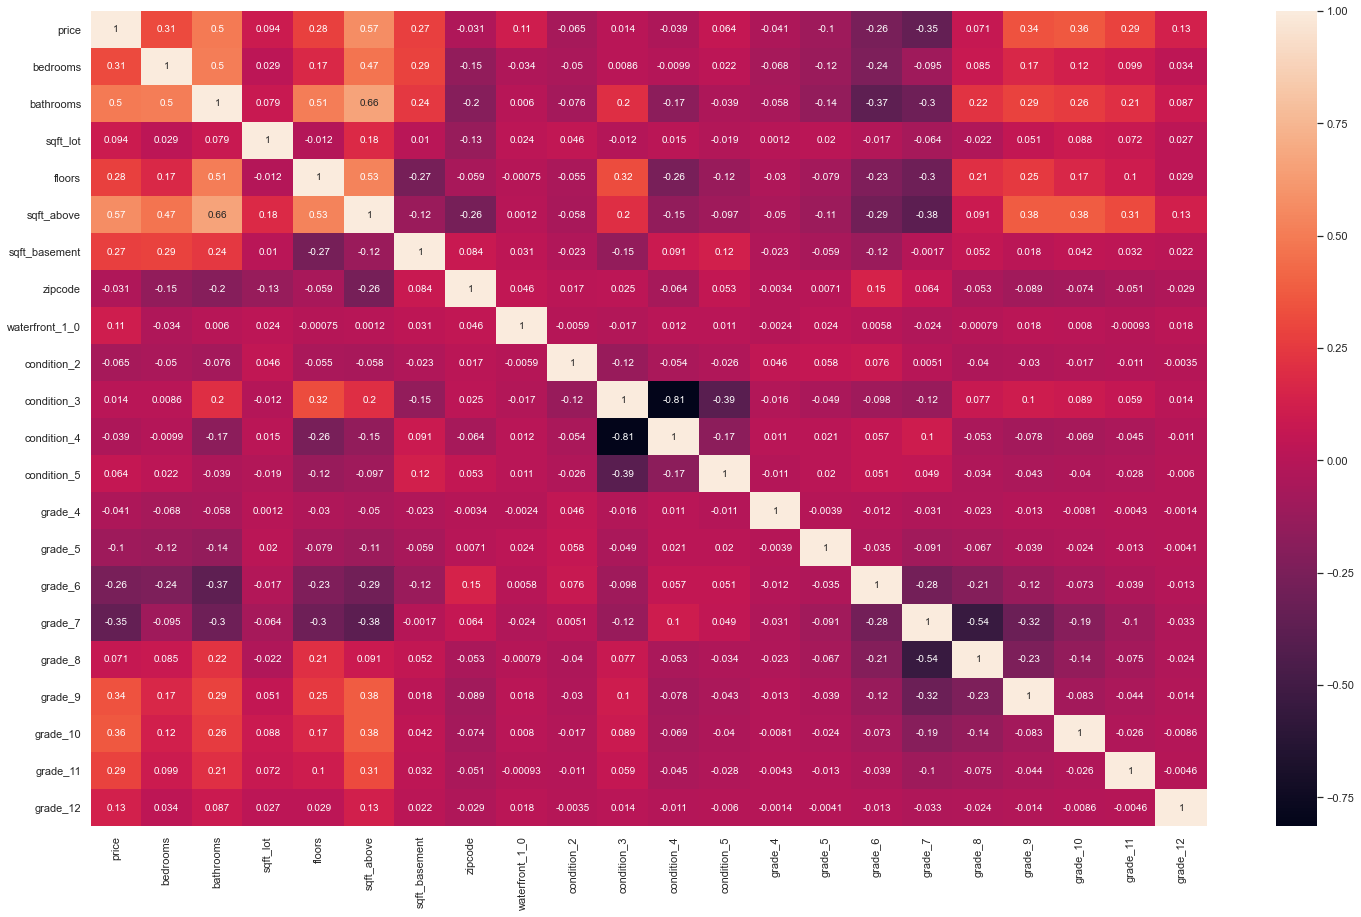

In [172]:
plt.figure(figsize=[25,15])
sns.heatmap(processed_data.corr(),annot=True)

In [173]:
correlation(processed_data)

cc
pairs                              
(condition_3, condition_4)  0.81444

In [174]:
processed_data = processed_data.drop(columns=['condition_4'])

In [175]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

train, test = train_test_split(processed_data)

In [176]:
print(len(train), len(test))

14152 4718


In [177]:
outcome = 'price'
x_cols = list(processed_data.columns)
x_cols.remove(outcome)

In [178]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     949.7
Date:                Mon, 14 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:56:11   Log-Likelihood:            -1.9058e+05
No. Observations:               14152   AIC:                         3.812e+05
Df Residuals:                   14131   BIC:                         3.814e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4.683e+07   2.82e+06    -16.629      0.000   -5.24e+07   -4.13e+07
bedrooms       -7308.5721   1985.876     -3.680      0.000   -1.12e+04   -3415.993
bathrooms      -9641.6579   3322.556     -2.902      0.004   -1.62e+04   -3129.011
sqft_lot          -0.0420      0.035     -1.185      0.236      -0.111       0.027
floors          1.788e+04   3767.361      4.747      0.000    1.05e+04    2.53e+04
sqft_above       100.2175      3.687     27.182      0.000      92.991     107.444
sqft_basement    156.9639      4.499     34.886      0.000     148.145     165.783
zipcode          479.2141     28.682     16.708      0.000     422.994     535.434
waterfront_1_0  3.333e+05   2.17e+04     15.352      0.000    2.91e+05    3.76e+05
condition_2    -5.534e+04   1.71e+04     -3.241      0.001   -8.88e+04   -2.19e+04
condition_3     -4.61e+04   3504.655    -13.154      0.000    -5.3e+04   -3.92e+04
condition_5     6.726e+04   5884.425     11.430      0.000    5.57e+04    7.88e+04
grade_4         3454.6178   1.76e+05      0.020      0.984   -3.41e+05    3.48e+05
grade_5        -2730.7972   1.71e+05     -0.016      0.987   -3.39e+05    3.33e+05
grade_6         2.564e+04   1.71e+05      0.150      0.881    -3.1e+05    3.61e+05
grade_7         9.097e+04   1.71e+05      0.532      0.595   -2.44e+05    4.26e+05
grade_8         1.801e+05   1.71e+05      1.053      0.292   -1.55e+05    5.15e+05
grade_9         3.364e+05   1.71e+05      1.966      0.049    1001.164    6.72e+05
grade_10        4.699e+05   1.71e+05      2.744      0.006    1.34e+05    8.06e+05
grade_11        6.211e+05   1.72e+05      3.618      0.000    2.85e+05    9.58e+05
grade_12        7.827e+05   1.75e+05      4.468      0.000    4.39e+05    1.13e+06
==============================================================================
Omnibus:                     2489.653   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6552.582
Skew:                           0.961   Prob(JB):                         0.00
Kurtosis:                       5.723   Cond. No.                     1.95e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Checking for Multicollinearity

We examined our variables for Multicollinearity by looking if there are corralations between variables that are greater than .75, however we still have not accounted for all possible developments. 
In order to access if there is any multicollinearity in our model we will use the method __variance inflation factor__ after every model and modification to the model. We are searching for values that are equal to or greater than 5.

In [179]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [181]:
def vif(train):
    X = train[x_cols]
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return list(zip(x_cols, vif))

In [182]:
vif(train)

[('bedrooms', 23.23126630412021),
 ('bathrooms', 25.892577728788915),
 ('sqft_lot', 1.2047767877540672),
 ('floors', 16.859232725476396),
 ('sqft_above', 24.06152055217989),
 ('sqft_basement', 2.4657142310364706),
 ('zipcode', 14141.4232012311),
 ('waterfront_1_0', 1.0133317073379557),
 ('condition_2', 1.038575136296914),
 ('condition_3', 3.8382496003306867),
 ('condition_5', 1.3100406595408052),
 ('grade_4', 18.975050489607433),
 ('grade_5', 159.82669473523188),
 ('grade_6', 1362.1552370633838),
 ('grade_7', 5950.790796851997),
 ('grade_8', 4078.3497086803372),
 ('grade_9', 1695.918327949801),
 ('grade_10', 663.9260339321395),
 ('grade_11', 204.59673104552184),
 ('grade_12', 23.085606753029545)]

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


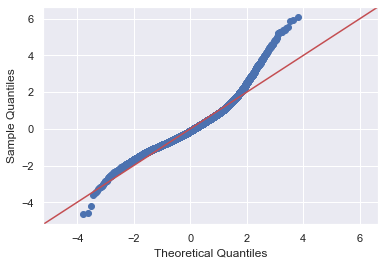

In [183]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [184]:
from scipy.stats import norm 
sns.set()

In [185]:
# Will create a function to test for heteroskedasity
def Heteroskedasticity_test(model):
    plt.figure(figsize=(15,10))
    ax = sns.scatterplot(x = model.fittedvalues, y = model.resid)
    ax.grid()
    ax.axhline(y=0, color='r', linewidth=4) 
    ax.set_xlabel("Fitted Values");
    ax.set_ylabel("Residual");

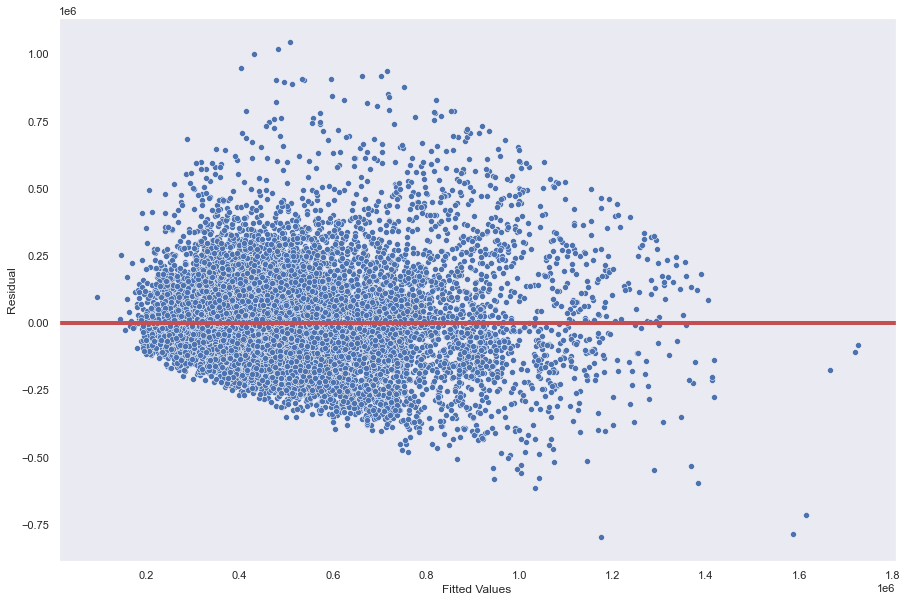

In [186]:
Heteroskedasticity_test(model)

In [187]:
# Will be creating a function to look at QQ-plots and residual distribution
def norm_dist_assumption(residual):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 10))
    
    sm.graphics.qqplot(residual, dist=stats.norm, line='45', fit=True, ax=ax1)
    ax1.grid()
    ax1.set_title('Q-Q plot of normalized residuals')
    
    #This will create help you look at the distribution of the residuals and the normalized residuals
    sns.distplot(residual, color='blue', kde=False, fit=norm, ax=ax2, vertical=True,)
    ax2.grid()
    ax2.set_xlabel("Count");
    ax2.set_ylabel("Residual");
    ax2.set_title('Histogram of normalized residuals')
    

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


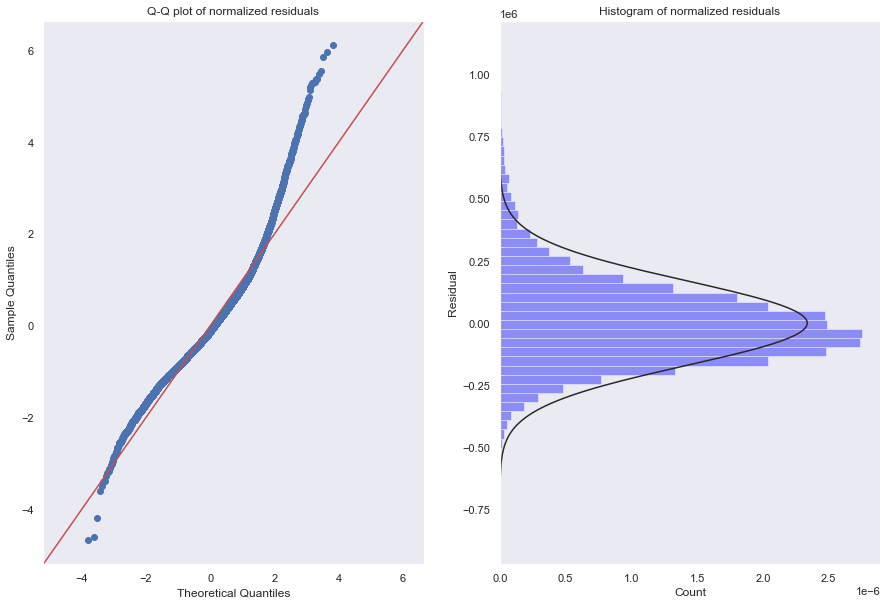

In [188]:
norm_dist_assumption(residuals)

# Model improvement 

# Normalization to improve model

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\egust\anaco

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024AB2BF3DA0>,
      dtype=object)

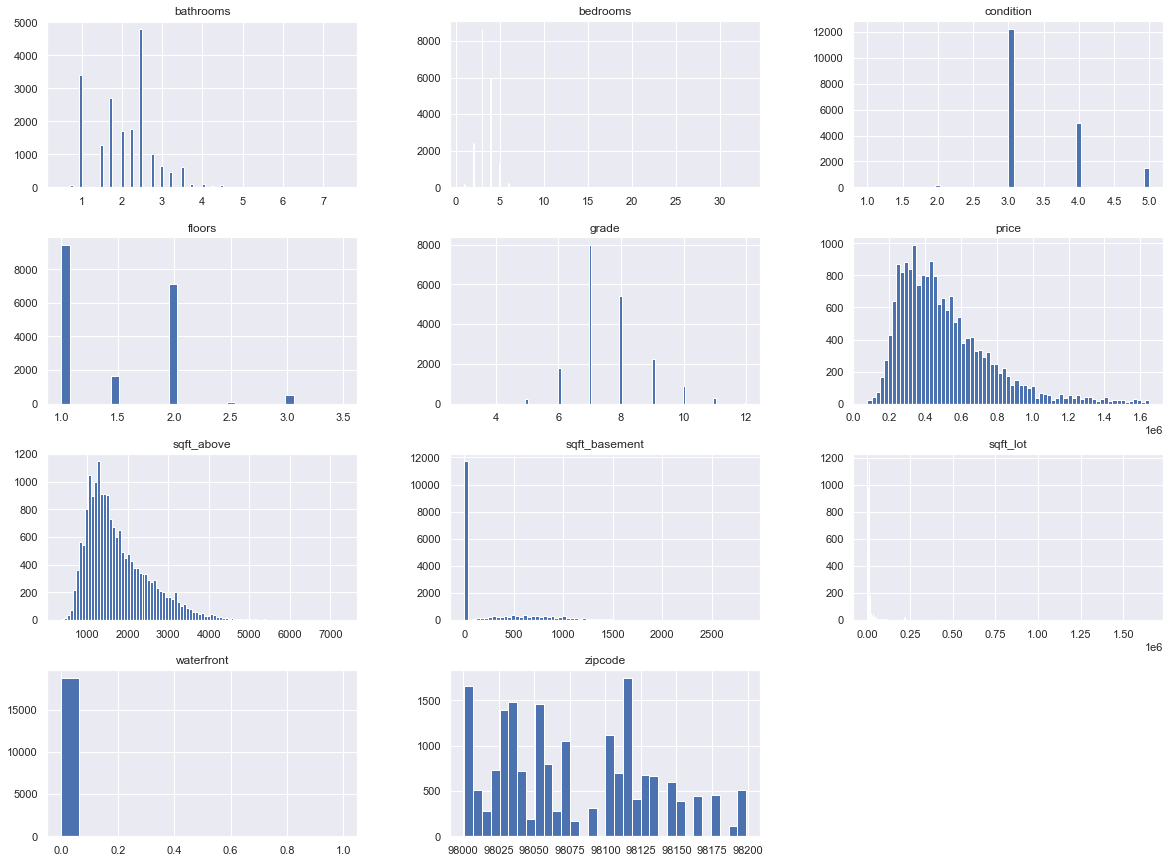

In [189]:
data_pred.hist(figsize=(20,15), bins='auto')

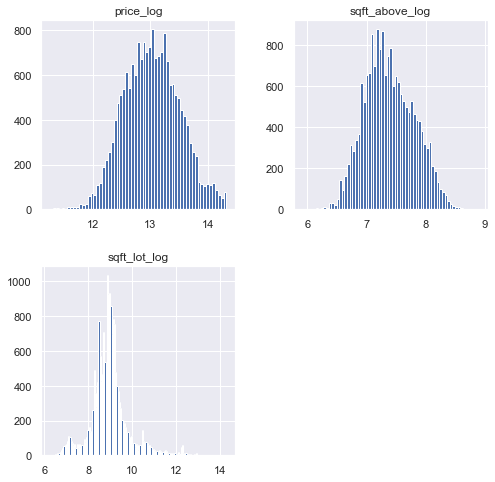

In [190]:
data_pred_cont = data_pred[['price', 'sqft_above', 'sqft_lot']]
log_names = [f'{column}_log' for column in data_pred_cont.columns]

data_pc_log = np.log(data_pred_cont)
data_pc_log.columns = log_names
data_pc_log.hist(figsize = [8,8], bins = 'auto')
fig.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024AC74CA2E8>,
      dtype=object)

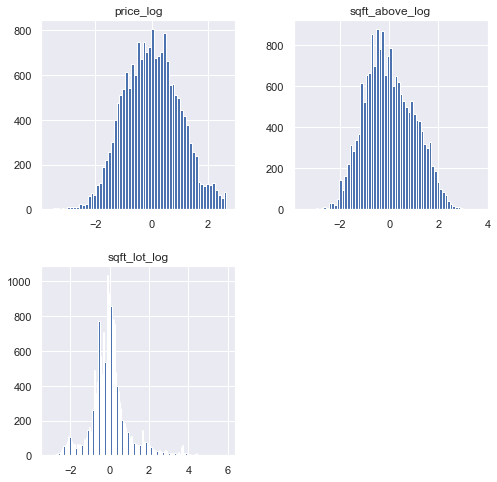

In [191]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_final = data_pc_log.apply(normalize)

features_final.hist(figsize  = [8, 8], bins= 'auto')

In [192]:
processed_data_norm = pd.concat([processed_data, features_final], axis=1)
processed_data_norm= processed_data_norm.drop(['price', 'sqft_above', 'sqft_lot'], axis=1)


In [193]:
processed_data_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18870 entries, 0 to 19220
Data columns (total 21 columns):
bedrooms          18870 non-null int64
bathrooms         18870 non-null float64
floors            18870 non-null float64
sqft_basement     18870 non-null float64
zipcode           18870 non-null int64
waterfront_1_0    18870 non-null uint8
condition_2       18870 non-null uint8
condition_3       18870 non-null uint8
condition_5       18870 non-null uint8
grade_4           18870 non-null uint8
grade_5           18870 non-null uint8
grade_6           18870 non-null uint8
grade_7           18870 non-null uint8
grade_8           18870 non-null uint8
grade_9           18870 non-null uint8
grade_10          18870 non-null uint8
grade_11          18870 non-null uint8
grade_12          18870 non-null uint8
price_log         18870 non-null float64
sqft_above_log    18870 non-null float64
sqft_lot_log      18870 non-null float64
dtypes: float64(6), int64(2), uint8(13)
memory usage: 1.5 MB

In [194]:
train_norm, test_norm = train_test_split(processed_data_norm)

In [195]:
outcome = 'price_log'
x_cols = list(processed_data_norm.columns)
x_cols.remove(outcome)

In [196]:
predictors_vnorm = '+'.join(x_cols)
formula_vnorm = outcome + '~' + predictors_vnorm
model_vnorm = ols(formula=formula_vnorm, data=train_norm).fit()
model_vnorm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     853.9
Date:                Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:08:40   Log-Likelihood:                -14463.
No. Observations:               14152   AIC:                         2.897e+04
Df Residuals:                   14131   BIC:                         2.913e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -203.4335     11.349    -17.926      0.000    -225.679    -181.188
bedrooms          -0.0401      0.008     -5.043      0.000      -0.056      -0.025
bathrooms         -0.0186      0.013     -1.429      0.153      -0.044       0.007
floors             0.0253      0.016      1.563      0.118      -0.006       0.057
sqft_basement      0.0006   1.76e-05     31.732      0.000       0.001       0.001
zipcode            0.0021      0.000     17.913      0.000       0.002       0.002
waterfront_1_0     0.9713      0.086     11.258      0.000       0.802       1.140
condition_2       -0.3918      0.064     -6.076      0.000      -0.518      -0.265
condition_3       -0.1871      0.014    -13.501      0.000      -0.214      -0.160
condition_5        0.2489      0.023     10.612      0.000       0.203       0.295
grade_4           -0.5024      0.688     -0.730      0.466      -1.852       0.847
grade_5           -0.5657      0.675     -0.838      0.402      -1.890       0.758
grade_6           -0.2428      0.674     -0.360      0.719      -1.563       1.078
grade_7            0.1453      0.674      0.216      0.829      -1.175       1.466
grade_8            0.5799      0.674      0.860      0.390      -0.741       1.901
grade_9            1.1081      0.674      1.643      0.100      -0.214       2.430
grade_10           1.4717      0.675      2.180      0.029       0.149       2.795
grade_11           1.7771      0.676      2.627      0.009       0.451       3.103
grade_12           2.1220      0.690      3.075      0.002       0.769       3.475
sqft_above_log     0.3130      0.012     26.110      0.000       0.289       0.336
sqft_lot_log      -0.0569      0.007     -7.814      0.000      -0.071      -0.043
==============================================================================
Omnibus:                        3.049   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                3.017
Skew:                           0.033   Prob(JB):                        0.221
Kurtosis:                       3.026   Cond. No.                     1.97e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
vif(train_norm)

[('bedrooms', 23.839502365763426),
 ('bathrooms', 25.691928261449707),
 ('floors', 20.58720176188218),
 ('sqft_basement', 2.4240462689785973),
 ('zipcode', 14210.402144405689),
 ('waterfront_1_0', 1.0152597548950741),
 ('condition_2', 1.0467250029735966),
 ('condition_3', 3.8888542632947387),
 ('condition_5', 1.304058226829298),
 ('grade_4', 22.978402448494226),
 ('grade_5', 158.89140919877192),
 ('grade_6', 1335.0572059536098),
 ('grade_7', 5969.335196409199),
 ('grade_8', 4103.269333675416),
 ('grade_9', 1684.3583549770722),
 ('grade_10', 677.8472049582529),
 ('grade_11', 197.7213544827678),
 ('grade_12', 23.090709248084874),
 ('sqft_above_log', 4.443307742710519),
 ('sqft_lot_log', 1.5892436519161688)]

# Normalize all the variables

In [ ]:
data_pc_log

In [205]:
processed_data_allnorm = pd.concat([processed_data, data_pc_log], axis=1)
processed_data_allnorm= processed_data_allnorm.drop(['price', 'sqft_above', 'sqft_lot'], axis=1)


In [206]:
processed_data_allnorm.head()

bedrooms  bathrooms  floors  sqft_basement  zipcode  waterfront_1_0  \
0         3       2.25     2.0          400.0    98125               0   
1         2       1.00     1.0            0.0    98028               0   
2         4       3.00     1.0          910.0    98136               0   
3         3       2.00     1.0            0.0    98074               0   
4         4       4.50     1.0         1530.0    98053               0   

   condition_2  condition_3  condition_5  grade_4  ...  grade_6  grade_7  \
0            0            1            0        0  ...        0        1   
1            0            1            0        0  ...        1        0   
2            0            0            1        0  ...        0        1   
3            0            1            0        0  ...        0        0   
4            0            1            0        0  ...        0        0   

   grade_8  grade_9  grade_10  grade_11  grade_12  price_log  sqft_above_log  \
0        0        0         0         0         0  13.195614        7.682482   
1        0        0         0         0         0  12.100712        6.646391   
2        0        0         0         0         0  13.311329        6.956545   
3        1        0         0         0         0  13.142166        7.426549   
4        0        0         0         1         0  14.022525        8.266164   

   sqft_lot_log  
0      8.887653  
1      9.210340  
2      8.517193  
3      8.997147  
4     11.532042  

[5 rows x 21 columns]

In [207]:
all_features_final = processed_data_allnorm.apply(normalize)
all_features_final.head()

bedrooms  bathrooms    floors  sqft_basement   zipcode  waterfront_1_0  \
0 -0.388932   0.218910  0.950645       0.297307  0.880193       -0.066063   
1 -1.475407  -1.479761 -0.905304      -0.649261 -0.938077       -0.066063   
2  0.697544   1.238112 -0.905304       1.504181  1.086389       -0.066063   
3 -0.388932  -0.120824 -0.905304      -0.649261 -0.075805       -0.066063   
4  0.697544   3.276516 -0.905304       2.971362 -0.469451       -0.066063   

   condition_2  condition_3  condition_5   grade_4  ...   grade_6   grade_7  \
0    -0.089812     0.734678    -0.290008 -0.036422  ... -0.325715  1.169045   
1    -0.089812     0.734678    -0.290008 -0.036422  ...  3.070002 -0.855354   
2    -0.089812    -1.361069     3.448001 -0.036422  ... -0.325715  1.169045   
3    -0.089812     0.734678    -0.290008 -0.036422  ... -0.325715 -0.855354   
4    -0.089812     0.734678    -0.290008 -0.036422  ... -0.325715 -0.855354   

    grade_8   grade_9  grade_10  grade_11  grade_12  price_log  \
0 -0.632732 -0.369691 -0.223265 -0.118426 -0.038548   0.361307   
1 -0.632732 -0.369691 -0.223265 -0.118426 -0.038548  -1.896004   
2 -0.632732 -0.369691 -0.223265 -0.118426 -0.038548   0.599873   
3  1.580364 -0.369691 -0.223265 -0.118426 -0.038548   0.251116   
4 -0.632732 -0.369691 -0.223265  8.443641 -0.038548   2.066114   

   sqft_above_log  sqft_lot_log  
0        0.723636     -0.101643  
1       -1.765792      0.256871  
2       -1.020580     -0.513234  
3        0.108702      0.020008  
4        2.126055      2.836342  

[5 rows x 21 columns]

In [208]:
train_norm2, test_norm2 = train_test_split(all_features_final)

In [209]:
outcome = 'price_log'
x_cols = list(all_features_final.columns)
x_cols.remove(outcome)

In [210]:
predictors_allnorm = '+'.join(x_cols)
formula_allnorm = outcome + '~' + predictors_allnorm
model_allnorm = ols(formula=formula_allnorm, data=train_norm2).fit()
model_allnorm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     860.3
Date:                Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:32:01   Log-Likelihood:                -14510.
No. Observations:               14152   AIC:                         2.906e+04
Df Residuals:                   14131   BIC:                         2.922e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0008      0.006     -0.145      0.885      -0.012       0.010
bedrooms          -0.0335      0.007     -4.614      0.000      -0.048      -0.019
bathrooms         -0.0083      0.010     -0.858      0.391      -0.027       0.011
floors             0.0172      0.009      1.961      0.050    1.02e-05       0.034
sqft_basement      0.2370      0.007     31.719      0.000       0.222       0.252
zipcode            0.1111      0.006     17.925      0.000       0.099       0.123
waterfront_1_0     0.0643      0.006     11.301      0.000       0.053       0.076
condition_2       -0.0302      0.006     -5.277      0.000      -0.041      -0.019
condition_3       -0.0906      0.007    -13.684      0.000      -0.104      -0.078
condition_5        0.0654      0.006     10.452      0.000       0.053       0.078
grade_4           -0.0117      0.025     -0.462      0.644      -0.061       0.038
grade_5           -0.0545      0.071     -0.763      0.445      -0.195       0.085
grade_6           -0.0699      0.199     -0.351      0.726      -0.460       0.320
grade_7            0.0604      0.334      0.181      0.856      -0.594       0.715
grade_8            0.2537      0.306      0.830      0.406      -0.345       0.853
grade_9            0.3493      0.220      1.587      0.113      -0.082       0.781
grade_10           0.3108      0.144      2.158      0.031       0.029       0.593
grade_11           0.2100      0.079      2.649      0.008       0.055       0.365
grade_12           0.0787      0.027      2.955      0.003       0.026       0.131
sqft_above_log     0.3113      0.012     25.758      0.000       0.288       0.335
sqft_lot_log      -0.0555      0.007     -7.627      0.000      -0.070      -0.041
==============================================================================
Omnibus:                        1.013   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.988
Skew:                           0.018   Prob(JB):                        0.610
Kurtosis:                       3.018   Cond. No.                         188.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [211]:
vif(train_norm2)

[('bedrooms', 1.695382216150837),
 ('bathrooms', 2.8842043703169793),
 ('floors', 2.411361947442737),
 ('sqft_basement', 1.724756732045164),
 ('zipcode', 1.197248507460431),
 ('waterfront_1_0', 1.014749211070789),
 ('condition_2', 1.039662075660694),
 ('condition_3', 1.3601933616436852),
 ('condition_5', 1.2079167070191643),
 ('grade_4', 19.001828256012956),
 ('grade_5', 162.34450472097848),
 ('grade_6', 1242.2916453812427),
 ('grade_7', 3457.694104596434),
 ('grade_8', 2892.844973682874),
 ('grade_9', 1507.3815522881762),
 ('grade_10', 669.5623163753985),
 ('grade_11', 187.55933087233504),
 ('grade_12', 24.10866013822436),
 ('sqft_above_log', 4.590087385531209),
 ('sqft_lot_log', 1.6595844734689889)]

In [212]:
#Backward Elimination
y = all_features_final['price_log']
cols = x_cols
X = all_features_final[x_cols]
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE_norm = cols
print(selected_features_BE_norm)

['bedrooms', 'sqft_basement', 'zipcode', 'waterfront_1_0', 'condition_2', 'condition_3', 'condition_5', 'grade_4', 'grade_5', 'grade_6', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'sqft_above_log', 'sqft_lot_log']


C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [215]:
predictors_vnorm2 = '+'.join(selected_features_BE_norm)
formula_vnorm2 = outcome + '~' + predictors_vnorm2
model_vnorm2 = ols(formula=formula_vnorm2, data=train_norm2).fit()
model_vnorm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     1012.
Date:                Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:44:00   Log-Likelihood:                -14512.
No. Observations:               14152   AIC:                         2.906e+04
Df Residuals:                   14134   BIC:                         2.920e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0008      0.006     -0.142      0.887      -0.012       0.010
bedrooms          -0.0349      0.007     -4.861      0.000      -0.049      -0.021
sqft_basement      0.2319      0.007     34.578      0.000       0.219       0.245
zipcode            0.1121      0.006     18.197      0.000       0.100       0.124
waterfront_1_0     0.0647      0.006     11.372      0.000       0.054       0.076
condition_2       -0.0300      0.006     -5.241      0.000      -0.041      -0.019
condition_3       -0.0893      0.007    -13.706      0.000      -0.102      -0.077
condition_5        0.0652      0.006     10.435      0.000       0.053       0.077
grade_4           -0.0158      0.006     -2.705      0.007      -0.027      -0.004
grade_5           -0.0670      0.006    -11.572      0.000      -0.078      -0.056
grade_6           -0.1056      0.006    -16.598      0.000      -0.118      -0.093
grade_8            0.1998      0.007     28.743      0.000       0.186       0.213
grade_9            0.3105      0.007     41.850      0.000       0.296       0.325
grade_10           0.2853      0.007     41.490      0.000       0.272       0.299
grade_11           0.1956      0.006     30.527      0.000       0.183       0.208
grade_12           0.0738      0.006     13.364      0.000       0.063       0.085
sqft_above_log     0.3165      0.010     30.167      0.000       0.296       0.337
sqft_lot_log      -0.0610      0.006     -9.505      0.000      -0.074      -0.048
==============================================================================
Omnibus:                        0.800   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.670   Jarque-Bera (JB):                0.773
Skew:                           0.015   Prob(JB):                        0.679
Kurtosis:                       3.020   Cond. No.                         3.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
vif(train_norm2[selected_features_BE_norm])

[('bedrooms', 1.6549171806852156),
 ('sqft_basement', 1.3893497721363686),
 ('zipcode', 1.1811053321754466),
 ('waterfront_1_0', 1.0131175359654272),
 ('condition_2', 1.0388476723683815),
 ('condition_3', 1.3184354523011617),
 ('condition_5', 1.2040055710737942),
 ('grade_4', 1.0201800972658912),
 ('grade_5', 1.0658398864575995),
 ('grade_6', 1.2681649104999868),
 ('grade_8', 1.4962224855278723),
 ('grade_9', 1.7132437167118237),
 ('grade_10', 1.5259486879241988),
 ('grade_11', 1.2245981848672938),
 ('grade_12', 1.0363581298580777),
 ('sqft_above_log', 3.4598971225252275),
 ('sqft_lot_log', 1.2925840841894758)]

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


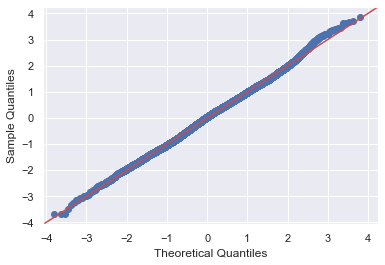

In [214]:
residuals_vnorm2 = model_vnorm2.resid
fig = sm.graphics.qqplot(residuals_vnorm2, dist=stats.norm, line='45', fit=True)
fig.show()

# Modified Model version 2 

In [32]:
data_pred

price  bedrooms  bathrooms  sqft_lot  sqft_living  floors  \
0       538000.0         3       2.25      7242         2570     2.0   
1       180000.0         2       1.00     10000          770     1.0   
2       604000.0         4       3.00      5000         1960     1.0   
3       510000.0         3       2.00      8080         1680     1.0   
4      1230000.0         4       4.50    101930         5420     1.0   
...          ...       ...        ...       ...          ...     ...   
19216   475000.0         3       2.50      1294         1310     2.0   
19217   360000.0         3       2.50      1131         1530     3.0   
19218   400000.0         4       2.50      5813         2310     2.0   
19219   402101.0         2       0.75      1350         1020     2.0   
19220   325000.0         2       0.75      1076         1020     2.0   

       waterfront  condition  grade  sqft_above  sqft_basement  zipcode  
0             0.0          3      7        2170          400.0    98125  
1             0.0          3      6         770            0.0    98028  
2             0.0          5      7        1050          910.0    98136  
3             0.0          3      8        1680            0.0    98074  
4             0.0          3     11        3890         1530.0    98053  
...           ...        ...    ...         ...            ...      ...  
19216         0.0          3      8        1180          130.0    98116  
19217         0.0          3      8        1530            0.0    98103  
19218         0.0          3      8        2310            0.0    98146  
19219         0.0          3      7        1020            0.0    98144  
19220         0.0          3      7        1020            0.0    98144  

[19221 rows x 12 columns]

In [33]:
## adding the school district, with grading ranks, size of school and student size 

## Create functions that 

In [34]:
kc_school_district = pd.read_csv('kc_school_district.csv')

In [35]:
kc_school_district.drop('Unnamed: 0', axis=1, inplace=True)

In [36]:
kc_school_district

district grade  total_sch total_student  \
0        mercer island    A+          6         4,522   
1      lake washington    A+         55        30,675   
2             issaquah    A+         27        20,897   
3             bellevue    A+         31        21,609   
4        vashon island     A          5         1,585   
5           northshore     A         39         23500   
6            shoreline     A         19         9,899   
7               tahoma     A          9         8,906   
8    snoqualmie valley    A-         13         7,214   
9              seattle    A-        108        55,271   
10           riverview    B+          9         3,482   
11            enumclaw     B         10         4,183   
12           skykomish     B          2            57   
13                kent     B         44        27,291   
14              auburn     B         24        17,505   
15              renton    B-         29        16,425   
16         federal way    C+         46        23,489   
17            highline    C+         40        19,213   
18             tukwila    C+          8         3,046   
19  muckleshoot tribal    D+          1           492   

                                              zipcode  grade_num  
0                                             [98040]         13  
1   [98028, 98033, 98034, 98052, 98053, 98074, 98077]         13  
2   [98006, 98008, 98027, 98029, 98059, 98065, 98075]         13  
3   [98004, 98005, 98006, 98007, 98008, 98039, 98121]         13  
4                                             [98070]         12  
5                 [98011, 98028, 98052, 98072, 98077]         12  
6                               [98133, 98155, 98177]         12  
7                               [98038, 98042, 98051]         12  
8                               [98024, 98045, 98065]         11  
9   [98101, 98102, 98103, 98104, 98105, 98106, 981...         11  
10                                     [98014, 98019]         10  
11                                     [98010, 98022]          9  
12                                            [98288]          9  
13  [98010, 98030, 98031, 98032, 98042, 98058, 98198]          9  
14                       [98001, 98002, 98047, 98092]          9  
15         [98055, 98056, 98057, 98058, 98059, 98178]          8  
16                [98001, 98003, 98023, 98032, 98198]          7  
17         [98146, 98148, 98166, 98168, 98188, 98198]          7  
18                                     [98168, 98188]          7  
19                                                NaN          4

In [37]:
kc_school_district['zipcode'][6]

'[98133, 98155, 98177]'

In [38]:
import ast
for key in range(len(kc_school_district['zipcode'])):
    kc_school_district['zipcode'][key] = ast.literal_eval(kc_school_district['zipcode'][key])

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: malformed node or string: nan

In [39]:
def district(zipcode):
    try:
        for key in range(len(kc_school_district['zipcode'])):
            if zipcode in kc_school_district['zipcode'][key]:
                district = kc_school_district['district'][key]
    except Exception:
        pass
    return district

In [40]:
def districts(zipcodes):
    try:
        x = district(zipcodes)
         
    except UnboundLocalError:
        x = 0

    return x

In [41]:
districts(98288)

'skykomish'

In [42]:
district_KC = []
for zipcode in data_pred['zipcode']:
    district_KC.append(districts(zipcode))

In [43]:
def grade(zipcode):
    try:
        for key in range(len(kc_school_district['zipcode'])):
            if zipcode in kc_school_district['zipcode'][key]:
                grade = kc_school_district['grade'][key]
    except Exception:
        pass
    return grade

In [44]:
def grades(zipcodes):
    try:
        x = grade(zipcodes)
         
    except UnboundLocalError:
        x = 0

    return x

In [45]:
grades_KC = []
for zipcode in data_pred['zipcode']:
    grades_KC.append(grades(zipcode))

In [46]:
def total_sch(zipcode):
    try:
        for key in range(len(kc_school_district['zipcode'])):
            if zipcode in kc_school_district['zipcode'][key]:
                total_sch = kc_school_district['total_sch'][key]
    except Exception:
        pass
    return total_sch

In [47]:
def total_schs(zipcodes):
    try:
        x = total_sch(zipcodes)
         
    except UnboundLocalError:
        x = 0

    return x

In [48]:
total_schs_KC = []
for zipcode in data_pred['zipcode']:
    total_schs_KC.append(total_schs(zipcode))

In [49]:
def total_student(zipcode):
    try:
        for key in range(len(kc_school_district['zipcode'])):
            if zipcode in kc_school_district['zipcode'][key]:
                total_student = kc_school_district['total_student'][key]
    except Exception:
        pass
    return total_student

In [50]:
def total_students(zipcodes):
    try:
        x = total_student(zipcodes)
         
    except UnboundLocalError:
        x = 0

    return x

In [51]:
total_student_KC = []
for zipcode in data_pred['zipcode']:
    total_student_KC.append(total_students(zipcode))

In [52]:
def grade_num(zipcode):
    try:
        for key in range(len(kc_school_district['zipcode'])):
            if zipcode in kc_school_district['zipcode'][key]:
                grade_num = kc_school_district['grade_num'][key]
    except Exception:
        pass
    return grade_num

In [53]:
def grade_nums(zipcodes):
    try:
        x = grade_num(zipcodes)
         
    except UnboundLocalError:
        x = 0

    return x

In [54]:
grade_nums_KC = []
for zipcode in data_pred['zipcode']:
    grade_nums_KC.append(grade_nums(zipcode))

In [55]:
x = {'district': district_KC, 
     'grades': grades_KC,
     'grade_num': grade_nums_KC,
     'total_sch': total_schs_KC,
     'total_student': total_student_KC} 

In [56]:
df_school_district = pd.DataFrame(x, columns = ['district','grades','grade_num','total_sch','total_student'])
df_school_district

district grades  grade_num  total_sch total_student
0              seattle     A-         11        108        55,271
1           northshore      A         12         39         23500
2              seattle     A-         11        108        55,271
3      lake washington     A+         13         55        30,675
4      lake washington     A+         13         55        30,675
...                ...    ...        ...        ...           ...
19216          seattle     A-         11        108        55,271
19217          seattle     A-         11        108        55,271
19218         highline     C+          7         40        19,213
19219          seattle     A-         11        108        55,271
19220          seattle     A-         11        108        55,271

[19221 rows x 5 columns]

In [57]:
data_pred2 = pd.concat([data_pred, df_school_district], axis=1)
data_pred2

price  bedrooms  bathrooms  sqft_lot  sqft_living  floors  \
0       538000.0         3       2.25      7242         2570     2.0   
1       180000.0         2       1.00     10000          770     1.0   
2       604000.0         4       3.00      5000         1960     1.0   
3       510000.0         3       2.00      8080         1680     1.0   
4      1230000.0         4       4.50    101930         5420     1.0   
...          ...       ...        ...       ...          ...     ...   
19216   475000.0         3       2.50      1294         1310     2.0   
19217   360000.0         3       2.50      1131         1530     3.0   
19218   400000.0         4       2.50      5813         2310     2.0   
19219   402101.0         2       0.75      1350         1020     2.0   
19220   325000.0         2       0.75      1076         1020     2.0   

       waterfront  condition  grade  sqft_above  sqft_basement  zipcode  \
0             0.0          3      7        2170          400.0    98125   
1             0.0          3      6         770            0.0    98028   
2             0.0          5      7        1050          910.0    98136   
3             0.0          3      8        1680            0.0    98074   
4             0.0          3     11        3890         1530.0    98053   
...           ...        ...    ...         ...            ...      ...   
19216         0.0          3      8        1180          130.0    98116   
19217         0.0          3      8        1530            0.0    98103   
19218         0.0          3      8        2310            0.0    98146   
19219         0.0          3      7        1020            0.0    98144   
19220         0.0          3      7        1020            0.0    98144   

              district grades  grade_num  total_sch total_student  
0              seattle     A-         11        108        55,271  
1           northshore      A         12         39         23500  
2              seattle     A-         11        108        55,271  
3      lake washington     A+         13         55        30,675  
4      lake washington     A+         13         55        30,675  
...                ...    ...        ...        ...           ...  
19216          seattle     A-         11        108        55,271  
19217          seattle     A-         11        108        55,271  
19218         highline     C+          7         40        19,213  
19219          seattle     A-         11        108        55,271  
19220          seattle     A-         11        108        55,271  

[19221 rows x 17 columns]

In [58]:
data_pred2.to_csv('data_pred2')

# Dealing with Outliers


### Removing values that fall outside of 3 std of the mean

In [169]:
price_mean, price_std = mean(data_pred.price), std(data_pred.price)

cutoff = price_std*3

lower_price, upper_price = price_mean - cutoff, price_mean + cutoff

# identify outliers 

outliers = [x for x in data_pred.price if x < lower_price or x > upper_price]

In [170]:
data_pred = data_pred[data_pred.price < 1660000]

In [171]:
data_pred = data_pred.drop(columns=['grades'])
data_pred.head()

price  bedrooms  bathrooms  sqft_lot  sqft_living  floors  waterfront  \
0   538000.0         3       2.25      7242         2570     2.0         0.0   
1   180000.0         2       1.00     10000          770     1.0         0.0   
2   604000.0         4       3.00      5000         1960     1.0         0.0   
3   510000.0         3       2.00      8080         1680     1.0         0.0   
4  1230000.0         4       4.50    101930         5420     1.0         0.0   

   condition  grade  sqft_above  sqft_basement  zipcode         district  \
0          3      7        2170          400.0    98125          seattle   
1          3      6         770            0.0    98028       northshore   
2          5      7        1050          910.0    98136          seattle   
3          3      8        1680            0.0    98074  lake washington   
4          3     11        3890         1530.0    98053  lake washington   

   grade_num  total_sch total_student  
0         11        108        55,271  
1         12         39         23500  
2         11        108        55,271  
3         13         55        30,675  
4         13         55        30,675

# Categorical Features

In [172]:
data_pred.nunique() < 30

price            False
bedrooms          True
bathrooms         True
sqft_lot         False
sqft_living      False
floors            True
waterfront        True
condition         True
grade             True
sqft_above       False
sqft_basement    False
zipcode          False
district          True
grade_num         True
total_sch         True
total_student     True
dtype: bool

In [173]:
cont = ['price', 'sqft_lot','waterfront', 'sqft_above', 'sqft_basement', 'bedrooms', 'bathrooms', 'floors', 'total_sch', 'total_student']
categorical = [ 'condition', 'grade', 'grade_num', 'district']

In [174]:
data_pred[categorical].nunique()

condition     5
grade        10
grade_num     7
district     18
dtype: int64

In [175]:
condition_dummy = pd.get_dummies(data_pred.condition, prefix='condition', drop_first=True)
grade_dummy = pd.get_dummies(data_pred.grade, prefix='grade', drop_first=True)
grade_num_dummy = pd.get_dummies(data_pred.grade_num, prefix='grade_num', drop_first=True)
district_dummy = pd.get_dummies(data_pred.district, prefix='district', drop_first=True)

processed_data = pd.concat([data_pred, condition_dummy, grade_dummy, grade_num_dummy, district_dummy], axis=1)

processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18870 entries, 0 to 19220
Data columns (total 52 columns):
price                         18870 non-null float64
bedrooms                      18870 non-null int64
bathrooms                     18870 non-null float64
sqft_lot                      18870 non-null int64
sqft_living                   18870 non-null int64
floors                        18870 non-null float64
waterfront                    18870 non-null float64
condition                     18870 non-null int64
grade                         18870 non-null int64
sqft_above                    18870 non-null int64
sqft_basement                 18870 non-null float64
zipcode                       18870 non-null int64
district                      18870 non-null object
grade_num                     18870 non-null int64
total_sch                     18870 non-null int64
total_student                 18870 non-null object
condition_2                   18870 non-null uint8
condition_3 

In [176]:
processed_data= processed_data.drop(['condition', 'grade','grade_num', 'district'], axis=1)
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18870 entries, 0 to 19220
Data columns (total 48 columns):
price                         18870 non-null float64
bedrooms                      18870 non-null int64
bathrooms                     18870 non-null float64
sqft_lot                      18870 non-null int64
sqft_living                   18870 non-null int64
floors                        18870 non-null float64
waterfront                    18870 non-null float64
sqft_above                    18870 non-null int64
sqft_basement                 18870 non-null float64
zipcode                       18870 non-null int64
total_sch                     18870 non-null int64
total_student                 18870 non-null object
condition_2                   18870 non-null uint8
condition_3                   18870 non-null uint8
condition_4                   18870 non-null uint8
condition_5                   18870 non-null uint8
grade_4                       18870 non-null uint8
grade_5      

In [177]:
processed_data.columns = processed_data.columns.str.replace(' ', '_')
processed_data.columns = processed_data.columns.str.replace('.', '_')
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18870 entries, 0 to 19220
Data columns (total 48 columns):
price                         18870 non-null float64
bedrooms                      18870 non-null int64
bathrooms                     18870 non-null float64
sqft_lot                      18870 non-null int64
sqft_living                   18870 non-null int64
floors                        18870 non-null float64
waterfront                    18870 non-null float64
sqft_above                    18870 non-null int64
sqft_basement                 18870 non-null float64
zipcode                       18870 non-null int64
total_sch                     18870 non-null int64
total_student                 18870 non-null object
condition_2                   18870 non-null uint8
condition_3                   18870 non-null uint8
condition_4                   18870 non-null uint8
condition_5                   18870 non-null uint8
grade_4                       18870 non-null uint8
grade_5      

# Checking Assumption

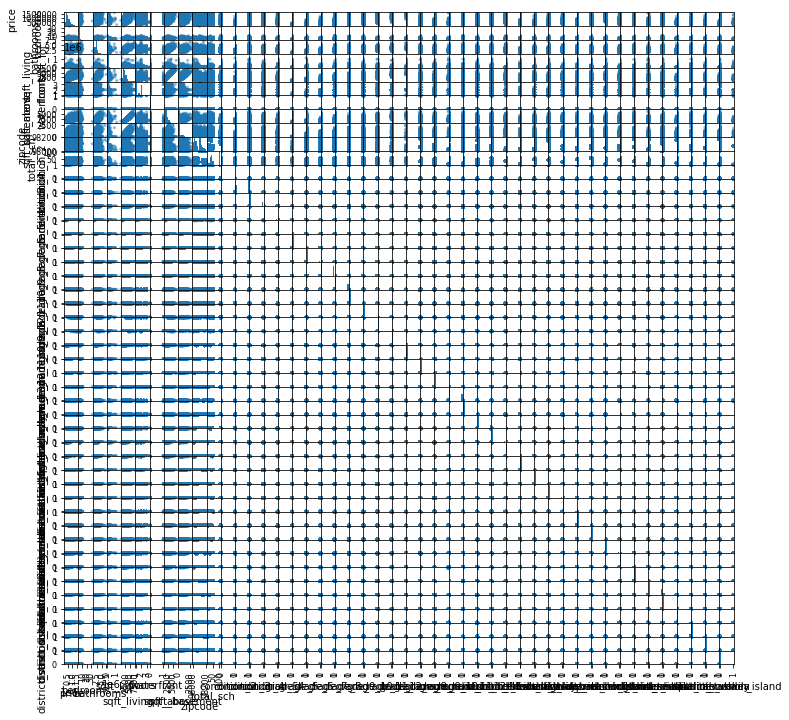

In [178]:
pd.plotting.scatter_matrix(processed_data, figsize = [12,12]);
plt.show()

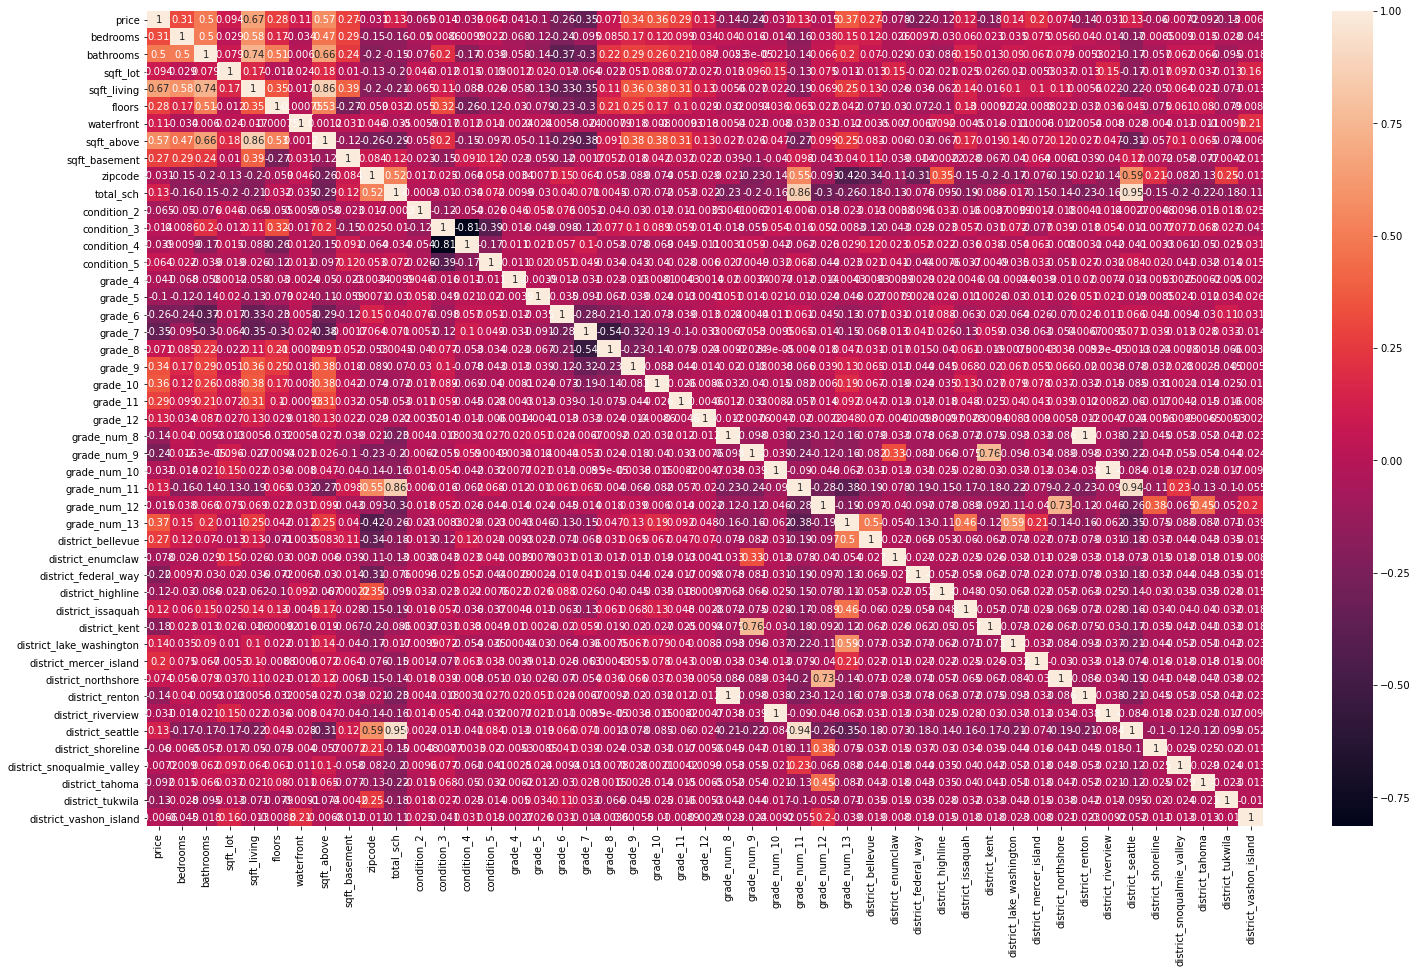

In [179]:
plt.figure(figsize=[25,15])
sns.heatmap(processed_data.corr(),annot=True)

In [180]:
abs(processed_data.corr()) > 0.75

price  bedrooms  bathrooms  sqft_lot  sqft_living  \
price                        True     False      False     False        False   
bedrooms                    False      True      False     False        False   
bathrooms                   False     False       True     False        False   
sqft_lot                    False     False      False      True        False   
sqft_living                 False     False      False     False         True   
floors                      False     False      False     False        False   
waterfront                  False     False      False     False        False   
sqft_above                  False     False      False     False         True   
sqft_basement               False     False      False     False        False   
zipcode                     False     False      False     False        False   
total_sch                   False     False      False     False        False   
condition_2                 False     False      False     False        False   
condition_3                 False     False      False     False        False   
condition_4                 False     False      False     False        False   
condition_5                 False     False      False     False        False   
grade_4                     False     False      False     False        False   
grade_5                     False     False      False     False        False   
grade_6                     False     False      False     False        False   
grade_7                     False     False      False     False        False   
grade_8                     False     False      False     False        False   
grade_9                     False     False      False     False        False   
grade_10                    False     False      False     False        False   
grade_11                    False     False      False     False        False   
grade_12                    False     False      False     False        False   
grade_num_8                 False     False      False     False        False   
grade_num_9                 False     False      False     False        False   
grade_num_10                False     False      False     False        False   
grade_num_11                False     False      False     False        False   
grade_num_12                False     False      False     False        False   
grade_num_13                False     False      False     False        False   
district_bellevue           False     False      False     False        False   
district_enumclaw           False     False      False     False        False   
district_federal_way        False     False      False     False        False   
district_highline           False     False      False     False        False   
district_issaquah           False     False      False     False        False   
district_kent               False     False      False     False        False   
district_lake_washington    False     False      False     False        False   
district_mercer_island      False     False      False     False        False   
district_northshore         False     False      False     False        False   
district_renton             False     False      False     False        False   
district_riverview          False     False      False     False        False   
district_seattle            False     False      False     False        False   
district_shoreline          False     False      False     False        False   
district_snoqualmie_valley  False     False      False     False        False   
district_tahoma             False     False      False     False        False   
district_tukwila            False     False      False     False        False   
district_vashon_island      False     False      False     False        False   

                            floors  waterfront  sqft_above  sqft_basement  \
price                        False       False       False    

In [181]:
df= processed_data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace= True)

df.drop(columns=['level_1', 'level_0'], inplace= True)

df.columns= ['cc']

df.drop_duplicates(inplace=True)

In [182]:
df[(df.cc> .75) & (df.cc< 1)]

cc
pairs                                     
(total_sch, district_seattle)     0.948630
(grade_num_11, district_seattle)  0.938118
(sqft_living, sqft_above)         0.863748
(total_sch, grade_num_11)         0.857979
(condition_4, condition_3)        0.814440
(district_kent, grade_num_9)      0.759996

In [183]:
processed_data= processed_data.drop(['district_seattle', 'district_kent', 'total_sch', 'condition_4', 'sqft_living'], axis=1)
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18870 entries, 0 to 19220
Data columns (total 43 columns):
price                         18870 non-null float64
bedrooms                      18870 non-null int64
bathrooms                     18870 non-null float64
sqft_lot                      18870 non-null int64
floors                        18870 non-null float64
waterfront                    18870 non-null float64
sqft_above                    18870 non-null int64
sqft_basement                 18870 non-null float64
zipcode                       18870 non-null int64
total_student                 18870 non-null object
condition_2                   18870 non-null uint8
condition_3                   18870 non-null uint8
condition_5                   18870 non-null uint8
grade_4                       18870 non-null uint8
grade_5                       18870 non-null uint8
grade_6                       18870 non-null uint8
grade_7                       18870 non-null uint8
grade_8      

In [184]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

train, test = train_test_split(processed_data)
print(len(train), len(test))

14152 4718


In [185]:
outcome = 'price'
x_cols = list(processed_data.columns)
x_cols.remove(outcome)

##
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     1115.
Date:                Tue, 01 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:07:52   Log-Likelihood:            -1.8694e+05
No. Observations:               14152   AIC:                         3.740e+05
Df Residuals:                   14114   BIC:                         3.742e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   2.215e+07   4.16e+06      5.321      0.000     1.4e+07    3.03e+07
total_student[T.16,425]     1.504e+06   2.85e+05      5.269      0.000    9.44e+05    2.06e+06
total_student[T.17,505]     1.258e+06   2.45e+05      5.132      0.000    7.77e+05    1.74e+06
total_student[T.19,213]     2.278e+06    4.3e+05      5.292      0.000    1.43e+06    3.12e+06
total_student[T.20,897]     7.307e+05   1.43e+05      5.125      0.000    4.51e+05    1.01e+06
total_student[T.21,609]     8.047e+05   1.42e+05      5.681      0.000    5.27e+05    1.08e+06
total_student[T.23,489]     2.207e+06   4.27e+05      5.175      0.000    1.37e+06    3.04e+06
total_student[T.23500]      6.826e+05   1.22e+05      5.612      0.000    4.44e+05    9.21e+05
total_student[T.27,291]     1.273e+06   2.44e+05      5.223      0.000    7.95e+05    1.75e+06
total_student[T.3,046]      2.263e+06   4.31e+05      5.255      0.000    1.42e+06    3.11e+06
total_student[T.3,482]      1.508e+06   2.84e+05      5.302      0.000    9.51e+05    2.07e+06
total_student[T.30,675]     7.541e+05   1.43e+05      5.284      0.000    4.74e+05    1.03e+06
total_student[T.4,183]      6.374e+05   1.22e+05      5.239      0.000    3.99e+05    8.76e+05
total_student[T.4,522]      8.724e+05   1.43e+05      6.121      0.000    5.93e+05    1.15e+06
total_student[T.55,271]     1.937e+06   3.44e+05      5.627      0.000    1.26e+06    2.61e+06
total_student[T.7,214]      8.741e+05    1.7e+05      5.133      0.000     5.4e+05    1.21e+06
total_student[T.8,906]      6.119e+05   1.21e+05      5.039      0.000    3.74e+05     8.5e+05
total_student[T.9,899]      6.809e+05   1.24e+05      5.473      0.000    4.37e+05    9.25e+05
bedrooms                   -6789.3728   1541.183     -4.405      0.000   -9810.294   -3768.451
bathrooms                   8625.6182   2560.995      3.368      0.001    3605.729    1.36e+04
sqft_lot                       0.2265      0.029      7.786      0.000       0.169       0.284
floors                     -1.063e+04   3026.211     -3.512      0.000   -1.66e+04   -4696.955
waterfront                  4.248e+05   1.69e+04     25.140      0.000    3.92e+05    4.58e+05
sqft_above                   132.6411      2.942     45.093      0.000     126.875     138.407
sqft_basement                114.2734      3.520     32.466      0.000     107.374     121.173
zipcode                     -269.7307     51.161     -5.272      0.000    -370.013    -169.449
condition_2                -5.564e+04   1.27e+04     -4.371      0.000   -8.06e+04   -3.07e+04
condition_3                -3.569e+04   2736.068    -13.043      0.000   -4.11e+04   -3.03e+04
condition_5                 4.583e+04   4585.174      9.995      0.000    3.68e+04    5.48e+04
grade_4                    -1.197e+05   1.3

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


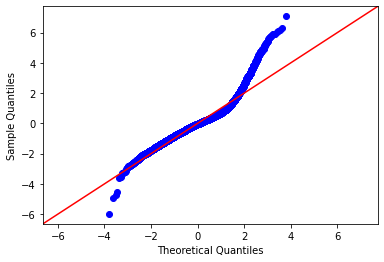

In [186]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

# Normalization to improve model

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\egust\anaco

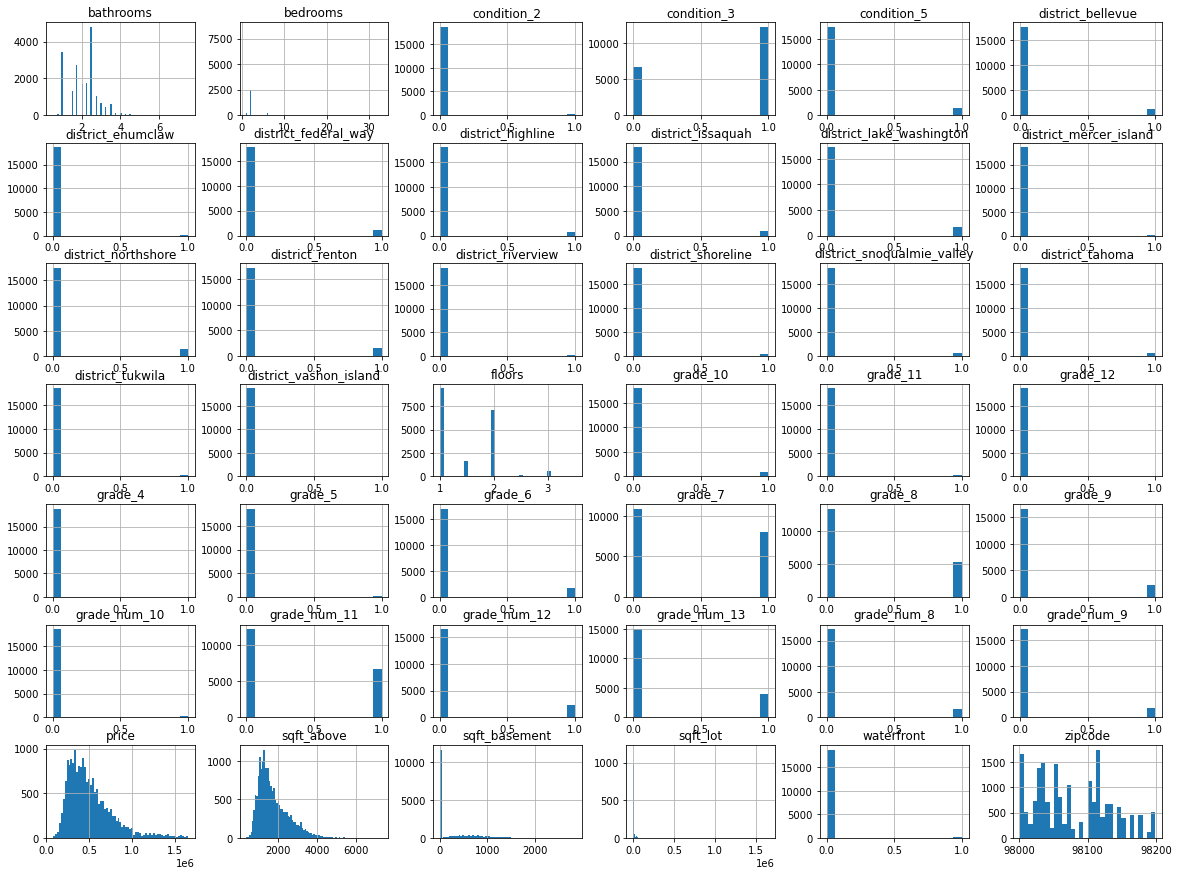

In [187]:
processed_data.hist(figsize=(20,15), bins='auto');

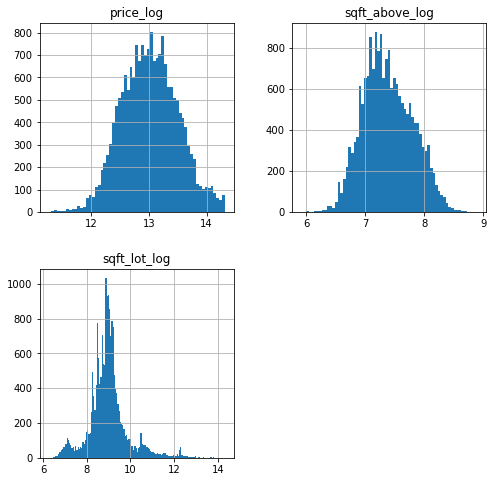

In [188]:
data_pred_cont = data_pred[['price', 'sqft_above', 'sqft_lot']]
log_names = [f'{column}_log' for column in data_pred_cont.columns]

data_pc_log = np.log(data_pred_cont)
data_pc_log.columns = log_names
data_pc_log.hist(figsize = [8,8], bins = 'auto')
fig.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000223B674E7F0>,
      dtype=object)

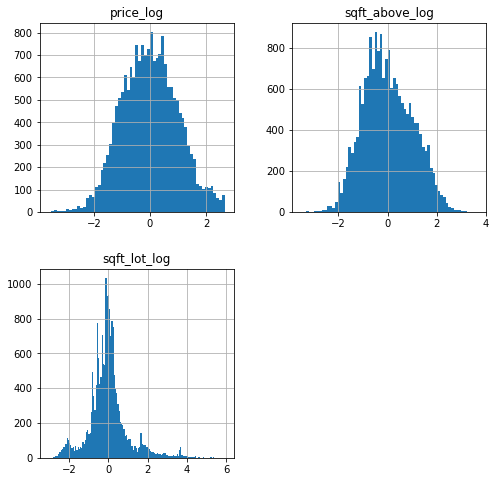

In [189]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_final = data_pc_log.apply(normalize)

features_final.hist(figsize  = [8, 8], bins= 'auto')

In [190]:
processed_data_norm = pd.concat([processed_data, features_final], axis=1)
processed_data_norm= processed_data_norm.drop(['price', 'sqft_above', 'sqft_lot'], axis=1)


In [191]:
train_norm, test_norm = train_test_split(processed_data_norm)

In [192]:
outcome = 'price_log'
x_cols = list(processed_data_norm.columns)
x_cols.remove(outcome)


In [193]:
predictors_vnorm = '+'.join(x_cols)
formula_vnorm = outcome + '~' + predictors_vnorm
model_vnorm = ols(formula=formula_vnorm, data=train_norm).fit()
model_vnorm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     1418.
Date:                Tue, 01 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:29:08   Log-Likelihood:                -9100.0
No. Observations:               14152   AIC:                         1.828e+04
Df Residuals:                   14114   BIC:                         1.856e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     78.5387     14.503      5.416      0.000      50.112     106.966
total_student[T.16,425]        5.3448      0.994      5.376      0.000       3.396       7.293
total_student[T.17,505]        4.3851      0.854      5.135      0.000       2.711       6.059
total_student[T.19,213]        8.0556      1.500      5.372      0.000       5.116      10.995
total_student[T.20,897]        2.6681      0.497      5.371      0.000       1.694       3.642
total_student[T.21,609]        2.8550      0.493      5.786      0.000       1.888       3.822
total_student[T.23,489]        7.7211      1.486      5.197      0.000       4.809      10.633
total_student[T.23500]         2.4756      0.424      5.842      0.000       1.645       3.306
total_student[T.27,291]        4.5034      0.849      5.303      0.000       2.839       6.168
total_student[T.3,046]         7.9323      1.500      5.287      0.000       4.992      10.873
total_student[T.3,482]         5.3751      0.991      5.425      0.000       3.433       7.317
total_student[T.30,675]        2.7374      0.497      5.507      0.000       1.763       3.712
total_student[T.4,183]         2.2519      0.424      5.315      0.000       1.421       3.082
total_student[T.4,522]         3.0134      0.496      6.069      0.000       2.040       3.987
total_student[T.55,271]        6.9787      1.199      5.819      0.000       4.628       9.329
total_student[T.7,214]         3.1119      0.593      5.247      0.000       1.949       4.275
total_student[T.8,906]         2.1281      0.423      5.030      0.000       1.299       2.957
total_student[T.9,899]         2.4434      0.433      5.637      0.000       1.594       3.293
bedrooms                      -0.0252      0.005     -4.623      0.000      -0.036      -0.015
bathrooms                      0.0542      0.009      6.004      0.000       0.037       0.072
floors                        -0.0409      0.011     -3.582      0.000      -0.063      -0.018
waterfront                     1.3255      0.061     21.762      0.000       1.206       1.445
sqft_basement                  0.0004   1.23e-05     29.279      0.000       0.000       0.000
zipcode                       -0.0010      0.000     -5.407      0.000      -0.001      -0.001
condition_2                   -0.3598      0.044     -8.182      0.000      -0.446      -0.274
condition_3                   -0.1287      0.010    -13.339      0.000      -0.148      -0.110
condition_5                    0.1615      0.016     10.154      0.000       0.130       0.193
grade_4                       -0.9915      0.473     -2.096      0.036      -1.919      -0.064
grade_5                       -1.1108      0.464     -2.393      0.017      -2.021      -0.201
grade_6                       -0.9835      

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


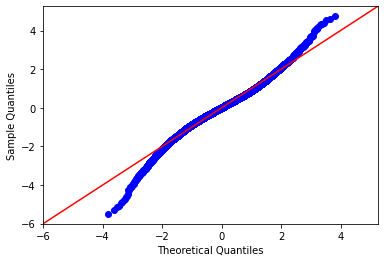

In [194]:
residuals_vnorm = model_vnorm.resid
fig = sm.graphics.qqplot(residuals_vnorm, dist=stats.norm, line='45', fit=True)
fig.show()

In [202]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18870 entries, 0 to 19220
Data columns (total 42 columns):
bedrooms                      18870 non-null int64
bathrooms                     18870 non-null float64
floors                        18870 non-null float64
waterfront                    18870 non-null float64
sqft_basement                 18870 non-null float64
zipcode                       18870 non-null int64
total_student                 18870 non-null object
condition_2                   18870 non-null uint8
condition_3                   18870 non-null uint8
condition_5                   18870 non-null uint8
grade_4                       18870 non-null uint8
grade_5                       18870 non-null uint8
grade_6                       18870 non-null uint8
grade_7                       18870 non-null uint8
grade_8                       18870 non-null uint8
grade_9                       18870 non-null uint8
grade_10                      18870 non-null uint8
grade_11       

In [204]:
processed_data_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18870 entries, 0 to 19220
Data columns (total 43 columns):
bedrooms                      18870 non-null int64
bathrooms                     18870 non-null float64
floors                        18870 non-null float64
waterfront                    18870 non-null float64
sqft_basement                 18870 non-null float64
zipcode                       18870 non-null int64
total_student                 18870 non-null object
condition_2                   18870 non-null uint8
condition_3                   18870 non-null uint8
condition_5                   18870 non-null uint8
grade_4                       18870 non-null uint8
grade_5                       18870 non-null uint8
grade_6                       18870 non-null uint8
grade_7                       18870 non-null uint8
grade_8                       18870 non-null uint8
grade_9                       18870 non-null uint8
grade_10                      18870 non-null uint8
grade_11       

In [212]:
processed_data_norm.total_student = processed_data_norm.total_student.str.replace(',', '')

In [213]:
processed_data_norm.total_student = processed_data_norm.total_student.astype(str).astype(int)

In [214]:
#Backward Elimination
y = processed_data_norm['price_log']
cols = x_cols
X = processed_data_norm[x_cols]
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y.astype(float),X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE_norm = cols
print(selected_features_BE_norm)

['bedrooms', 'bathrooms', 'floors', 'waterfront', 'sqft_basement', 'zipcode', 'total_student', 'condition_2', 'condition_3', 'condition_5', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_11', 'grade_12', 'grade_num_8', 'grade_num_9', 'grade_num_10', 'grade_num_11', 'grade_num_12', 'grade_num_13', 'district_bellevue', 'district_enumclaw', 'district_federal_way', 'district_highline', 'district_issaquah', 'district_lake_washington', 'district_mercer_island', 'district_northshore', 'district_renton', 'district_riverview', 'district_shoreline', 'district_tahoma', 'district_tukwila', 'district_vashon_island', 'sqft_above_log', 'sqft_lot_log']


In [217]:
predictors_vnorm3 = '+'.join(selected_features_BE_norm)
formula_vnorm3 = outcome + '~' + predictors_vnorm3
model_vnorm3 = ols(formula=formula_vnorm3, data=train_norm).fit()
model_vnorm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     1457.
Date:                Tue, 01 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:43:11   Log-Likelihood:                -9100.0
No. Observations:               14152   AIC:                         1.827e+04
Df Residuals:                   14115   BIC:                         1.855e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   78.7617     14.531      5.420      0.000      50.279     107.245
total_student[T.16,425]      5.2897      0.983      5.383      0.000       3.363       7.216
total_student[T.17,505]      4.3379      0.844      5.139      0.000       2.683       5.992
total_student[T.19,213]      7.9730      1.482      5.378      0.000       5.067      10.879
total_student[T.20,897]      2.6406      0.491      5.378      0.000       1.678       3.603
total_student[T.21,609]      2.8274      0.488      5.798      0.000       1.871       3.783
total_student[T.23,489]      7.6385      1.469      5.201      0.000       4.760      10.517
total_student[T.23500]       2.4520      0.419      5.854      0.000       1.631       3.273
total_student[T.27,291]      4.4563      0.839      5.308      0.000       2.811       6.102
total_student[T.3,046]       7.8497      1.483      5.293      0.000       4.943      10.757
total_student[T.3,482]       5.3200      0.979      5.433      0.000       3.401       7.240
total_student[T.30,675]      2.7099      0.491      5.515      0.000       1.747       3.673
total_student[T.4,183]       2.2281      0.419      5.320      0.000       1.407       3.049
total_student[T.4,522]       2.9858      0.491      6.084      0.000       2.024       3.948
total_student[T.55,271]      5.8863      0.990      5.945      0.000       3.945       7.827
total_student[T.7,214]       5.1315      0.977      5.252      0.000       3.216       7.047
total_student[T.8,906]       2.1045      0.418      5.033      0.000       1.285       2.924
total_student[T.9,899]       2.4198      0.429      5.646      0.000       1.580       3.260
bedrooms                    -0.0252      0.005     -4.624      0.000      -0.036      -0.015
bathrooms                    0.0542      0.009      6.005      0.000       0.037       0.072
floors                      -0.0409      0.011     -3.582      0.000      -0.063      -0.019
waterfront                   1.3255      0.061     21.763      0.000       1.206       1.445
sqft_basement                0.0004   1.23e-05     29.285      0.000       0.000       0.000
zipcode                     -0.0010      0.000     -5.406      0.000      -0.001      -0.001
condition_2                 -0.3598      0.044     -8.182      0.000      -0.446      -0.274
condition_3                 -0.1287      0.010    -13.339      0.000      -0.148      -0.110
condition_5                  0.1614      0.016     10.154      0.000       0.130       0.193
grade_4                     -1.0545      0.103    -10.208      0.000      -1.257      -0.852
grade_5                     -1.1739      0.046    -25.615      0.000      -1.264      -1.084
grade_6                     -1.0466      0.029    -36.538      0.000      -1.103      -0.990
grade_7       

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


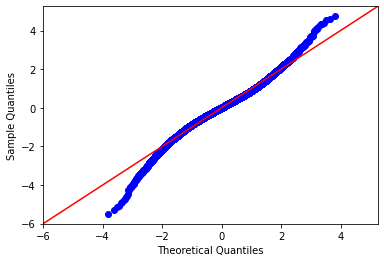

In [216]:
residuals_vnorm2 = model_vnorm2.resid
fig = sm.graphics.qqplot(residuals_vnorm2, dist=stats.norm, line='45', fit=True)
fig.show()

# Model with distance to point of interest


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [3]:
import haversine as hs
import folium
import statistics

In [30]:
column= ['lat', 'long']
data_pred_model3 = data[column]
data_pred_model3.head()

lat     long
0  47.7210 -122.319
1  47.7379 -122.233
2  47.5208 -122.393
3  47.6168 -122.045
4  47.6561 -122.005

In [59]:
data_pred2

price  bedrooms  bathrooms  sqft_lot  sqft_living  floors  \
0       538000.0         3       2.25      7242         2570     2.0   
1       180000.0         2       1.00     10000          770     1.0   
2       604000.0         4       3.00      5000         1960     1.0   
3       510000.0         3       2.00      8080         1680     1.0   
4      1230000.0         4       4.50    101930         5420     1.0   
...          ...       ...        ...       ...          ...     ...   
19216   475000.0         3       2.50      1294         1310     2.0   
19217   360000.0         3       2.50      1131         1530     3.0   
19218   400000.0         4       2.50      5813         2310     2.0   
19219   402101.0         2       0.75      1350         1020     2.0   
19220   325000.0         2       0.75      1076         1020     2.0   

       waterfront  condition  grade  sqft_above  sqft_basement  zipcode  \
0             0.0          3      7        2170          400.0    98125   
1             0.0          3      6         770            0.0    98028   
2             0.0          5      7        1050          910.0    98136   
3             0.0          3      8        1680            0.0    98074   
4             0.0          3     11        3890         1530.0    98053   
...           ...        ...    ...         ...            ...      ...   
19216         0.0          3      8        1180          130.0    98116   
19217         0.0          3      8        1530            0.0    98103   
19218         0.0          3      8        2310            0.0    98146   
19219         0.0          3      7        1020            0.0    98144   
19220         0.0          3      7        1020            0.0    98144   

              district grades  grade_num  total_sch total_student  
0              seattle     A-         11        108        55,271  
1           northshore      A         12         39         23500  
2              seattle     A-         11        108        55,271  
3      lake washington     A+         13         55        30,675  
4      lake washington     A+         13         55        30,675  
...                ...    ...        ...        ...           ...  
19216          seattle     A-         11        108        55,271  
19217          seattle     A-         11        108        55,271  
19218         highline     C+          7         40        19,213  
19219          seattle     A-         11        108        55,271  
19220          seattle     A-         11        108        55,271  

[19221 rows x 17 columns]

In [60]:
data_pred_model3 = pd.concat([data_pred2, data_pred_model3], axis=1)
data_pred_model3.head(10)

price  bedrooms  bathrooms  sqft_lot  sqft_living  floors  waterfront  \
0   538000.0         3       2.25      7242         2570     2.0         0.0   
1   180000.0         2       1.00     10000          770     1.0         0.0   
2   604000.0         4       3.00      5000         1960     1.0         0.0   
3   510000.0         3       2.00      8080         1680     1.0         0.0   
4  1230000.0         4       4.50    101930         5420     1.0         0.0   
5   257500.0         3       2.25      6819         1715     2.0         0.0   
6   291850.0         3       1.50      9711         1060     1.0         0.0   
7   229500.0         3       1.00      7470         1780     1.0         0.0   
8   323000.0         3       2.50      6560         1890     2.0         0.0   
9   468000.0         2       1.00      6000         1160     1.0         0.0   

   condition  grade  sqft_above  sqft_basement  zipcode         district  \
0          3      7        2170          400.0    98125          seattle   
1          3      6         770            0.0    98028       northshore   
2          5      7        1050          910.0    98136          seattle   
3          3      8        1680            0.0    98074  lake washington   
4          3     11        3890         1530.0    98053  lake washington   
5          3      7        1715            0.0    98003      federal way   
6          3      7        1060            0.0    98198         highline   
7          3      7        1050          730.0    98146         highline   
8          3      7        1890            0.0    98038           tahoma   
9          4      7         860          300.0    98115          seattle   

  grades  grade_num  total_sch total_student      lat     long  
0     A-         11        108        55,271  47.7210 -122.319  
1      A         12         39         23500  47.7379 -122.233  
2     A-         11        108        55,271  47.5208 -122.393  
3     A+         13         55        30,675  47.6168 -122.045  
4     A+         13         55        30,675  47.6561 -122.005  
5     C+          7         46        23,489  47.3097 -122.327  
6     C+          7         40        19,213  47.4095 -122.315  
7     C+          7         40        19,213  47.5123 -122.337  
8      A         12          9         8,906  47.3684 -122.031  
9     A-         11        108        55,271  47.6900 -122.292

In [61]:
data_kc_poi= pd.read_csv('Common_Points_of_Interest_for_King_County____common_interest_point.csv')
data_kc_poi.head()

X          Y  OBJECTID  FEATURE_ID     ESITE  CODE  \
0 -122.286944  47.499985         1     6002948       0.0   600   
1 -122.305465  47.635532         2         828       0.0   600   
2 -122.211064  47.405961         3         374       0.0   600   
3 -121.912156  47.650466         4        1891  124849.0   390   
4 -122.295038  47.441348         5        1817  401027.0    60   

                               NAME                          ABB_NAME  \
0  Green River Trail Site - Tukwila  Green River Trail Site - Tukwila   
1                   Interlaken Park                   Interlaken Park   
2               Garrison Creek Park               Garrison Creek Park   
3                 Carnation Library                     Carnation Lib   
4             Sea-Tac Office Center             Sea-Tac Office Center   

                                             ADDRESS  ZIPCODE  
0  27th Ave S and S 112th St to 69th Ave S and S ...    98188  
1                        Interlaken Pl & Delmar Dr E    98102  
2                            S 218th St & 98th Ave S    98031  
3                                     4804 Tolt  Ave    98014  
4                                18000 Pacific Hwy S    98188

In [62]:
import ast
for key in range(len(kc_school_district['zipcode'])):
    kc_school_district['zipcode'][key] = ast.literal_eval(kc_school_district['zipcode'][key])

ValueError: malformed node or string: [98040]

In [63]:
def district(zipcode):
    try:
        for key in range(len(kc_school_district['zipcode'])):
            if zipcode in kc_school_district['zipcode'][key]:
                district = kc_school_district['district'][key]
    except Exception:
        pass
    return district

In [64]:
def districts(zipcodes):
    try:
        x = district(zipcodes)
         
    except UnboundLocalError:
        x = 0

    return x

In [65]:
district_KC = []
for zipcode in data_kc_poi['ZIPCODE']:
    district_KC.append(districts(zipcode))

In [66]:
x = {'district': district_KC}
df_poi_dist = pd.DataFrame(x, columns = ['district'])
df_poi_dist

district
0           tukwila
1           seattle
2              kent
3         riverview
4           tukwila
...             ...
6486     northshore
6487        seattle
6488        seattle
6489  vashon island
6490         auburn

[6491 rows x 1 columns]

In [67]:
data_kc_poi = pd.concat([data_kc_poi, df_poi_dist], axis=1)
data_kc_poi.head()

X          Y  OBJECTID  FEATURE_ID     ESITE  CODE  \
0 -122.286944  47.499985         1     6002948       0.0   600   
1 -122.305465  47.635532         2         828       0.0   600   
2 -122.211064  47.405961         3         374       0.0   600   
3 -121.912156  47.650466         4        1891  124849.0   390   
4 -122.295038  47.441348         5        1817  401027.0    60   

                               NAME                          ABB_NAME  \
0  Green River Trail Site - Tukwila  Green River Trail Site - Tukwila   
1                   Interlaken Park                   Interlaken Park   
2               Garrison Creek Park               Garrison Creek Park   
3                 Carnation Library                     Carnation Lib   
4             Sea-Tac Office Center             Sea-Tac Office Center   

                                             ADDRESS  ZIPCODE   district  
0  27th Ave S and S 112th St to 69th Ave S and S ...    98188    tukwila  
1                        Interlaken Pl & Delmar Dr E    98102    seattle  
2                            S 218th St & 98th Ave S    98031       kent  
3                                     4804 Tolt  Ave    98014  riverview  
4                                18000 Pacific Hwy S    98188    tukwila

In [68]:
data_kc_poi['coor'] = list(zip(data_kc_poi.Y, data_kc_poi.X))
data_pred_model3['coor'] = list(zip(data_pred_model3.lat, data_pred_model3.long))

In [69]:
data_kc_poi

X          Y  OBJECTID  FEATURE_ID     ESITE  CODE  \
0    -122.286944  47.499985         1     6002948       0.0   600   
1    -122.305465  47.635532         2         828       0.0   600   
2    -122.211064  47.405961         3         374       0.0   600   
3    -121.912156  47.650466         4        1891  124849.0   390   
4    -122.295038  47.441348         5        1817  401027.0    60   
...          ...        ...       ...         ...       ...   ...   
6486 -122.112514  47.669697      6487        2292  354427.0   530   
6487 -122.378333  47.643655      6488     6007226       0.0   600   
6488 -122.336448  47.615441      6489        1691  835568.0    60   
6489 -122.459065  47.451750      6490         772       0.0   600   
6490 -122.229269  47.308529      6491          22  717584.0   330   

                                    NAME                            ABB_NAME  \
0       Green River Trail Site - Tukwila    Green River Trail Site - Tukwila   
1                        Interlaken Park                     Interlaken Park   
2                    Garrison Creek Park                 Garrison Creek Park   
3                      Carnation Library                       Carnation Lib   
4                  Sea-Tac Office Center               Sea-Tac Office Center   
...                                  ...                                 ...   
6486  Bartell Drugs-Redmond Towne Center  Bartell Drugs-Redmond Towne Center   
6487                       Interbay Golf                       Interbay Golf   
6488                           Love Bldg                           Love Bldg   
6489                           Ober Park                           Ober Park   
6490     MultiCare Auburn Medical Center     MultiCare Auburn Medical Center   

                                                ADDRESS  ZIPCODE  \
0     27th Ave S and S 112th St to 69th Ave S and S ...    98188   
1                           Interlaken Pl & Delmar Dr E    98102   
2                               S 218th St & 98th Ave S    98031   
3                                        4804 Tolt  Ave    98014   
4                                   18000 Pacific Hwy S    98188   
...                                                 ...      ...   
6486                                  7370 170th Ave NE    98052   
6487                                    2501 15th Ave W    98119   
6488                                       1925 8th Ave    98101   
6489                                17100 Vashon Hwy SW    98070   
6490                                  202 N Division St    98002   

           district                                coor  
0           tukwila  (47.49998475, -122.28694420000001)  
1           seattle         (47.63553164, -122.3054649)  
2              kent         (47.40596103, -122.2110639)  
3         riverview  (47.65046566, -121.91215600000001)  
4           tukwila  (47.44134821, -122.29503829999999)  
...             ...                                 ...  
6486     northshore  (47.66969737, -122.11251370000001)  
6487        seattle         (47.64365455, -122.3783334)  
6488        seattle  (47.61544081, -122.33644840000002)  
6489  vashon island  (47.45175034, -122.45906459999999)  
6490         auburn  (47.30852875, -122.22926909999998)  

[6491 rows x 12 columns]

In [70]:
data_pred_model3

price  bedrooms  bathrooms  sqft_lot  sqft_living  floors  \
0       538000.0         3       2.25      7242         2570     2.0   
1       180000.0         2       1.00     10000          770     1.0   
2       604000.0         4       3.00      5000         1960     1.0   
3       510000.0         3       2.00      8080         1680     1.0   
4      1230000.0         4       4.50    101930         5420     1.0   
...          ...       ...        ...       ...          ...     ...   
19216   475000.0         3       2.50      1294         1310     2.0   
19217   360000.0         3       2.50      1131         1530     3.0   
19218   400000.0         4       2.50      5813         2310     2.0   
19219   402101.0         2       0.75      1350         1020     2.0   
19220   325000.0         2       0.75      1076         1020     2.0   

       waterfront  condition  grade  sqft_above  sqft_basement  zipcode  \
0             0.0          3      7        2170          400.0    98125   
1             0.0          3      6         770            0.0    98028   
2             0.0          5      7        1050          910.0    98136   
3             0.0          3      8        1680            0.0    98074   
4             0.0          3     11        3890         1530.0    98053   
...           ...        ...    ...         ...            ...      ...   
19216         0.0          3      8        1180          130.0    98116   
19217         0.0          3      8        1530            0.0    98103   
19218         0.0          3      8        2310            0.0    98146   
19219         0.0          3      7        1020            0.0    98144   
19220         0.0          3      7        1020            0.0    98144   

              district grades  grade_num  total_sch total_student      lat  \
0              seattle     A-         11        108        55,271  47.7210   
1           northshore      A         12         39         23500  47.7379   
2              seattle     A-         11        108        55,271  47.5208   
3      lake washington     A+         13         55        30,675  47.6168   
4      lake washington     A+         13         55        30,675  47.6561   
...                ...    ...        ...        ...           ...      ...   
19216          seattle     A-         11        108        55,271  47.5773   
19217          seattle     A-         11        108        55,271  47.6993   
19218         highline     C+          7         40        19,213  47.5107   
19219          seattle     A-         11        108        55,271  47.5944   
19220          seattle     A-         11        108        55,271  47.5941   

          long                            coor  
0     -122.319  (47.721000000000004, -122.319)  
1     -122.233  (47.7379, -122.23299999999999)  
2     -122.393  (47.5208, -122.39299999999999)  
3     -122.045             (47.6168, -122.045)  
4     -122.005             (47.6561, -122.005)  
...        ...                             ...  
19216 -122.409  (47.5773, -122.40899999999999)  
19217 -122.346             (47.6993, -122.346)  
19218 -122.362  (47.5107, -122.36200000000001)  
19219 -122.299  (47.5944, -122.29899999999999)  
19220 -122.299  (47.5941, -122.29899999999999)  

[19221 rows x 20 columns]

In [63]:
def distance_from(loc1,loc2): 
    dist=hs.haversine(loc1,loc2)
    return round(dist,2)

In [65]:
tran = [500, 510, 30, 570]
med = [330, 67, 66, 65]
ent = [600, 690, 240, 350]
job = [420]
# Find all the common places in renton
def dist(district, code, i):
    df_dist = data_kc_poi.loc[data_kc_poi.district == district].loc[data_kc_poi.CODE == code]
    df_dist.reset_index(inplace=True, drop=True)
# You want to find the shortest of all transportation
    y = []
    
    for key in range(len(df_dist['coor'])):
        x = hs.haversine(df_dist['coor'][key],data_pred_model3.iloc[i].coor)
        y.append(x)
        short_dist = min(y)
    
    return short_dist
        

In [66]:
t = [] 
for key in range(len(data_pred_model3)):
    t_dist = []
    for code in tran:
        try:
            t_dist.append(dist(data_pred_model3['district'][key], code, key))
        except UnboundLocalError:
            pass
    try:    
        t.append(statistics.mean(t_dist))
    except:
        pass

In [67]:
len(t)

19221

In [68]:
m = [] 
for key in range(len(data_pred_model3)):
    m_dist = []
    for code in med:
        try:
            m_dist.append(dist(data_pred_model3['district'][key], code, key))
        except UnboundLocalError:
            pass
    try:    
        m.append(statistics.mean(m_dist))
    except:
        pass

In [69]:
len(m)

19221

In [70]:
e = [] 
for key in range(len(data_pred_model3)):
    e_dist = []
    for code in ent:
        try:
            e_dist.append(dist(data_pred_model3['district'][key], code, key))
        except UnboundLocalError:
            pass
    try:    
        e.append(statistics.mean(e_dist))
    except:
        pass

In [71]:
j = [] 
for key in range(len(data_pred_model3)):
    j_dist = []
    for code in tran:
        try:
            j_dist.append(dist(data_pred_model3['district'][key], code, key))
        except UnboundLocalError:
            pass
    try:    
        j.append(statistics.mean(j_dist))
    except:
        pass

In [72]:
x = {'transport_dist': t, 
     'medical_emerg_dist': m,
     'entertain_dist': e,
     'job_center_dist': j} 

In [138]:
df_dist_poi = pd.DataFrame(x, columns = ['transport_dist','medical_emerg_dist','entertain_dist','job_center_dist'])
df_dist_poi.head()

transport_dist  medical_emerg_dist  entertain_dist  job_center_dist
0        4.627271            1.990067        2.407421         4.627271
1        5.204685            2.792852        2.605384         5.204685
2        4.845578            2.957678        2.858197         4.845578
3       10.199269           11.376441        0.804177        10.199269
4       11.170547           11.306430        2.920086        11.170547

In [77]:
df_dist_poi.to_csv('df_dist_poi')

In [71]:
df_dist_poi = pd.read_csv('df_dist_poi')

In [75]:
import pandas as pd 

In [72]:
data_pred_model3 = pd.concat([data_pred_model3, df_dist_poi], axis=1)
data_pred_model3.head()

price  bedrooms  bathrooms  sqft_lot  sqft_living  floors  waterfront  \
0   538000.0         3       2.25      7242         2570     2.0         0.0   
1   180000.0         2       1.00     10000          770     1.0         0.0   
2   604000.0         4       3.00      5000         1960     1.0         0.0   
3   510000.0         3       2.00      8080         1680     1.0         0.0   
4  1230000.0         4       4.50    101930         5420     1.0         0.0   

   condition  grade  sqft_above  ...  total_sch  total_student      lat  \
0          3      7        2170  ...        108         55,271  47.7210   
1          3      6         770  ...         39          23500  47.7379   
2          5      7        1050  ...        108         55,271  47.5208   
3          3      8        1680  ...         55         30,675  47.6168   
4          3     11        3890  ...         55         30,675  47.6561   

      long                            coor  Unnamed: 0 transport_dist  \
0 -122.319  (47.721000000000004, -122.319)           0       4.627271   
1 -122.233  (47.7379, -122.23299999999999)           1       5.204685   
2 -122.393  (47.5208, -122.39299999999999)           2       4.845578   
3 -122.045             (47.6168, -122.045)           3      10.199269   
4 -122.005             (47.6561, -122.005)           4      11.170547   

   medical_emerg_dist  entertain_dist job_center_dist  
0            1.990067        2.407421        4.627271  
1            2.792852        2.605384        5.204685  
2            2.957678        2.858197        4.845578  
3           11.376441        0.804177       10.199269  
4           11.306430        2.920086       11.170547  

[5 rows x 25 columns]

In [73]:
# Look at the df to check if all the columns you need are there, if not add or delete columns 
data_pred_model3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19221 entries, 0 to 19220
Data columns (total 25 columns):
price                 19221 non-null float64
bedrooms              19221 non-null int64
bathrooms             19221 non-null float64
sqft_lot              19221 non-null int64
sqft_living           19221 non-null int64
floors                19221 non-null float64
waterfront            19221 non-null float64
condition             19221 non-null int64
grade                 19221 non-null int64
sqft_above            19221 non-null int64
sqft_basement         19221 non-null float64
zipcode               19221 non-null int64
district              19221 non-null object
grades                19221 non-null object
grade_num             19221 non-null int64
total_sch             19221 non-null int64
total_student         19221 non-null object
lat                   19221 non-null float64
long                  19221 non-null float64
coor                  19221 non-null object
Unnamed: 0   

In [74]:
# I no longer need zipcode, lat, long, or coor in the model
data_pred_model3 = data_pred_model3.drop(['zipcode', 'lat', 'long', 'coor','Unnamed: 0'], axis=1)
data_pred_model3.head()

price  bedrooms  bathrooms  sqft_lot  sqft_living  floors  waterfront  \
0   538000.0         3       2.25      7242         2570     2.0         0.0   
1   180000.0         2       1.00     10000          770     1.0         0.0   
2   604000.0         4       3.00      5000         1960     1.0         0.0   
3   510000.0         3       2.00      8080         1680     1.0         0.0   
4  1230000.0         4       4.50    101930         5420     1.0         0.0   

   condition  grade  sqft_above  sqft_basement         district grades  \
0          3      7        2170          400.0          seattle     A-   
1          3      6         770            0.0       northshore      A   
2          5      7        1050          910.0          seattle     A-   
3          3      8        1680            0.0  lake washington     A+   
4          3     11        3890         1530.0  lake washington     A+   

   grade_num  total_sch total_student  transport_dist  medical_emerg_dist  \
0         11        108        55,271        4.627271            1.990067   
1         12         39         23500        5.204685            2.792852   
2         11        108        55,271        4.845578            2.957678   
3         13         55        30,675       10.199269           11.376441   
4         13         55        30,675       11.170547           11.306430   

   entertain_dist  job_center_dist  
0        2.407421         4.627271  
1        2.605384         5.204685  
2        2.858197         4.845578  
3        0.804177        10.199269  
4        2.920086        11.170547

In [93]:
#Save the new data frame you will work with. 
data_pred_model3.to_csv('data_pred_model3')

# 2. Dealing with Outliers
## Removing values that fall outside of 2 std of the mean

In the last model it was clear from the QQ-plot that performing some transformations did not completely allow the residuals to be normally distributed. In this case the following alteration one can do is remove more outliers. Previously we remove only data points that were after 2 standard deviation from the mean. 

In [47]:
from numpy import mean
from numpy import std 

In [236]:
    price_mean, price_std = mean(data_pred_model3.price), std(data_pred_model3.price)
    
    cutoff = price_std*2

In [237]:
print(price_mean)
print(price_std)
print(cutoff)

488398.78997510014
225434.99448217734
450869.9889643547


In [239]:
price_mean+cutoff

939268.7789394548

In [49]:
outlier(data_pred_model3, 2)

[1290000.0,
 1290000.0,
 1290000.0,
 1290000.0,
 1290000.0,
 1290000.0,
 1290000.0,
 1290000.0,
 1290000.0,
 1290000.0,
 1290000.0,
 1290000.0,
 1290000.0,
 1290000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1300000.0,
 1310000.0,
 1310000.0,
 1310000.0,
 1310000.0,
 1310000.0,
 1310000.0,
 1310000.0,
 1310000.0,
 1310000.0,
 1310000.0,
 1310000.0,
 1310000.0,
 1310000.0,
 1320000.0,
 1320000.0,
 1320000.0,
 1320000.0,
 1320000.0,
 1320000.0,
 1320000.0,
 1320000.0,
 1320000.0,
 1320000.0,
 1320000.0,
 1320000.0,
 1330000.0,
 1330000.0,
 1330000.0,
 1330000.0,
 1330000.0,
 1330000.0,
 1330000.0,
 1330000.0,
 1330000.0,
 1330000.0,
 1330000.0,
 1330000.0,
 1330000.0,
 1330000.0,
 1330000.0,
 133

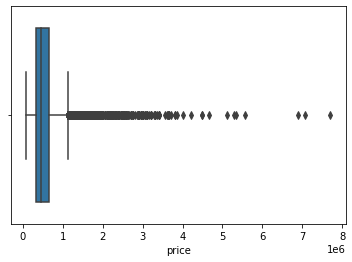

In [94]:
sns.boxplot(x=data_pred_model3['price'])

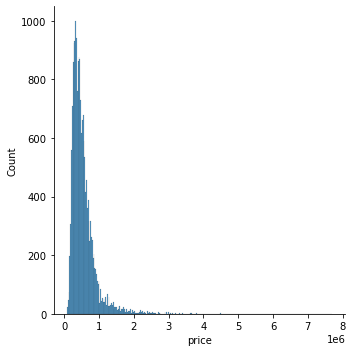

In [95]:
sns.displot(data_pred_model3['price'])

In [96]:
data_pred_model3 = data_pred_model3[data_pred_model3.price < 1290000]

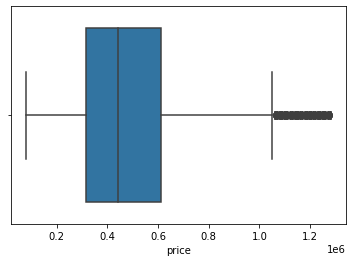

In [97]:
sns.boxplot(x=data_pred_model3['price'])

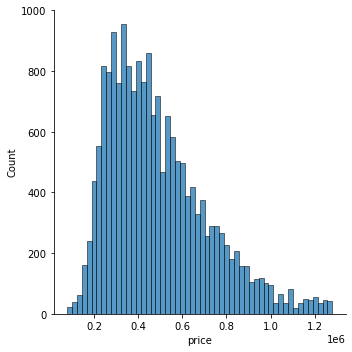

In [98]:
sns.displot(data_pred_model3['price'])

In [99]:
data_pred_model3 = data_pred_model3.drop(columns=['grades'])
data_pred_model3.head()

price  bedrooms  bathrooms  sqft_lot  sqft_living  floors  waterfront  \
0   538000.0         3       2.25      7242         2570     2.0         0.0   
1   180000.0         2       1.00     10000          770     1.0         0.0   
2   604000.0         4       3.00      5000         1960     1.0         0.0   
3   510000.0         3       2.00      8080         1680     1.0         0.0   
4  1230000.0         4       4.50    101930         5420     1.0         0.0   

   condition  grade  sqft_above  sqft_basement         district  grade_num  \
0          3      7        2170          400.0          seattle         11   
1          3      6         770            0.0       northshore         12   
2          5      7        1050          910.0          seattle         11   
3          3      8        1680            0.0  lake washington         13   
4          3     11        3890         1530.0  lake washington         13   

   total_sch total_student  transport_dist  medical_emerg_dist  \
0        108        55,271        4.627271            1.990067   
1         39         23500        5.204685            2.792852   
2        108        55,271        4.845578            2.957678   
3         55        30,675       10.199269           11.376441   
4         55        30,675       11.170547           11.306430   

   entertain_dist  job_center_dist  
0        2.407421         4.627271  
1        2.605384         5.204685  
2        2.858197         4.845578  
3        0.804177        10.199269  
4        2.920086        11.170547

In [100]:
data_pred_model3.nunique() < 30

price                 False
bedrooms               True
bathrooms              True
sqft_lot              False
sqft_living           False
floors                 True
waterfront             True
condition              True
grade                  True
sqft_above            False
sqft_basement         False
district               True
grade_num              True
total_sch              True
total_student          True
transport_dist        False
medical_emerg_dist    False
entertain_dist        False
job_center_dist       False
dtype: bool

In [101]:
categorical = [ 'condition', 'grade', 'grade_num', 'district']
data_pred_model3[categorical].nunique()

condition     5
grade        10
grade_num     7
district     18
dtype: int64

In [102]:
condition_dummy = pd.get_dummies(data_pred_model3.condition, prefix='condition', drop_first=True)
grade_dummy = pd.get_dummies(data_pred_model3.grade, prefix='grade', drop_first=True)
grade_num_dummy = pd.get_dummies(data_pred_model3.grade_num, prefix='grade_num', drop_first=True)
district_dummy = pd.get_dummies(data_pred_model3.district, prefix='district', drop_first=True)

processed_data3 = pd.concat([data_pred_model3, condition_dummy, grade_dummy, grade_num_dummy, district_dummy], axis=1)

processed_data3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18474 entries, 0 to 19220
Data columns (total 55 columns):
price                         18474 non-null float64
bedrooms                      18474 non-null int64
bathrooms                     18474 non-null float64
sqft_lot                      18474 non-null int64
sqft_living                   18474 non-null int64
floors                        18474 non-null float64
waterfront                    18474 non-null float64
condition                     18474 non-null int64
grade                         18474 non-null int64
sqft_above                    18474 non-null int64
sqft_basement                 18474 non-null float64
district                      18474 non-null object
grade_num                     18474 non-null int64
total_sch                     18474 non-null int64
total_student                 18474 non-null object
transport_dist                18474 non-null float64
medical_emerg_dist            18474 non-null float64
entertai

In [103]:
processed_data3= processed_data3.drop(['condition', 'grade','grade_num', 'district'], axis=1)
processed_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18474 entries, 0 to 19220
Data columns (total 51 columns):
price                         18474 non-null float64
bedrooms                      18474 non-null int64
bathrooms                     18474 non-null float64
sqft_lot                      18474 non-null int64
sqft_living                   18474 non-null int64
floors                        18474 non-null float64
waterfront                    18474 non-null float64
sqft_above                    18474 non-null int64
sqft_basement                 18474 non-null float64
total_sch                     18474 non-null int64
total_student                 18474 non-null object
transport_dist                18474 non-null float64
medical_emerg_dist            18474 non-null float64
entertain_dist                18474 non-null float64
job_center_dist               18474 non-null float64
condition_2                   18474 non-null uint8
condition_3                   18474 non-null uint8
condi

In [104]:
processed_data3.columns = processed_data3.columns.str.replace(' ', '_')

# Checking Assumption

1. Multicollinearity
Due to the number of features I will not be looking into a scatter_matrix or looking at a heat map to locate correlation
2. linearity
3. Heteroskedasticity

In [105]:
df= processed_data3.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace= True)

df.drop(columns=['level_1', 'level_0'], inplace= True)

df.columns= ['cc']

df.drop_duplicates(inplace=True)

In [106]:
df[(df.cc> .75) & (df.cc< 1)]

cc
pairs                                         
(total_sch, district_seattle)         0.948526
(grade_num_11, district_seattle)      0.937273
(sqft_living, sqft_above)             0.858415
(total_sch, grade_num_11)             0.856529
(condition_3, condition_4)            0.816464
(medical_emerg_dist, transport_dist)  0.767970
(grade_num_9, district_kent)          0.759644

In [107]:
#From this evaluation we will the following

# remove the column district_seattle
# remove the column sqft_living
# remove the column total_sch
# remove the column conditon 4


processed_data3= processed_data3.drop(['district_seattle', 'district_kent', 'total_sch', 'condition_4', 'sqft_living'], axis=1)
processed_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18474 entries, 0 to 19220
Data columns (total 46 columns):
price                         18474 non-null float64
bedrooms                      18474 non-null int64
bathrooms                     18474 non-null float64
sqft_lot                      18474 non-null int64
floors                        18474 non-null float64
waterfront                    18474 non-null float64
sqft_above                    18474 non-null int64
sqft_basement                 18474 non-null float64
total_student                 18474 non-null object
transport_dist                18474 non-null float64
medical_emerg_dist            18474 non-null float64
entertain_dist                18474 non-null float64
job_center_dist               18474 non-null float64
condition_2                   18474 non-null uint8
condition_3                   18474 non-null uint8
condition_5                   18474 non-null uint8
grade_4                       18474 non-null uint8
grade

In [ ]:
#### processed_data3['med_emerge_transport_inter'] = processed_data3['medical_emerg_dist']*processed_data3['transport_dist']

In [232]:
#processed_data3 = processed_data3.drop(['medical_emerg_dist', 'transport_dist'], axis=1)
#processed_data3.info()

In [108]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

train, test = train_test_split(processed_data3)
print(len(train), len(test))

13855 4619


In [109]:
outcome = 'price'
x_cols = list(processed_data3.columns)
x_cols.remove(outcome)

##
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     1070.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:11:39   Log-Likelihood:            -1.8083e+05
No. Observations:               13855   AIC:                         3.617e+05
Df Residuals:                   13815   BIC:                         3.620e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   2.457e+05    9.4e+04      2.614      0.009    6.14e+04     4.3e+05
total_student[T.16,425]     4541.3994   6551.014      0.693      0.488   -8299.476    1.74e+04
total_student[T.17,505]    -2.629e+04   7303.446     -3.599      0.000   -4.06e+04    -1.2e+04
total_student[T.19,213]     2.853e+04   9967.958      2.862      0.004    8991.978    4.81e+04
total_student[T.20,897]    -9550.7696   3815.161     -2.503      0.012    -1.7e+04   -2072.537
total_student[T.21,609]     5.916e+04   3808.481     15.534      0.000    5.17e+04    6.66e+04
total_student[T.23,489]    -3.944e+04   9854.972     -4.002      0.000   -5.88e+04   -2.01e+04
total_student[T.23500]      5.592e+04   3834.825     14.583      0.000    4.84e+04    6.34e+04
total_student[T.27,291]     8207.7939   6743.604      1.217      0.224   -5010.586    2.14e+04
total_student[T.3,046]     -4537.3783   1.02e+04     -0.444      0.657   -2.46e+04    1.55e+04
total_student[T.3,482]      1.765e+04   6966.639      2.533      0.011    3991.291    3.13e+04
total_student[T.30,675]    -6782.8990   3831.723     -1.770      0.077   -1.43e+04     727.798
total_student[T.4,183]      -2.12e+04   4850.433     -4.370      0.000   -3.07e+04   -1.17e+04
total_student[T.4,522]      1.055e+05   5240.975     20.133      0.000    9.52e+04    1.16e+05
total_student[T.55,271]     1.304e+05   8018.358     16.267      0.000    1.15e+05    1.46e+05
total_student[T.7,214]      -2.61e+04   4555.483     -5.729      0.000    -3.5e+04   -1.72e+04
total_student[T.8,906]     -3.618e+04   4235.414     -8.543      0.000   -4.45e+04   -2.79e+04
total_student[T.9,899]      1.859e+04   4432.063      4.194      0.000    9898.738    2.73e+04
bedrooms                   -4714.1734   1353.842     -3.482      0.000   -7367.888   -2060.459
bathrooms                   1238.3276   2234.356      0.554      0.579   -3141.314    5617.969
sqft_lot                       0.3158      0.029     10.734      0.000       0.258       0.373
floors                     -1.418e+04   2634.617     -5.381      0.000   -1.93e+04   -9012.873
waterfront                  3.407e+05   1.69e+04     20.196      0.000    3.08e+05    3.74e+05
sqft_above                   127.9558      2.587     49.452      0.000     122.884     133.028
sqft_basement                100.3709      3.107     32.309      0.000      94.282     106.460
transport_dist             -5239.6617    392.083    -13.364      0.000   -6008.197   -4471.127
medical_emerg_dist          1.568e+04    992.503     15.795      0.000    1.37e+04    1.76e+04
entertain_dist             -1.581e+04    962.642    -16.427      0.000   -1.77e+04   -1.39e+04
job_center_dist            -5239.6617    392.083    -13.364      0.000   -6008.197   -4471.127
condition_2                -6.061e+04   1.0

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


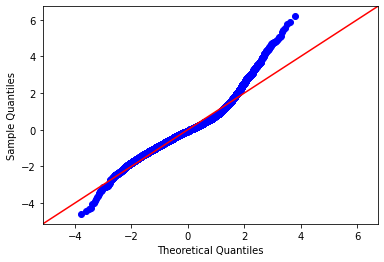

In [110]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

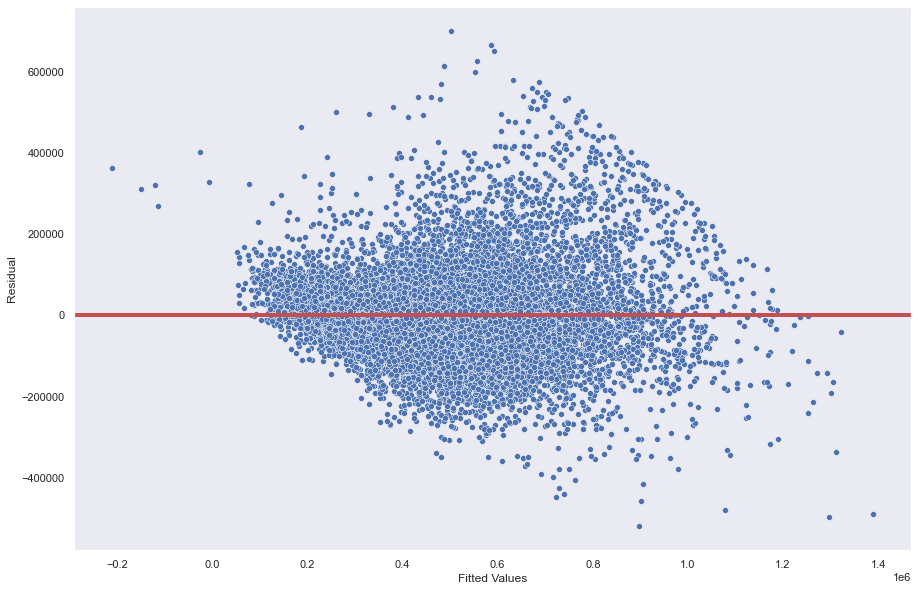

In [124]:
Heteroskedasticity_test(model)

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


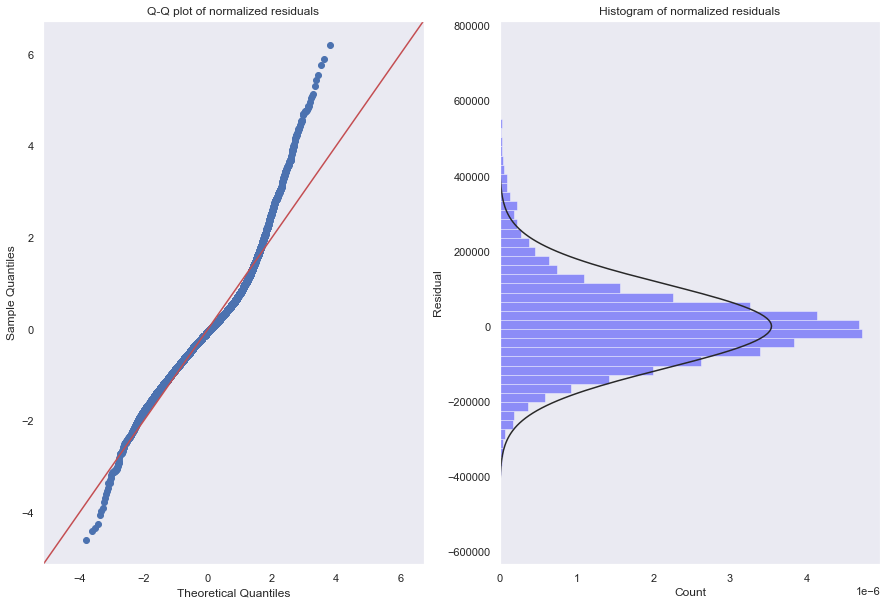

In [126]:
norm_dist_assumption(residuals)

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\egust\anaco

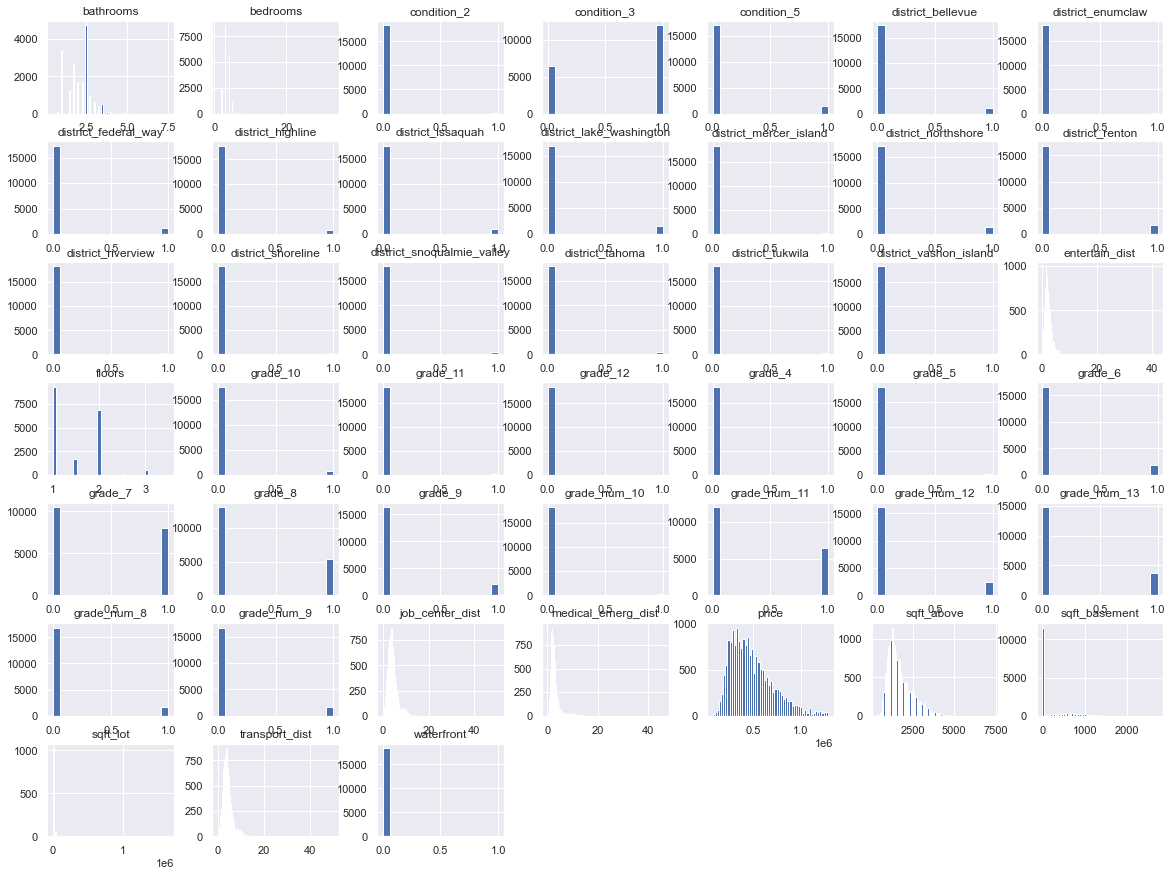

In [127]:
processed_data3.hist(figsize=(20,15), bins='auto');

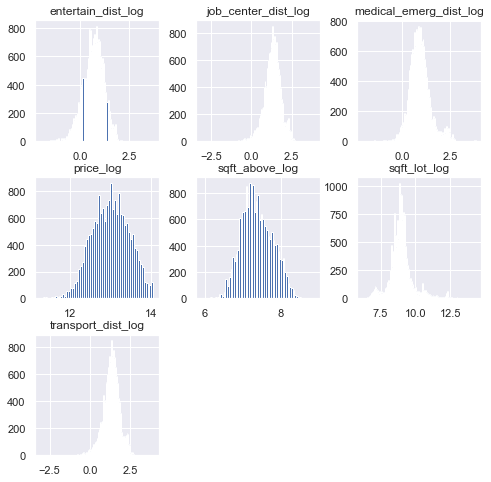

In [129]:
data_pred_model3_cont = processed_data3[['price', 'sqft_above', 'sqft_lot', 'job_center_dist', 'medical_emerg_dist', 'transport_dist', 'entertain_dist']]
log_names = [f'{column}_log' for column in data_pred_model3_cont.columns]

data_pc_log = np.log(data_pred_model3_cont)
data_pc_log.columns = log_names
data_pc_log.hist(figsize = [8,8], bins = 'auto')
fig.tight_layout()

In [99]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

features_final = data_pc_log.apply(normalize)

features_final.hist(figsize  = [8, 8], color='b', bins= 'auto')

In [132]:
processed_data3_norm = pd.concat([processed_data3, features_final], axis=1)
processed_data3_norm= processed_data3_norm.drop(['price', 'sqft_above', 'sqft_lot', 'job_center_dist', 'medical_emerg_dist', 'transport_dist', 'entertain_dist'], axis=1)

In [133]:
train_norm, test_norm = train_test_split(processed_data3_norm)

In [134]:
outcome = 'price_log'
x_cols = list(processed_data3_norm.columns)
x_cols.remove(outcome)

In [135]:
predictors_vnorm = '+'.join(x_cols)
formula_vnorm = outcome + '~' + predictors_vnorm
model_vnorm = ols(formula=formula_vnorm, data=train_norm).fit()
model_vnorm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     1317.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:22:33   Log-Likelihood:                -8974.7
No. Observations:               13855   AIC:                         1.803e+04
Df Residuals:                   13816   BIC:                         1.832e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -0.2162      0.031     -7.017      0.000      -0.277      -0.156
total_student[T.16,425]       -0.0375      0.005     -7.567      0.000      -0.047      -0.028
total_student[T.17,505]       -0.1439      0.020     -7.356      0.000      -0.182      -0.106
total_student[T.19,213]       -0.0118      0.010     -1.162      0.245      -0.032       0.008
total_student[T.20,897]       -0.0220      0.009     -2.572      0.010      -0.039      -0.005
total_student[T.21,609]        0.2241      0.008     26.647      0.000       0.208       0.241
total_student[T.23,489]       -0.3526      0.008    -41.958      0.000      -0.369      -0.336
total_student[T.23500]         0.2400      0.011     21.524      0.000       0.218       0.262
total_student[T.27,291]       -0.0092      0.015     -0.598      0.550      -0.039       0.021
total_student[T.3,046]        -0.2507      0.014    -17.680      0.000      -0.278      -0.223
total_student[T.3,482]        -0.0694      0.011     -6.308      0.000      -0.091      -0.048
total_student[T.30,675]       -0.0143      0.008     -1.803      0.071      -0.030       0.001
total_student[T.4,183]        -0.2389      0.018    -13.158      0.000      -0.275      -0.203
total_student[T.4,522]         0.3082      0.018     17.489      0.000       0.274       0.343
total_student[T.55,271]        0.5727      0.009     62.253      0.000       0.555       0.591
total_student[T.7,214]        -0.1446      0.010    -14.246      0.000      -0.165      -0.125
total_student[T.8,906]        -0.2228      0.014    -16.352      0.000      -0.250      -0.196
total_student[T.9,899]         0.0721      0.014      4.985      0.000       0.044       0.101
bedrooms                      -0.0374      0.006     -6.672      0.000      -0.048      -0.026
bathrooms                      0.0650      0.009      7.004      0.000       0.047       0.083
floors                        -0.0329      0.012     -2.834      0.005      -0.056      -0.010
waterfront                     1.2389      0.075     16.610      0.000       1.093       1.385
sqft_basement                  0.0004   1.28e-05     28.517      0.000       0.000       0.000
condition_2                   -0.4333      0.045     -9.583      0.000      -0.522      -0.345
condition_3                   -0.1167      0.010    -11.935      0.000      -0.136      -0.098
condition_5                    0.1625      0.016      9.940      0.000       0.130       0.195
grade_4                       -0.6582      0.103     -6.414      0.000      -0.859      -0.457
grade_5                       -0.6907      0.044    -15.853      0.000      -0.776      -0.605
grade_6                       -0.5758      0.031    -18.802      0.000      -0.636      -0.516
grade_7                       -0.2976      

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


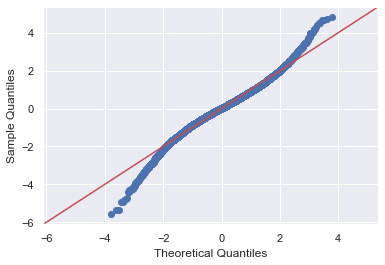

In [136]:
residuals_vnorm = model_vnorm.resid
fig = sm.graphics.qqplot(residuals_vnorm, dist=stats.norm, line='45', fit=True)
fig.show()

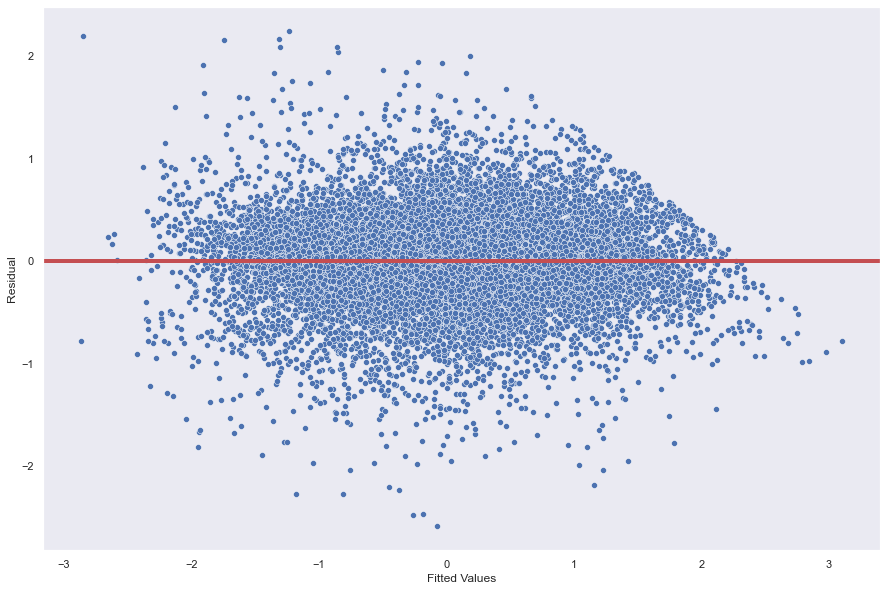

In [137]:
Heteroskedasticity_test(model_vnorm)

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


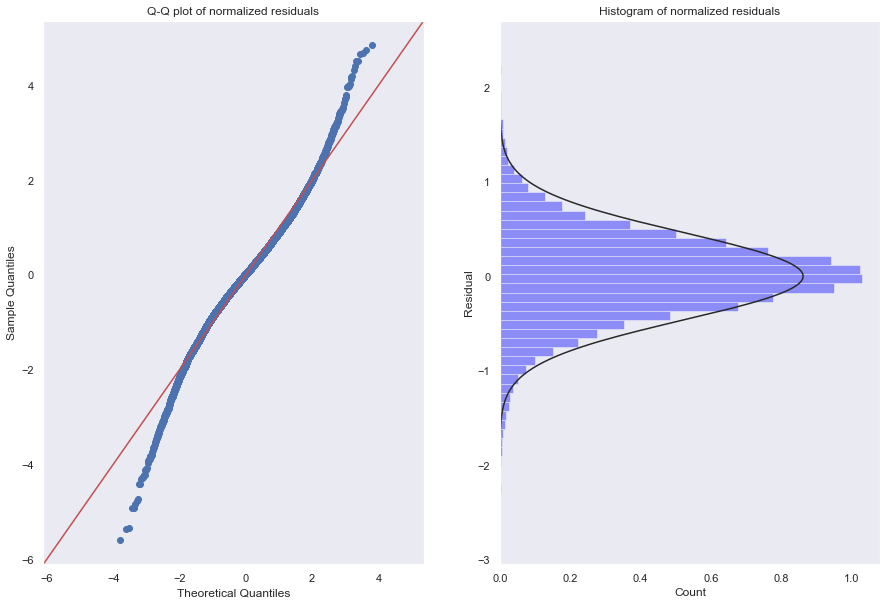

In [138]:
norm_dist_assumption(residuals_vnorm)

# Modifying Model 3

1. std=1
2. Create interaction btw Bed+Bath 
3. Change total_student => int64

Jarque-Bera (JB)
Durbin-Watson


In [240]:
data_pred_model3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19221 entries, 0 to 19220
Data columns (total 20 columns):
price                 19221 non-null float64
bedrooms              19221 non-null int64
bathrooms             19221 non-null float64
sqft_lot              19221 non-null int64
sqft_living           19221 non-null int64
floors                19221 non-null float64
waterfront            19221 non-null float64
condition             19221 non-null int64
grade                 19221 non-null int64
sqft_above            19221 non-null int64
sqft_basement         19221 non-null float64
district              19221 non-null object
grades                19221 non-null object
grade_num             19221 non-null int64
total_sch             19221 non-null int64
total_student         19221 non-null int32
transport_dist        19221 non-null float64
medical_emerg_dist    19221 non-null float64
entertain_dist        19221 non-null float64
job_center_dist       19221 non-null float64
dtypes: flo

## 1. Data cleaning
### I just noticed that the reason the feature total_student was appearing multiple times is due to the fact that the data type was still an object
#### This will elimate more degrees of freedom making my model more reliable

In [241]:
data_pred_model3.total_student = data_pred_model3.total_student.str.replace(',','').astype(int)
data_pred_model3.total_student.dtypes

AttributeError: Can only use .str accessor with string values!

## 2. Dealing with Outliers¶
### Removing values that fall outside of 1 std of the mean
In the last model it was clear from the QQ-plot that performing some transformations did not completely allow the residuals to be normally distributed. In this case the following alteration one can do is remove more outliers. Previously we remove only data points that were after 2 standard deviation from the mean.

In [242]:
from numpy import mean
from numpy import std 


In [243]:
outlier(data_pred_model3, 1)

([78000.0,
  82000.0,
  82500.0,
  83000.0,
  84000.0,
  85000.0,
  85000.0,
  86500.0,
  89000.0,
  89950.0,
  90000.0,
  90000.0,
  90000.0,
  90000.0,
  95000.0,
  95000.0,
  95000.0,
  95000.0,
  100000.0,
  100000.0,
  100000.0,
  100000.0,
  100000.0,
  102500.0,
  104950.0,
  105000.0,
  105500.0,
  106000.0,
  107000.0,
  107000.0,
  109000.0,
  109500.0,
  110000.0,
  110000.0,
  110000.0,
  110000.0,
  110000.0,
  110000.0,
  110700.0,
  111300.0,
  112000.0,
  114975.0,
  115000.0,
  115000.0,
  115000.0,
  115000.0,
  115000.0,
  115000.0,
  115000.0,
  118000.0,
  118125.0,
  119500.0,
  119900.0,
  120000.0,
  120000.0,
  120000.0,
  120750.0,
  121800.0,
  122000.0,
  122000.0,
  122000.0,
  122000.0,
  123300.0,
  124000.0,
  124000.0,
  124500.0,
  125000.0,
  125000.0,
  125000.0,
  125000.0,
  126000.0,
  126500.0,
  128000.0,
  128000.0,
  128000.0,
  128750.0,
  129000.0,
  129000.0,
  129000.0,
  130000.0,
  130000.0,
  130000.0,
  130000.0,
  130000.0,
  130000.0

In [244]:
data_pred_model4= data_pred_model3.loc[((data_pred_model3.price>262963.0) & (data_pred_model3.price<713833.0))]

In [245]:
data_pred_model4.reset_index(inplace=True)

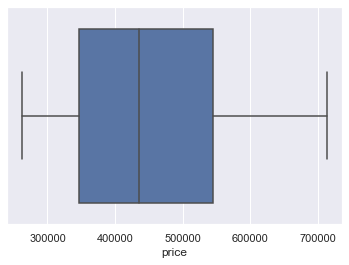

In [246]:
sns.boxplot(x=data_pred_model4['price'])

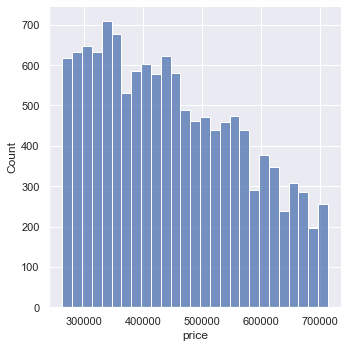

In [247]:
sns.displot(x=data_pred_model4['price'])

In [248]:
data_pred_model4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12944 entries, 0 to 12943
Data columns (total 21 columns):
index                 12944 non-null int64
price                 12944 non-null float64
bedrooms              12944 non-null int64
bathrooms             12944 non-null float64
sqft_lot              12944 non-null int64
sqft_living           12944 non-null int64
floors                12944 non-null float64
waterfront            12944 non-null float64
condition             12944 non-null int64
grade                 12944 non-null int64
sqft_above            12944 non-null int64
sqft_basement         12944 non-null float64
district              12944 non-null object
grades                12944 non-null object
grade_num             12944 non-null int64
total_sch             12944 non-null int64
total_student         12944 non-null int32
transport_dist        12944 non-null float64
medical_emerg_dist    12944 non-null float64
entertain_dist        12944 non-null float64
job_center_di

In [249]:
condition_dummy4 = pd.get_dummies(data_pred_model4.condition, prefix='condition', drop_first=True)
grade_dummy4 = pd.get_dummies(data_pred_model4.grade, prefix='grade', drop_first=True)
grade_num_dummy4 = pd.get_dummies(data_pred_model4.grade_num, prefix='grade_num', drop_first=True)
district_dummy4 = pd.get_dummies(data_pred_model4.district, prefix='district', drop_first=True)

processed_data4 = pd.concat([data_pred_model4, condition_dummy4, grade_dummy4, grade_num_dummy4, district_dummy4], axis=1)

processed_data4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12944 entries, 0 to 12943
Data columns (total 55 columns):
index                         12944 non-null int64
price                         12944 non-null float64
bedrooms                      12944 non-null int64
bathrooms                     12944 non-null float64
sqft_lot                      12944 non-null int64
sqft_living                   12944 non-null int64
floors                        12944 non-null float64
waterfront                    12944 non-null float64
condition                     12944 non-null int64
grade                         12944 non-null int64
sqft_above                    12944 non-null int64
sqft_basement                 12944 non-null float64
district                      12944 non-null object
grades                        12944 non-null object
grade_num                     12944 non-null int64
total_sch                     12944 non-null int64
total_student                 12944 non-null int32
transport_di

In [250]:
processed_data4= processed_data4.drop(['condition', 'grade','grade_num', 'district', ], axis=1)
processed_data4.columns = processed_data4.columns.str.replace(' ', '_')

# Checking Assumption

1. Multicollinearity
Due to the number of features I will not be looking into a scatter_matrix or looking at a heat map to locate correlation
2. linearity
3. Heteroskedasticity

In [251]:
# need to create this into a function
df= processed_data4.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df['pairs'] = list(zip(df.level_0, df.level_1))

df.set_index(['pairs'], inplace= True)

df.drop(columns=['level_1', 'level_0'], inplace= True)

df.columns= ['cc']

df.drop_duplicates(inplace=True)

df[(df.cc> .75) & (df.cc< 1)]

cc
pairs                                      
(total_sch, total_student)         0.993875
(district_seattle, total_sch)      0.952881
(total_student, district_seattle)  0.937291
(grade_num_11, district_seattle)   0.928075
(total_sch, grade_num_11)          0.847525
(condition_4, condition_3)         0.829351
(total_student, grade_num_11)      0.823052
(sqft_above, sqft_living)          0.810377
(grade_num_9, district_kent)       0.781630

In [252]:
processed_data4= processed_data4.drop(['district_seattle', 'district_kent', 'total_sch', 'total_student', 'condition_4', 'sqft_living'], axis=1)
processed_data4.info()

# how do i explain the reason to removing district_seattle and district_kent

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12944 entries, 0 to 12943
Data columns (total 45 columns):
index                         12944 non-null int64
price                         12944 non-null float64
bedrooms                      12944 non-null int64
bathrooms                     12944 non-null float64
sqft_lot                      12944 non-null int64
floors                        12944 non-null float64
waterfront                    12944 non-null float64
sqft_above                    12944 non-null int64
sqft_basement                 12944 non-null float64
grades                        12944 non-null object
transport_dist                12944 non-null float64
medical_emerg_dist            12944 non-null float64
entertain_dist                12944 non-null float64
job_center_dist               12944 non-null float64
condition_2                   12944 non-null uint8
condition_3                   12944 non-null uint8
condition_5                   12944 non-null uint8
grade

In [253]:
processed_data4= processed_data4.drop(['index', 'grades'], axis=1)

# Creating the model no transformation

In [254]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

train, test = train_test_split(processed_data4)
print(len(train), len(test))

9708 3236


In [255]:
outcome = 'price'
x_cols = list(processed_data4.columns)
x_cols.remove(outcome)

##
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     388.8
Date:                Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:53:19   Log-Likelihood:            -1.2306e+05
No. Observations:                9708   AIC:                         2.462e+05
Df Residuals:                    9671   BIC:                         2.465e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   2.756e+05   3.98e+04      6.926      0.000    1.98e+05    3.54e+05
bedrooms                   -2086.8396   1092.389     -1.910      0.056   -4228.151      54.472
bathrooms                   1779.2861   1888.804      0.942      0.346   -1923.166    5481.738
sqft_lot                       0.3703      0.023     16.050      0.000       0.325       0.416
floors                     -1.617e+04   2083.301     -7.763      0.000   -2.03e+04   -1.21e+04
waterfront                  1.743e+05   1.69e+04     10.304      0.000    1.41e+05    2.07e+05
sqft_above                    89.9772      2.248     40.020      0.000      85.570      94.384
sqft_basement                 56.5836      2.715     20.843      0.000      51.262      61.905
transport_dist             -3495.7417    319.188    -10.952      0.000   -4121.416   -2870.067
medical_emerg_dist          1.388e+04    794.623     17.470      0.000    1.23e+04    1.54e+04
entertain_dist             -1.347e+04    814.189    -16.544      0.000   -1.51e+04   -1.19e+04
job_center_dist            -3495.7417    319.188    -10.952      0.000   -4121.416   -2870.067
condition_2                -3.999e+04   1.06e+04     -3.764      0.000   -6.08e+04   -1.92e+04
condition_3                -2.079e+04   1971.819    -10.542      0.000   -2.47e+04   -1.69e+04
condition_5                 2.722e+04   3367.120      8.083      0.000    2.06e+04    3.38e+04
grade_5                    -7.055e+04    4.6e+04     -1.535      0.125   -1.61e+05    1.95e+04
grade_6                    -8.541e+04    4.5e+04     -1.898      0.058   -1.74e+05    2796.684
grade_7                    -4.843e+04   4.49e+04     -1.078      0.281   -1.37e+05    3.97e+04
grade_8                    -5701.5820    4.5e+04     -0.127      0.899   -9.39e+04    8.25e+04
grade_9                     4.381e+04   4.51e+04      0.972      0.331   -4.46e+04    1.32e+05
grade_10                    6.148e+04   4.56e+04      1.349      0.178   -2.79e+04    1.51e+05
grade_11                    5.826e+04    5.4e+04      1.079      0.281   -4.76e+04    1.64e+05
grade_num_8                 6624.1500   2945.346      2.249      0.025     850.656    1.24e+04
grade_num_9                -4.305e+04   6094.831     -7.064      0.000    -5.5e+04   -3.11e+04
grade_num_10                1.714e+04   3959.055      4.328      0.000    9374.576    2.49e+04
grade_num_11                 1.72e+05   5684.094     30.257      0.000    1.61e+05    1.83e+05
grade_num_12                2.751e+04   4915.556      5.596      0.000    1.79e+04    3.71e+04
grade_num_13                1.353e+05   5315.238     25.458      0.000    1.25e+05    1.46e+05
district_bellevue           4.188e+04   4785.999      8.750      0.000    3.25e+04    5.13e+04
district_enumclaw          -3.523e+04   898

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


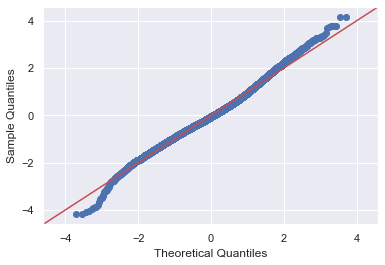

In [256]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

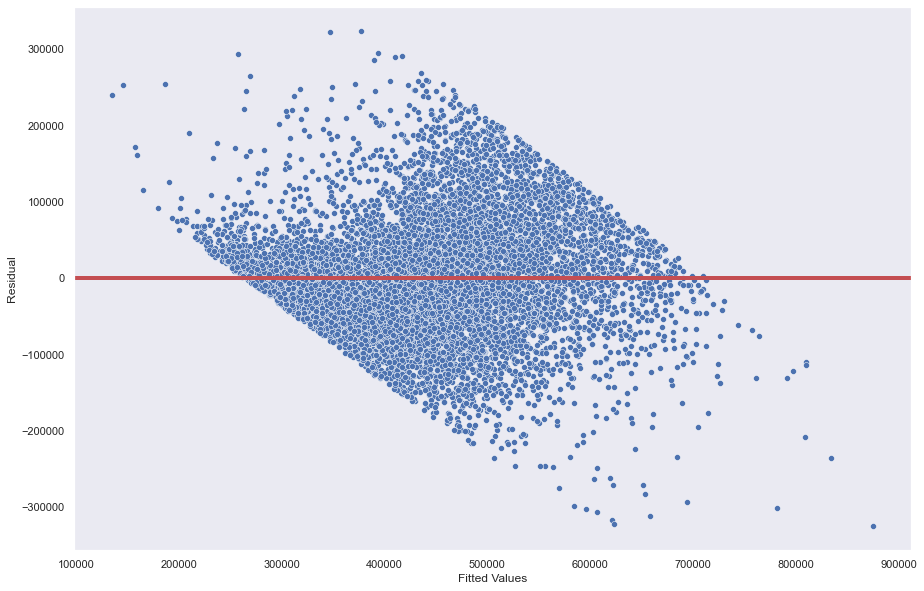

In [257]:
Heteroskedasticity_test(model)

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


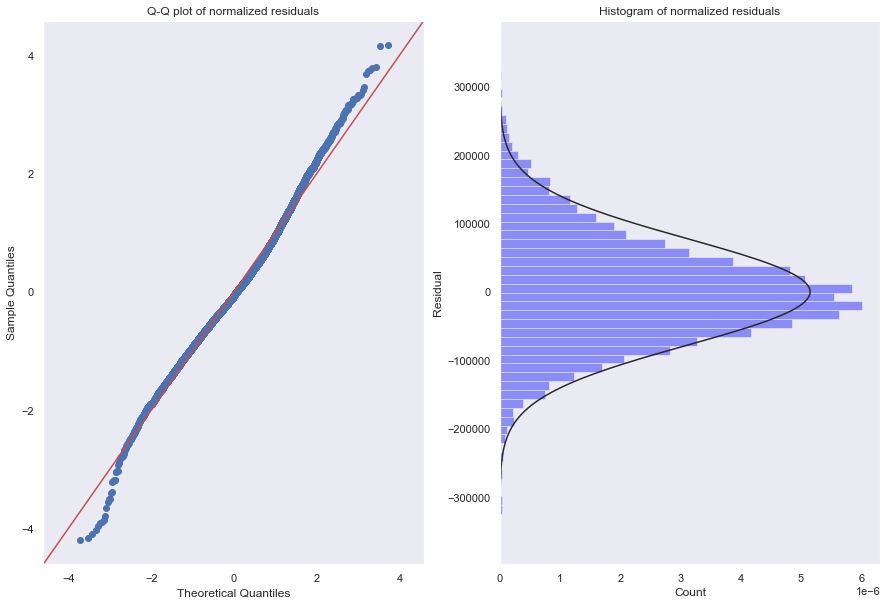

In [258]:
norm_dist_assumption(residuals)

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\egust\anaco

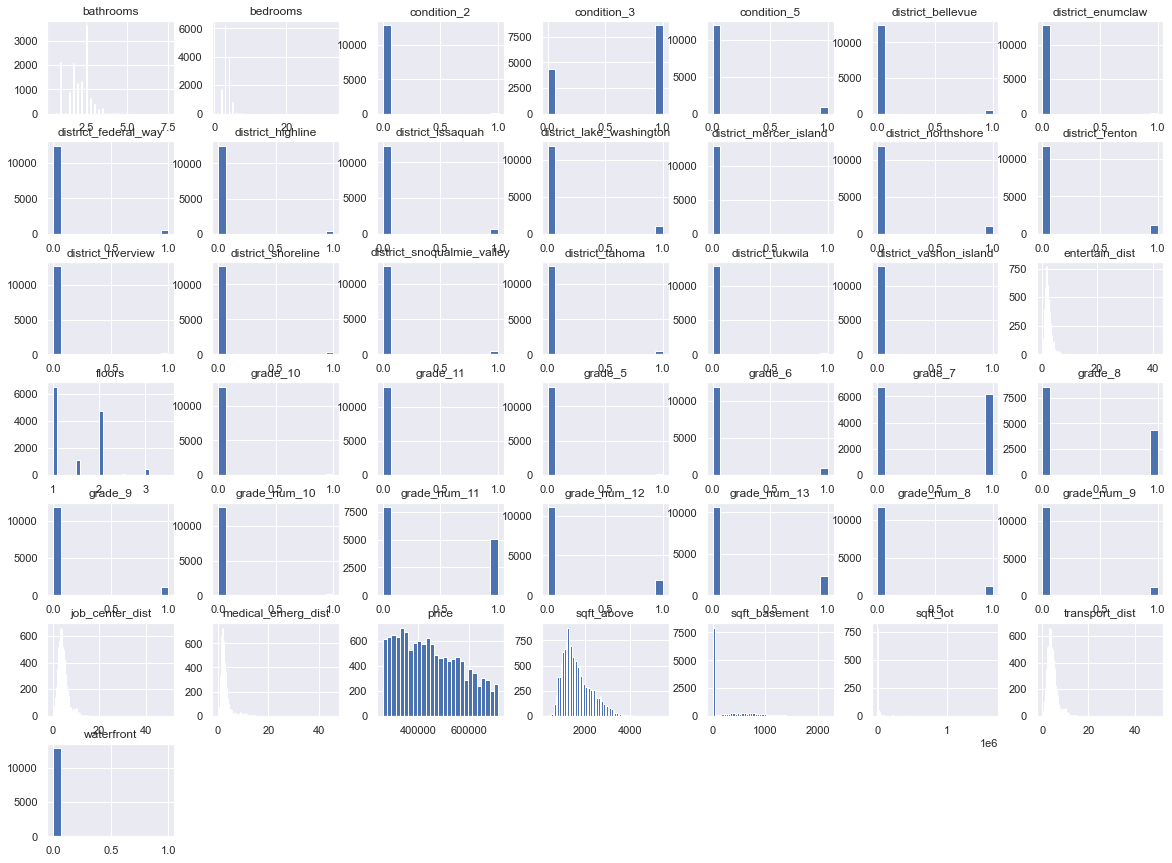

In [259]:
processed_data4.hist(figsize=(20,15), bins='auto');

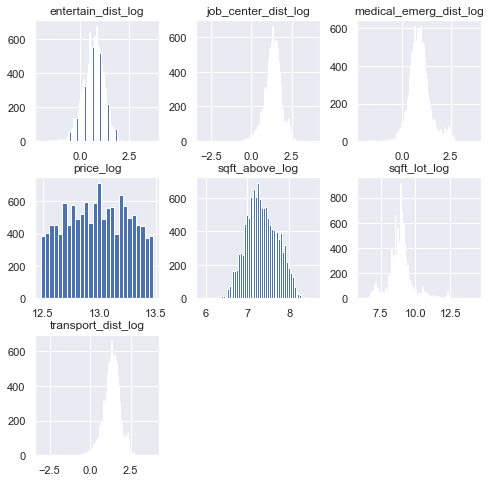

In [260]:
data_pred_model4_cont = processed_data4[['price', 'sqft_above', 'sqft_lot', 'job_center_dist', 'medical_emerg_dist', 'transport_dist', 'entertain_dist']]
log_names = [f'{column}_log' for column in data_pred_model4_cont.columns]

data_pc_log = np.log(data_pred_model4_cont)
data_pc_log.columns = log_names
data_pc_log.hist(figsize = [8,8], bins = 'auto')
fig.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024ADCB34EF0>,
      dtype=object)

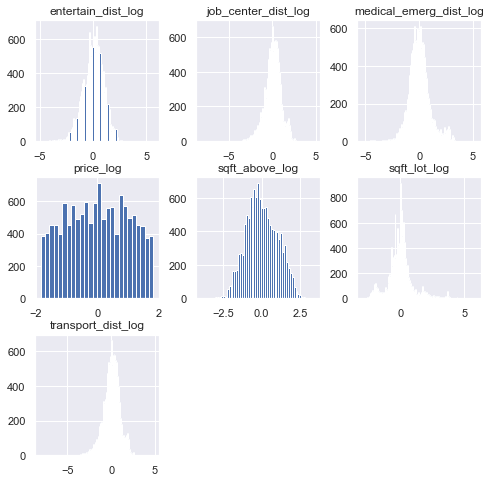

In [261]:
features_final = data_pc_log.apply(normalize)

features_final.hist(figsize  = [8, 8], color='b', bins= 'auto')

In [262]:
processed_data4_norm = pd.concat([processed_data4, features_final], axis=1)
processed_data4_norm= processed_data4_norm.drop(['price', 'sqft_above', 'sqft_lot', 'job_center_dist', 'medical_emerg_dist', 'transport_dist', 'entertain_dist'], axis=1)

In [263]:
train_norm, test_norm = train_test_split(processed_data4_norm)

In [264]:
outcome = 'price_log'
x_cols = list(processed_data4_norm.columns)
x_cols.remove(outcome)

In [265]:
predictors_vnorm = '+'.join(x_cols)
formula_vnorm = outcome + '~' + predictors_vnorm
model_vnorm = ols(formula=formula_vnorm, data=train_norm).fit()
model_vnorm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     415.1
Date:                Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:54:47   Log-Likelihood:                -9220.7
No. Observations:                9708   AIC:                         1.852e+04
Df Residuals:                    9671   BIC:                         1.878e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.3936      0.281      1.400      0.162      -0.158       0.945
bedrooms                      -0.0338      0.009     -3.812      0.000      -0.051      -0.016
bathrooms                      0.0305      0.015      1.994      0.046       0.001       0.061
floors                        -0.0316      0.018     -1.731      0.084      -0.067       0.004
waterfront                     1.5254      0.141     10.830      0.000       1.249       1.801
sqft_basement                  0.0004   2.19e-05     19.761      0.000       0.000       0.000
condition_2                   -0.1816      0.084     -2.172      0.030      -0.346      -0.018
condition_3                   -0.1242      0.016     -7.789      0.000      -0.155      -0.093
condition_5                    0.2275      0.027      8.392      0.000       0.174       0.281
grade_5                       -1.3252      0.326     -4.067      0.000      -1.964      -0.686
grade_6                       -1.3700      0.315     -4.345      0.000      -1.988      -0.752
grade_7                       -1.1080      0.315     -3.517      0.000      -1.726      -0.490
grade_8                       -0.7362      0.316     -2.333      0.020      -1.355      -0.118
grade_9                       -0.2981      0.317     -0.941      0.347      -0.919       0.323
grade_10                      -0.1123      0.321     -0.350      0.727      -0.742       0.517
grade_11                       0.1612      0.424      0.380      0.704      -0.670       0.993
grade_num_8                   -0.0429      0.021     -2.016      0.044      -0.085      -0.001
grade_num_9                   -0.5691      0.044    -12.797      0.000      -0.656      -0.482
grade_num_10                  -0.0948      0.030     -3.120      0.002      -0.154      -0.035
grade_num_11                   1.3460      0.042     32.061      0.000       1.264       1.428
grade_num_12                   0.0086      0.037      0.235      0.814      -0.063       0.080
grade_num_13                   0.9147      0.040     23.118      0.000       0.837       0.992
district_bellevue              0.3638      0.038      9.554      0.000       0.289       0.438
district_enumclaw             -0.4666      0.077     -6.034      0.000      -0.618      -0.315
district_federal_way          -0.8530      0.047    -18.158      0.000      -0.945      -0.761
district_highline              0.2344      0.050      4.701      0.000       0.137       0.332
district_issaquah             -0.1208      0.037     -3.296      0.001      -0.193      -0.049
district_lake_washington      -0.2551      0.035     -7.267      0.000      -0.324      -0.186
district_mercer_island         0.9268      0.103      8.968      0.000       0.724       1.129
district_northshore            0.6784      

In [266]:
residuals_vnorm = model_vnorm.resid

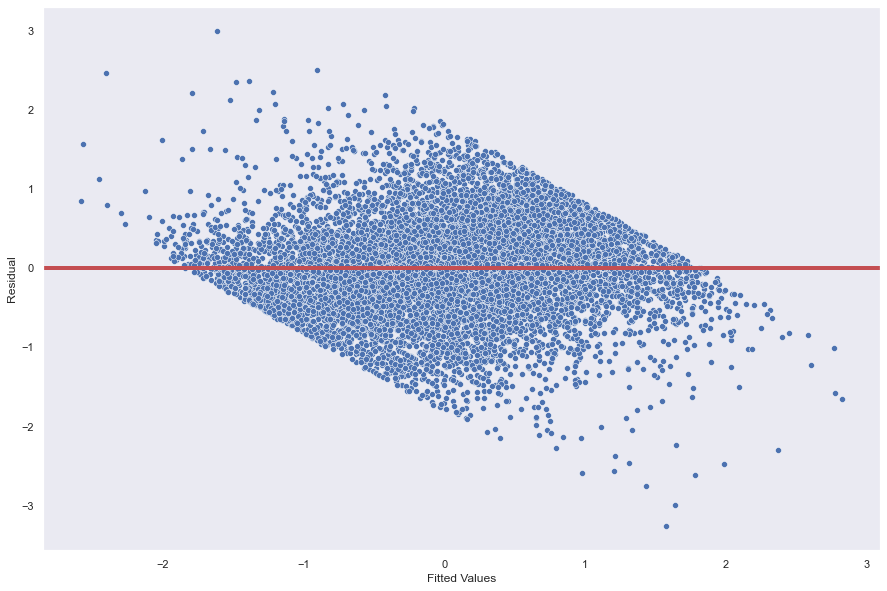

In [267]:
Heteroskedasticity_test(model_vnorm)

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


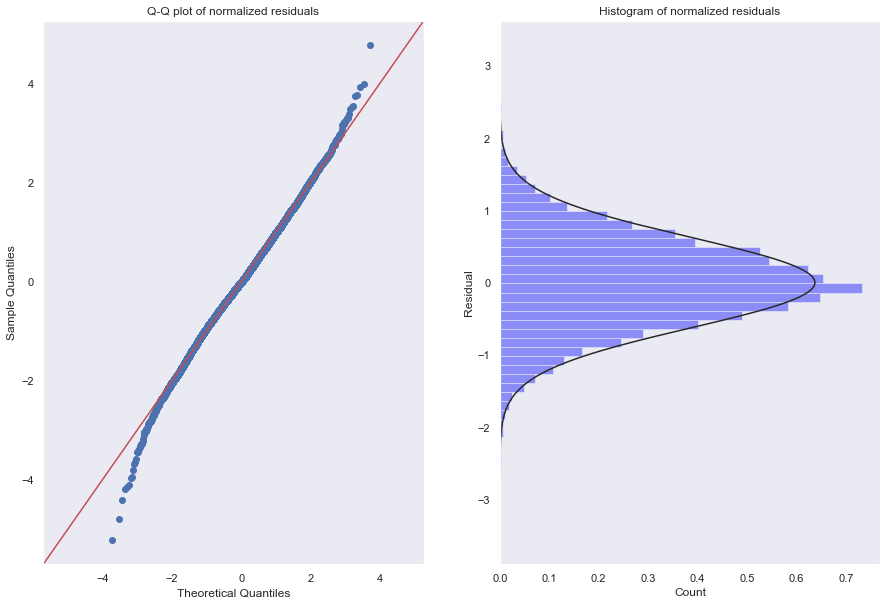

In [268]:
norm_dist_assumption(residuals_vnorm)

In [269]:
#Backward Elimination
y = processed_data4_norm['price_log']
X = processed_data4_norm[x_cols]
cols = x_cols
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE_norm = cols
print(selected_features_BE_norm)

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['bedrooms', 'bathrooms', 'floors', 'waterfront', 'sqft_basement', 'condition_2', 'condition_3', 'condition_5', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_num_9', 'grade_num_11', 'grade_num_13', 'district_bellevue', 'district_enumclaw', 'district_federal_way', 'district_highline', 'district_issaquah', 'district_lake_washington', 'district_mercer_island', 'district_northshore', 'district_shoreline', 'district_snoqualmie_valley', 'district_tahoma', 'district_tukwila', 'sqft_above_log', 'sqft_lot_log', 'job_center_dist_log', 'medical_emerg_dist_log', 'transport_dist_log', 'entertain_dist_log']


In [270]:
predictors_vnorm2 = '+'.join(selected_features_BE_norm)
formula_vnorm2 = outcome + '~' + predictors_vnorm2
model_vnorm2 = ols(formula=formula_vnorm2, data=train_norm).fit()
model_vnorm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     466.8
Date:                Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:55:27   Log-Likelihood:                -9223.1
No. Observations:                9708   AIC:                         1.851e+04
Df Residuals:                    9675   BIC:                         1.875e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.2002      0.073      2.751      0.006       0.058       0.343
bedrooms                      -0.0324      0.009     -3.665      0.000      -0.050      -0.015
bathrooms                      0.0292      0.015      1.910      0.056      -0.001       0.059
floors                        -0.0349      0.018     -1.922      0.055      -0.071       0.001
waterfront                     1.5104      0.135     11.161      0.000       1.245       1.776
sqft_basement                  0.0004   2.19e-05     19.761      0.000       0.000       0.000
condition_2                   -0.1831      0.084     -2.190      0.029      -0.347      -0.019
condition_3                   -0.1263      0.016     -7.946      0.000      -0.157      -0.095
condition_5                    0.2282      0.027      8.419      0.000       0.175       0.281
grade_5                       -1.2297      0.105    -11.687      0.000      -1.436      -1.023
grade_6                       -1.2766      0.063    -20.258      0.000      -1.400      -1.153
grade_7                       -1.0132      0.056    -17.960      0.000      -1.124      -0.903
grade_8                       -0.6402      0.055    -11.675      0.000      -0.748      -0.533
grade_9                       -0.2017      0.057     -3.521      0.000      -0.314      -0.089
grade_num_9                   -0.4690      0.032    -14.838      0.000      -0.531      -0.407
grade_num_11                   1.4451      0.026     56.056      0.000       1.395       1.496
grade_num_13                   0.9977      0.031     31.765      0.000       0.936       1.059
district_bellevue              0.3817      0.037     10.291      0.000       0.309       0.454
district_enumclaw             -0.4510      0.077     -5.864      0.000      -0.602      -0.300
district_federal_way          -0.7485      0.036    -20.797      0.000      -0.819      -0.678
district_highline              0.3321      0.041      8.173      0.000       0.252       0.412
district_issaquah             -0.0987      0.036     -2.776      0.006      -0.168      -0.029
district_lake_washington      -0.2313      0.034     -6.822      0.000      -0.298      -0.165
district_mercer_island         0.9460      0.104      9.117      0.000       0.743       1.149
district_northshore            0.7920      0.030     26.757      0.000       0.734       0.850
district_shoreline             0.2147      0.045      4.795      0.000       0.127       0.303
district_snoqualmie_valley    -1.0708      0.043    -24.959      0.000      -1.155      -0.987
district_tahoma               -0.4952      0.041    -11.946      0.000      -0.576      -0.414
district_tukwila              -0.4439      0.065     -6.821      0.000      -0.571      -0.316
sqft_above_log                 0.4147      

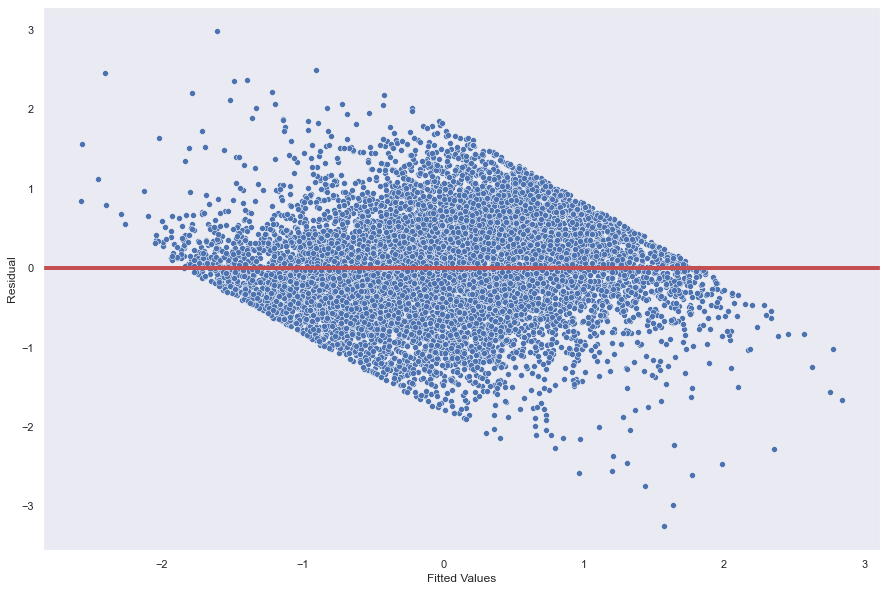

In [271]:
Heteroskedasticity_test(model_vnorm2)

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


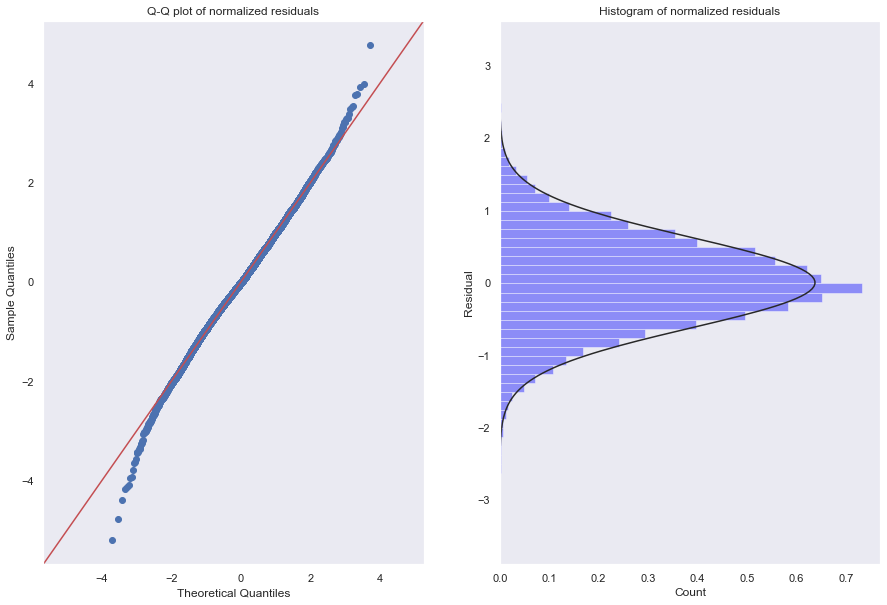

In [272]:
norm_dist_assumption(model_vnorm2.resid)

Normalizing every feature

In [273]:
processed_data4

price  bedrooms  bathrooms  sqft_lot  floors  waterfront  \
0      538000.0         3       2.25      7242     2.0         0.0   
1      604000.0         4       3.00      5000     1.0         0.0   
2      510000.0         3       2.00      8080     1.0         0.0   
3      291850.0         3       1.50      9711     1.0         0.0   
4      323000.0         3       2.50      6560     2.0         0.0   
...         ...       ...        ...       ...     ...         ...   
12939  475000.0         3       2.50      1294     2.0         0.0   
12940  360000.0         3       2.50      1131     3.0         0.0   
12941  400000.0         4       2.50      5813     2.0         0.0   
12942  402101.0         2       0.75      1350     2.0         0.0   
12943  325000.0         2       0.75      1076     2.0         0.0   

       sqft_above  sqft_basement  transport_dist  medical_emerg_dist  ...  \
0            2170          400.0        4.627271            1.990067  ...   
1            1050          910.0        4.845578            2.957678  ...   
2            1680            0.0       10.199269           11.376441  ...   
3            1060            0.0        4.835654            1.980706  ...   
4            1890            0.0        0.991228            1.954130  ...   
...           ...            ...             ...                 ...  ...   
12939        1180          130.0        5.437094            3.035029  ...   
12940        1530            0.0        3.650914            0.758165  ...   
12941        2310            0.0        4.881942            4.103542  ...   
12942        1020            0.0        2.952854            1.425222  ...   
12943        1020            0.0        2.937135            1.442284  ...   

       district_lake_washington  district_mercer_island  district_northshore  \
0                             0                       0                    0   
1                             0                       0                    0   
2                             1                       0                    0   
3                             0                       0                    0   
4                             0                       0                    0   
...                         ...                     ...                  ...   
12939                         0                       0                    0   
12940                         0                       0                    0   
12941                         0                       0                    0   
12942                         0                       0                    0   
12943                         0                       0                    0   

       district_renton  district_riverview  district_shoreline  \
0                    0                   0                   0   
1                    0                   0                   0   
2                    0                   0                   0   
3                    0                   0                   0   
4                    0                   0                   0   
...                ...                 ...                 ...   
12939                0                   0                   0   
12940                0                   0                   0   
12941                0                   0                   0   
12942                0                   0                   0   
12943                0                   0                   0   

       district_snoqualmie_valley  district_tahoma  district_tukwila  \
0                               0                0                 0   
1                               0                0                 0   
2                               0                0                 0   
3                               0                0                 0   
4                               0                1                 0   
...                           ...              ...        

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\egust\anaco

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024ADC909198>,
      dtype=object)

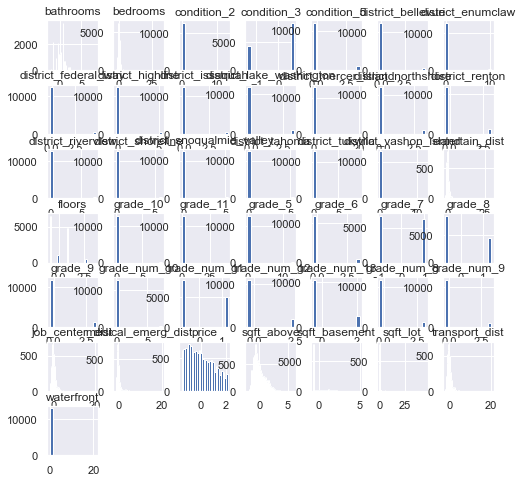

In [274]:
features_final4 = processed_data4.apply(normalize)

features_final4.hist(figsize  = [8, 8], color='b', bins= 'auto')

In [275]:
features_final4

price  bedrooms  bathrooms  sqft_lot    floors  waterfront  \
0      0.719900 -0.347578   0.304014 -0.184457  0.932103   -0.047384   
1      1.262842  0.756484   1.455879 -0.246355 -0.888776   -0.047384   
2      0.489561 -0.347578  -0.079941 -0.161321 -0.888776   -0.047384   
3     -1.305025 -0.347578  -0.847851 -0.116292 -0.888776   -0.047384   
4     -1.048773 -0.347578   0.687969 -0.203286  0.932103   -0.047384   
...         ...       ...        ...       ...       ...         ...   
12939  0.201638 -0.347578   0.687969 -0.348672  0.932103   -0.047384   
12940 -0.744397 -0.347578   0.687969 -0.353172  2.752982   -0.047384   
12941 -0.415341  0.756484   0.687969 -0.223910  0.932103   -0.047384   
12942 -0.398058 -1.451641  -1.999716 -0.347126  0.932103   -0.047384   
12943 -1.032321 -1.451641  -1.999716 -0.354690  0.932103   -0.047384   

       sqft_above  sqft_basement  transport_dist  medical_emerg_dist  ...  \
0        0.827264       0.357054        0.199585           -0.395515  ...   
1       -0.953659       1.661005        0.296975            0.057137  ...   
2        0.048110      -0.665653        2.685337            3.995465  ...   
3       -0.937758      -0.665653        0.292548           -0.399894  ...   
4        0.382033      -0.665653       -1.422509           -0.412327  ...   
...           ...            ...             ...                 ...  ...   
12939   -0.746945      -0.333273        0.560859            0.093322  ...   
12940   -0.190407      -0.665653       -0.235982           -0.971804  ...   
12941    1.049879      -0.665653        0.313197            0.593176  ...   
12942   -1.001363      -0.665653       -0.547398           -0.659752  ...   
12943   -1.001363      -0.665653       -0.554410           -0.651770  ...   

       district_lake_washington  district_mercer_island  district_northshore  \
0                     -0.303528               -0.048995            -0.292931   
1                     -0.303528               -0.048995            -0.292931   
2                      3.294335               -0.048995            -0.292931   
3                     -0.303528               -0.048995            -0.292931   
4                     -0.303528               -0.048995            -0.292931   
...                         ...                     ...                  ...   
12939                 -0.303528               -0.048995            -0.292931   
12940                 -0.303528               -0.048995            -0.292931   
12941                 -0.303528               -0.048995            -0.292931   
12942                 -0.303528               -0.048995            -0.292931   
12943                 -0.303528               -0.048995            -0.292931   

       district_renton  district_riverview  district_shoreline  \
0            -0.321841           -0.135681            -0.16792   
1            -0.321841           -0.135681            -0.16792   
2            -0.321841           -0.135681            -0.16792   
3            -0.321841           -0.135681            -0.16792   
4            -0.321841           -0.135681            -0.16792   
...                ...                 ...                 ...   
12939        -0.321841           -0.135681            -0.16792   
12940        -0.321841           -0.135681            -0.16792   
12941        -0.321841           -0.135681            -0.16792   
12942        -0.321841           -0.135681            -0.16792   
12943        -0.321841           -0.135681            -0.16792   

       district_snoqualmie_valley  district_tahoma  district_tukwila  \
0                       -0.189993        -0.185584         -0.107174   
1                       -0.189993        -0.185584         -0.107174   
2                       -0.189993        -0.185584         -0.107174   
3                       -0.189993        -0.185584         -0.107174   
4                       -0.189993         5.387972         -0.107174   
...                           ... 

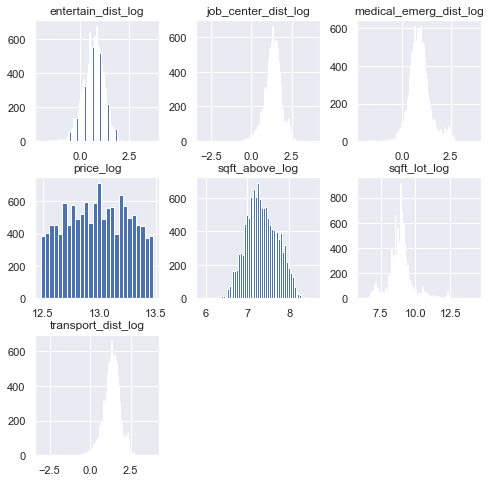

In [276]:
data_pred_model4_cont = processed_data4[['price', 'sqft_above', 'sqft_lot', 'job_center_dist', 'medical_emerg_dist', 'transport_dist', 'entertain_dist']]
log_names = [f'{column}_log' for column in data_pred_model4_cont.columns]

data_pc_log = np.log(data_pred_model4_cont)
data_pc_log.columns = log_names
data_pc_log.hist(figsize = [8,8], bins = 'auto')
fig.tight_layout()

In [277]:
processed_data4_log = pd.concat([processed_data4, data_pc_log], axis=1)
processed_data4_log= processed_data4_log.drop(['price', 'sqft_above', 'sqft_lot', 'job_center_dist', 'medical_emerg_dist', 'transport_dist', 'entertain_dist'], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024AD8682278>,
      dtype=object)

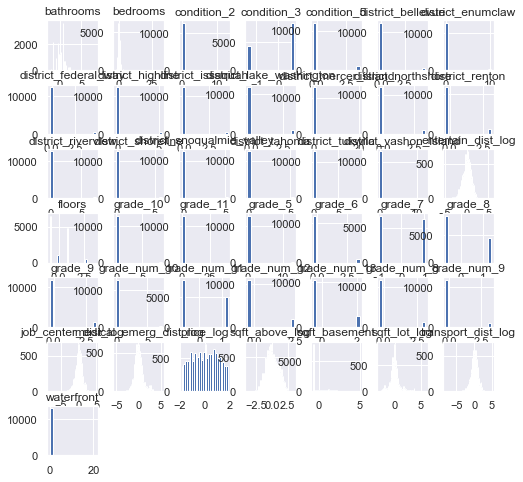

In [278]:
features_final4 = processed_data4_log.apply(normalize)

In [279]:
features_final4

bedrooms  bathrooms    floors  waterfront  sqft_basement  condition_2  \
0     -0.347578   0.304014  0.932103   -0.047384       0.357054    -0.077355   
1      0.756484   1.455879 -0.888776   -0.047384       1.661005    -0.077355   
2     -0.347578  -0.079941 -0.888776   -0.047384      -0.665653    -0.077355   
3     -0.347578  -0.847851 -0.888776   -0.047384      -0.665653    -0.077355   
4     -0.347578   0.687969  0.932103   -0.047384      -0.665653    -0.077355   
...         ...        ...       ...         ...            ...          ...   
12939 -0.347578   0.687969  0.932103   -0.047384      -0.333273    -0.077355   
12940 -0.347578   0.687969  2.752982   -0.047384      -0.665653    -0.077355   
12941  0.756484   0.687969  0.932103   -0.047384      -0.665653    -0.077355   
12942 -1.451641  -1.999716  0.932103   -0.047384      -0.665653    -0.077355   
12943 -1.451641  -1.999716  0.932103   -0.047384      -0.665653    -0.077355   

       condition_3  condition_5   grade_5   grade_6  ...  district_tahoma  \
0         0.711180    -0.276277 -0.077859 -0.286824  ...        -0.185584   
1        -1.406004     3.619282 -0.077859 -0.286824  ...        -0.185584   
2         0.711180    -0.276277 -0.077859 -0.286824  ...        -0.185584   
3         0.711180    -0.276277 -0.077859 -0.286824  ...        -0.185584   
4         0.711180    -0.276277 -0.077859 -0.286824  ...         5.387972   
...            ...          ...       ...       ...  ...              ...   
12939     0.711180    -0.276277 -0.077859 -0.286824  ...        -0.185584   
12940     0.711180    -0.276277 -0.077859 -0.286824  ...        -0.185584   
12941     0.711180    -0.276277 -0.077859 -0.286824  ...        -0.185584   
12942     0.711180    -0.276277 -0.077859 -0.286824  ...        -0.185584   
12943     0.711180    -0.276277 -0.077859 -0.286824  ...        -0.185584   

       district_tukwila  district_vashon_island  price_log  sqft_above_log  \
0             -0.107174               -0.082257   0.787392        0.926705   
1             -0.107174               -0.082257   1.212760       -1.034752   
2             -0.107174               -0.082257   0.590919        0.235182   
3             -0.107174               -0.082257  -1.460902       -1.009141   
4             -0.107174               -0.082257  -1.088113        0.553427   
...                 ...                     ...        ...             ...   
12939         -0.107174               -0.082257   0.329572       -0.719367   
12940         -0.107174               -0.082257  -0.689447       -0.017523   
12941         -0.107174               -0.082257  -0.302145        1.095633   
12942         -0.107174               -0.082257  -0.282887       -1.113076   
12943         -0.107174               -0.082257  -1.065422       -1.113076   

       sqft_lot_log  job_center_dist_log  medical_emerg_dist_log  \
0         -0.023631             0.432798               -0.320373   
1         -0.426679             0.518260                0.386253   
2          0.095495             1.898004                2.788668   
3          0.295537             0.514460               -0.328782   
4         -0.131239            -2.423608               -0.352871   
...             ...                  ...                     ...   
12939     -1.897282             0.731786                0.432292   
12940     -2.043762            -0.006551               -2.041342   
12941     -0.262767             0.532121                0.970202   
12942     -1.851189            -0.399953               -0.915726   
12943     -2.097999            -0.409848               -0.894504   

       transport_dist_log  entertain_dist_log  
0                0.432798            0.395640  
1                0.518260            0.713624  
2                1.898004           -1.635805  
3                0.514460            0.297493  
4               -2.423608           -1.560754  
...                   ...                 ...  
12939            0.731786      

In [280]:
train_norm_f, test_norm_f = train_test_split(features_final4)

In [281]:
outcome = 'price_log'
x_cols = list(features_final4.columns)
x_cols.remove(outcome)

In [282]:
predictors_vnorm = '+'.join(x_cols)
formula_vnorm = outcome + '~' + predictors_vnorm
model_vnorm = ols(formula=formula_vnorm, data=train_norm_f).fit()
model_vnorm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     407.1
Date:                Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:58:02   Log-Likelihood:                -9294.1
No. Observations:                9708   AIC:                         1.866e+04
Df Residuals:                    9671   BIC:                         1.893e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.0068      0.006      1.054      0.292      -0.006       0.019
bedrooms                      -0.0333      0.008     -4.117      0.000      -0.049      -0.017
bathrooms                      0.0228      0.010      2.257      0.024       0.003       0.043
floors                        -0.0168      0.010     -1.658      0.097      -0.037       0.003
waterfront                     0.0657      0.007      9.211      0.000       0.052       0.080
sqft_basement                  0.1631      0.009     18.895      0.000       0.146       0.180
condition_2                   -0.0167      0.006     -2.576      0.010      -0.029      -0.004
condition_3                   -0.0641      0.008     -8.431      0.000      -0.079      -0.049
condition_5                    0.0591      0.007      8.371      0.000       0.045       0.073
grade_5                       -0.0831      0.025     -3.271      0.001      -0.133      -0.033
grade_6                       -0.2907      0.084     -3.440      0.001      -0.456      -0.125
grade_7                       -0.4261      0.159     -2.677      0.007      -0.738      -0.114
grade_8                       -0.2322      0.151     -1.537      0.124      -0.528       0.064
grade_9                       -0.0102      0.090     -0.114      0.909      -0.186       0.166
grade_10                       0.0120      0.037      0.324      0.746      -0.060       0.084
grade_11                       0.0173      0.011      1.624      0.104      -0.004       0.038
grade_num_8                   -0.0894      0.003    -28.676      0.000      -0.096      -0.083
grade_num_9                   -0.3057      0.007    -46.343      0.000      -0.319      -0.293
grade_num_10                  -0.0498      0.003    -14.688      0.000      -0.056      -0.043
grade_num_11                   0.3893      0.006     63.937      0.000       0.377       0.401
grade_num_12                  -0.0563      0.003    -16.246      0.000      -0.063      -0.049
grade_num_13                   0.0680      0.003     19.463      0.000       0.061       0.075
district_bellevue              0.1108      0.006     19.108      0.000       0.099       0.122
district_enumclaw             -0.0450      0.007     -6.313      0.000      -0.059      -0.031
district_federal_way          -0.2834      0.006    -44.923      0.000      -0.296      -0.271
district_highline             -0.0495      0.006     -7.815      0.000      -0.062      -0.037
district_issaquah              0.0190      0.006      3.406      0.001       0.008       0.030
district_lake_washington      -0.0128      0.006     -2.266      0.023      -0.024      -0.002
district_mercer_island         0.0619      0.006      9.783      0.000       0.049       0.074
district_northshore            0.0842      

In [283]:
residuals_vnorm = model_vnorm.resid

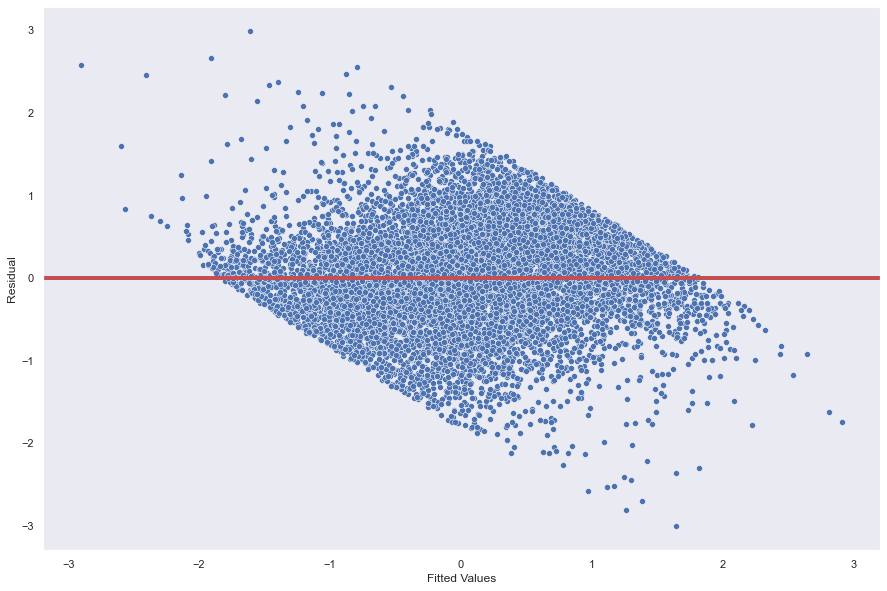

In [284]:
Heteroskedasticity_test(model_vnorm)

C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


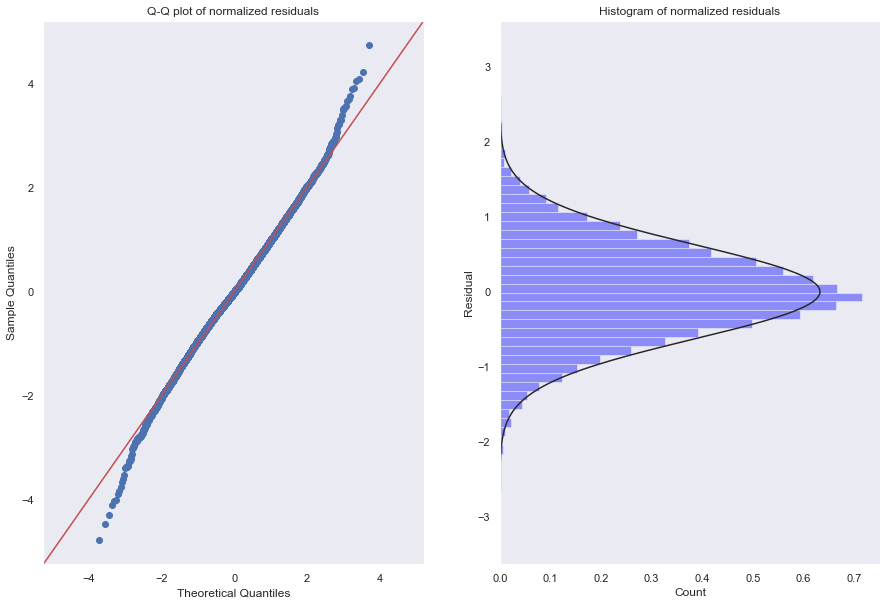

In [285]:
norm_dist_assumption(residuals_vnorm)

Your Jupyter Notebook should demonstrate an iterative approach to modeling. This means that you begin with a basic model, evaluate it, and then provide justification for and proceed to a new model. After you finish refining your models, you should provide 1-3 paragraphs discussing your final model - this should include interpreting at least 3 important parameter estimates or statistics.

In [286]:
#Backward Elimination
y = features_final4['price_log']
X = features_final4[x_cols]
cols = x_cols
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE_norm = cols
print(selected_features_BE_norm)

['bedrooms', 'bathrooms', 'floors', 'waterfront', 'sqft_basement', 'condition_2', 'condition_3', 'condition_5', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_num_8', 'grade_num_9', 'grade_num_10', 'grade_num_11', 'grade_num_12', 'grade_num_13', 'district_bellevue', 'district_enumclaw', 'district_federal_way', 'district_highline', 'district_issaquah', 'district_lake_washington', 'district_mercer_island', 'district_northshore', 'district_renton', 'district_riverview', 'district_shoreline', 'district_snoqualmie_valley', 'district_tahoma', 'district_tukwila', 'district_vashon_island', 'sqft_above_log', 'sqft_lot_log', 'job_center_dist_log', 'medical_emerg_dist_log', 'transport_dist_log', 'entertain_dist_log']


C:\Users\egust\anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [227]:
selected_features_BE_norm

['bedrooms',
 'bathrooms',
 'floors',
 'waterfront',
 'sqft_basement',
 'condition_2',
 'condition_3',
 'condition_5',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_num_8',
 'grade_num_9',
 'grade_num_10',
 'grade_num_11',
 'grade_num_12',
 'grade_num_13',
 'district_bellevue',
 'district_enumclaw',
 'district_federal_way',
 'district_highline',
 'district_issaquah',
 'district_lake_washington',
 'district_mercer_island',
 'district_northshore',
 'district_renton',
 'district_riverview',
 'district_shoreline',
 'district_snoqualmie_valley',
 'district_tahoma',
 'district_tukwila',
 'district_vashon_island',
 'sqft_above_log',
 'sqft_lot_log',
 'job_center_dist_log',
 'medical_emerg_dist_log',
 'transport_dist_log',
 'entertain_dist_log']

In [287]:
predictors_vnorm2 = '+'.join(selected_features_BE_norm)
formula_vnorm2 = outcome + '~' + predictors_vnorm2
model_vnorm2 = ols(formula=formula_vnorm2, data=train_norm_f).fit()
model_vnorm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     430.8
Date:                Tue, 15 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:59:18   Log-Likelihood:                -9296.3
No. Observations:                9708   AIC:                         1.866e+04
Df Residuals:                    9673   BIC:                         1.891e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.0067      0.006      1.044      0.296      -0.006       0.019
bedrooms                      -0.0330      0.008     -4.086      0.000      -0.049      -0.017
bathrooms                      0.0227      0.010      2.244      0.025       0.003       0.043
floors                        -0.0169      0.010     -1.668      0.095      -0.037       0.003
waterfront                     0.0657      0.007      9.206      0.000       0.052       0.080
sqft_basement                  0.1630      0.009     18.896      0.000       0.146       0.180
condition_2                   -0.0168      0.006     -2.601      0.009      -0.030      -0.004
condition_3                   -0.0639      0.008     -8.406      0.000      -0.079      -0.049
condition_5                    0.0592      0.007      8.385      0.000       0.045       0.073
grade_5                       -0.0924      0.008    -11.652      0.000      -0.108      -0.077
grade_6                       -0.3226      0.017    -19.282      0.000      -0.355      -0.290
grade_7                       -0.4867      0.028    -17.231      0.000      -0.542      -0.431
grade_8                       -0.2898      0.026    -11.152      0.000      -0.341      -0.239
grade_9                       -0.0445      0.016     -2.777      0.006      -0.076      -0.013
grade_num_8                   -0.0895      0.003    -28.718      0.000      -0.096      -0.083
grade_num_9                   -0.3060      0.007    -46.396      0.000      -0.319      -0.293
grade_num_10                  -0.0499      0.003    -14.703      0.000      -0.057      -0.043
grade_num_11                   0.3894      0.006     63.977      0.000       0.377       0.401
grade_num_12                  -0.0563      0.003    -16.273      0.000      -0.063      -0.050
grade_num_13                   0.0679      0.003     19.430      0.000       0.061       0.075
district_bellevue              0.1108      0.006     19.114      0.000       0.099       0.122
district_enumclaw             -0.0449      0.007     -6.302      0.000      -0.059      -0.031
district_federal_way          -0.2825      0.006    -44.877      0.000      -0.295      -0.270
district_highline             -0.0497      0.006     -7.835      0.000      -0.062      -0.037
district_issaquah              0.0189      0.006      3.383      0.001       0.008       0.030
district_lake_washington      -0.0129      0.006     -2.282      0.022      -0.024      -0.002
district_mercer_island         0.0619      0.006      9.778      0.000       0.049       0.074
district_northshore            0.0841      0.005     16.758      0.000       0.074       0.094
district_renton               -0.0895      0.003    -28.718      0.000      -0.096      -0.083
district_riverview            -0.0499      